# CFADs of raw Ze signal

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from glob import glob
import ac3airborne

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

No protocol specified
No protocol specified


In [2]:
meta = ac3airborne.get_flight_segments()['P5']

In [3]:
path = '/net/secaire/nrisse/radar_processing/'

In [4]:
flight = meta['ACLOUD_P5_RF04']

In [9]:
ds.time.values

array(['2017-05-23T09:13:49.000000000', '2017-05-23T09:13:50.000000000',
       '2017-05-23T09:13:51.000000000', ...,
       '2017-05-23T14:12:10.000000000', '2017-05-23T14:12:11.000000000',
       '2017-05-23T14:12:12.000000000'], dtype='datetime64[ns]')

In [39]:
def read_data(flight_id):
    
    flight = meta[flight_id]

    # read raw file of flight (could be more than one file)
    file = glob(path+flight['mission'].lower()+'/mirac_radar/raw/'+flight['date'].strftime('%Y/%m/%d')+'/mirac_a_*_*_P*_ZEN_v2.0_raw.nc')[0]
    ds = xr.open_dataset(file)
    
    return ds

In [40]:
def cfad(flight_id):
    
    flight = meta[flight_id]
    
    ds = read_data(flight_id)
    
    # reduce to high level segments
    segments = [seg for seg in flight['segments'] if 'high_level' in seg['kinds']]
    
    times = ds.time.values
    times_sel = np.array([], dtype=np.datetime64)
    for segment in segments:
        times_sel = np.append(times_sel, times[(times >= np.datetime64(segment['start'])) & (times <= np.datetime64(segment['end']))])

    ds = ds.sel(time=times_sel)
    
    # calculate cfad
    da_ze = ds.ze.stack(tr=['time', 'range'])
    bins_ze = np.arange(-80, 50, 1)
    bins_range = np.sort(ds.range.values)
    hist, bins_ze, bins_range = np.histogram2d(x=10*np.log10(da_ze.values), y=da_ze.range.values, bins=(bins_ze, bins_range))
    
    hist[hist == 0] = np.nan
    
    # plot cfad
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    
    fig.suptitle(flight_id)
    
    ax.pcolormesh(bins_ze, bins_range*1e-3, hist.T, cmap='viridis')

    ax.invert_yaxis()

    ax.set_xlabel('Radar reflectivity [dBZ]')
    ax.set_ylabel('Range [km]')
    
    plt.savefig('./cfad_raw/cfad_raw_'+flight_id+'.png', bbox_inches='tight')
    
    plt.show()

## ACLOUD

### RF04, 2017-05-23

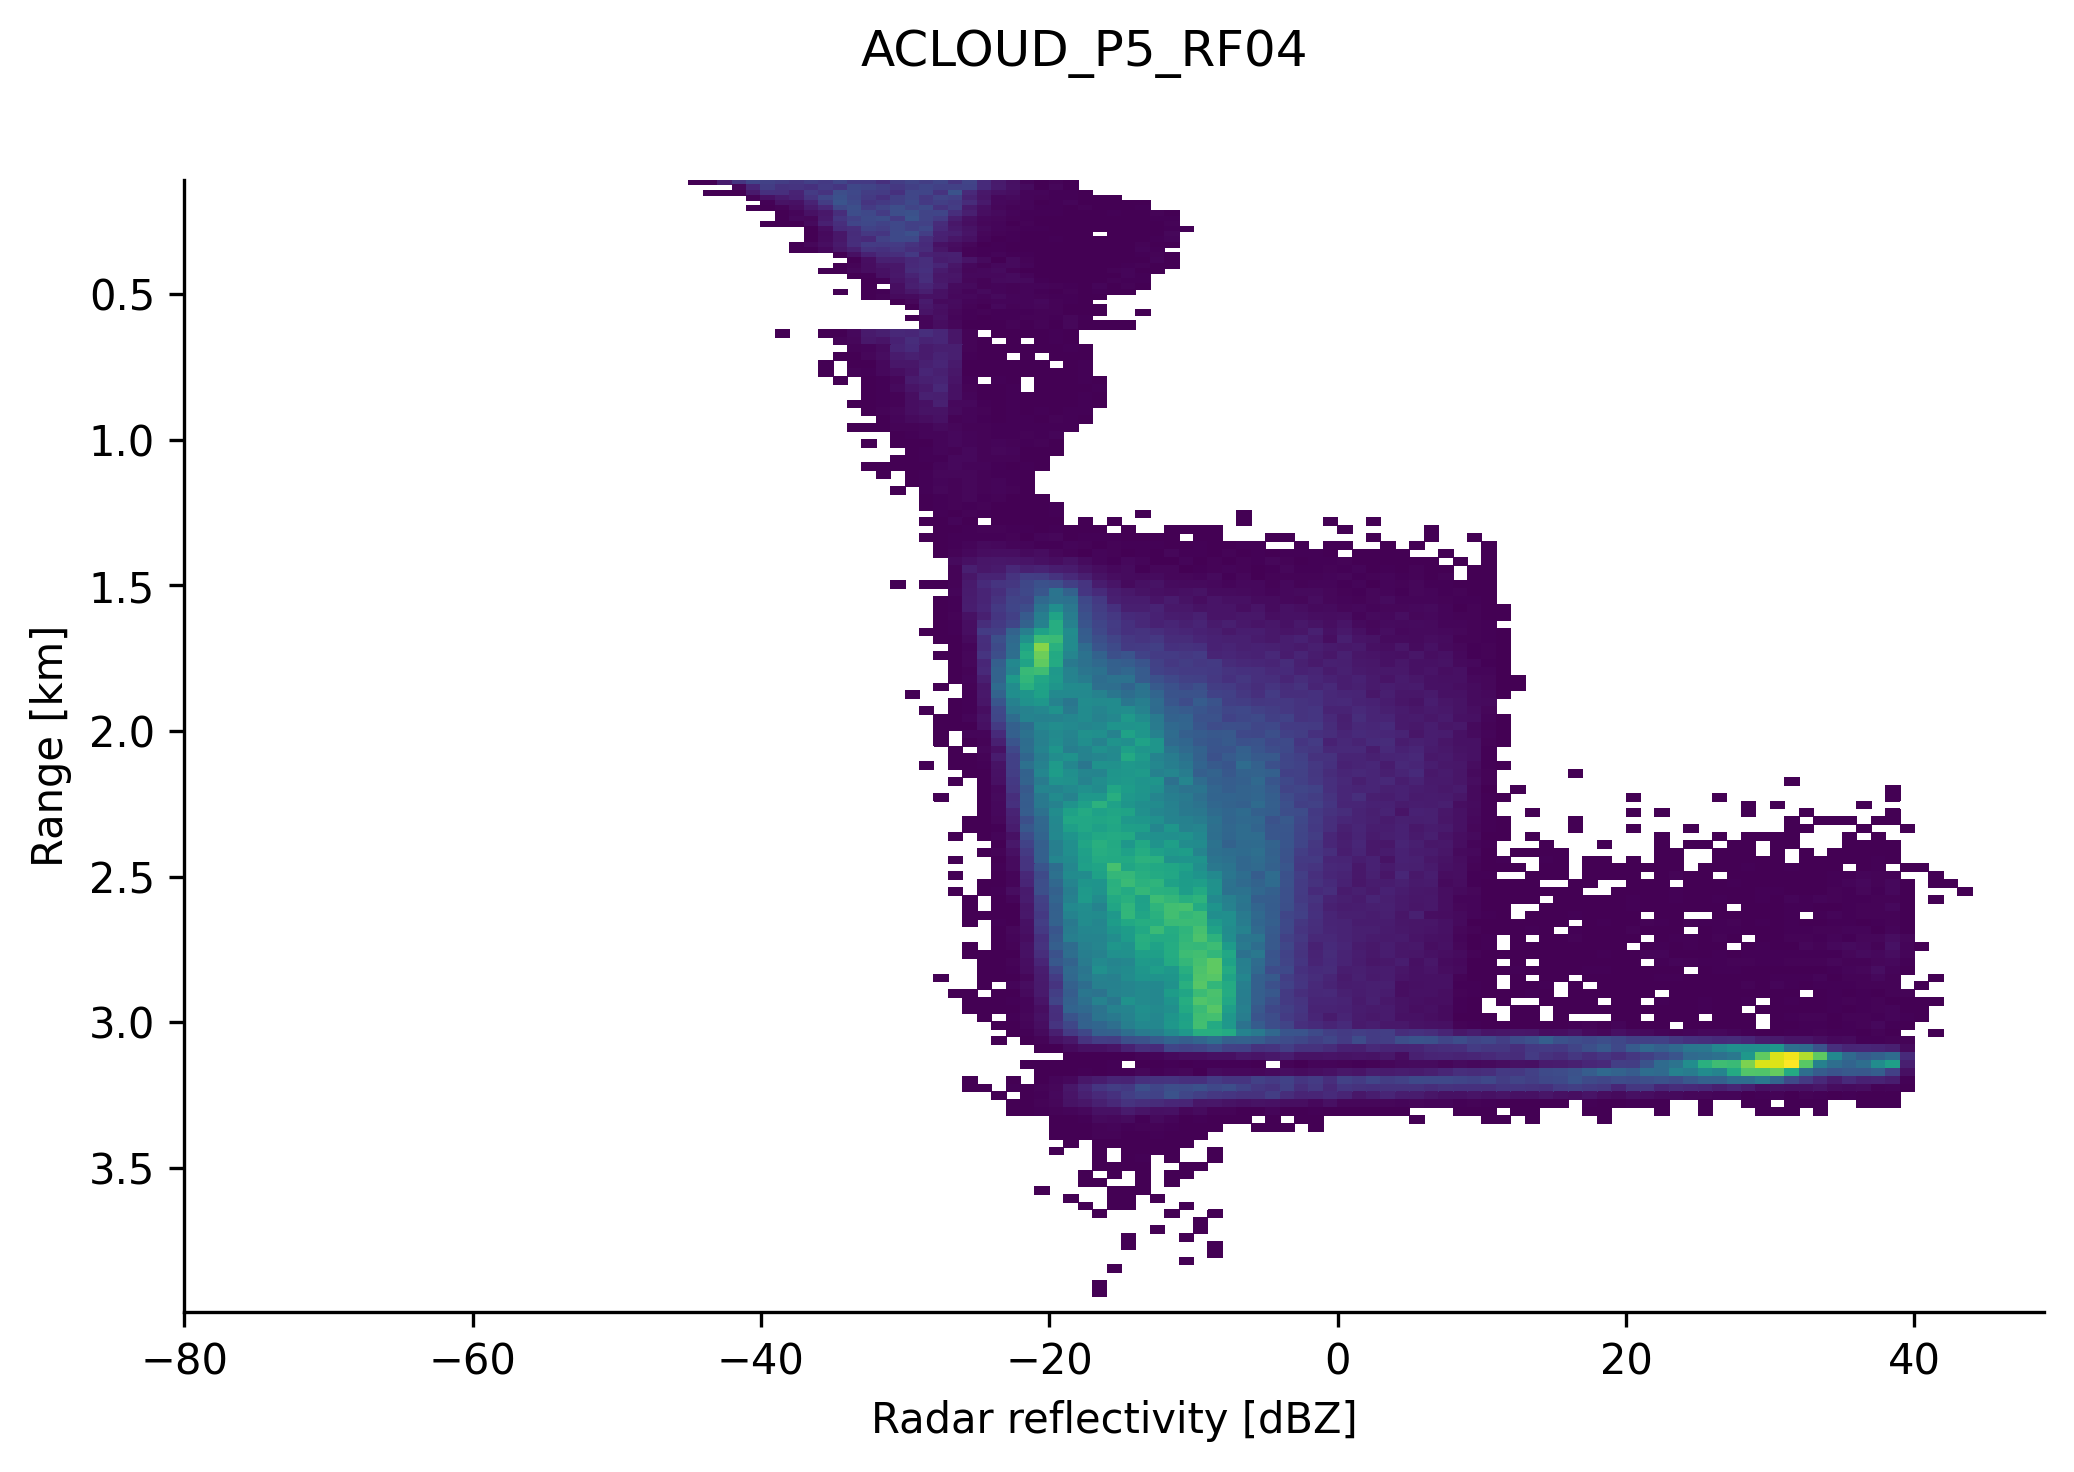

In [13]:
flight_id = 'ACLOUD_P5_RF04'
cfad(flight_id)

### RF05, 2017-05-25

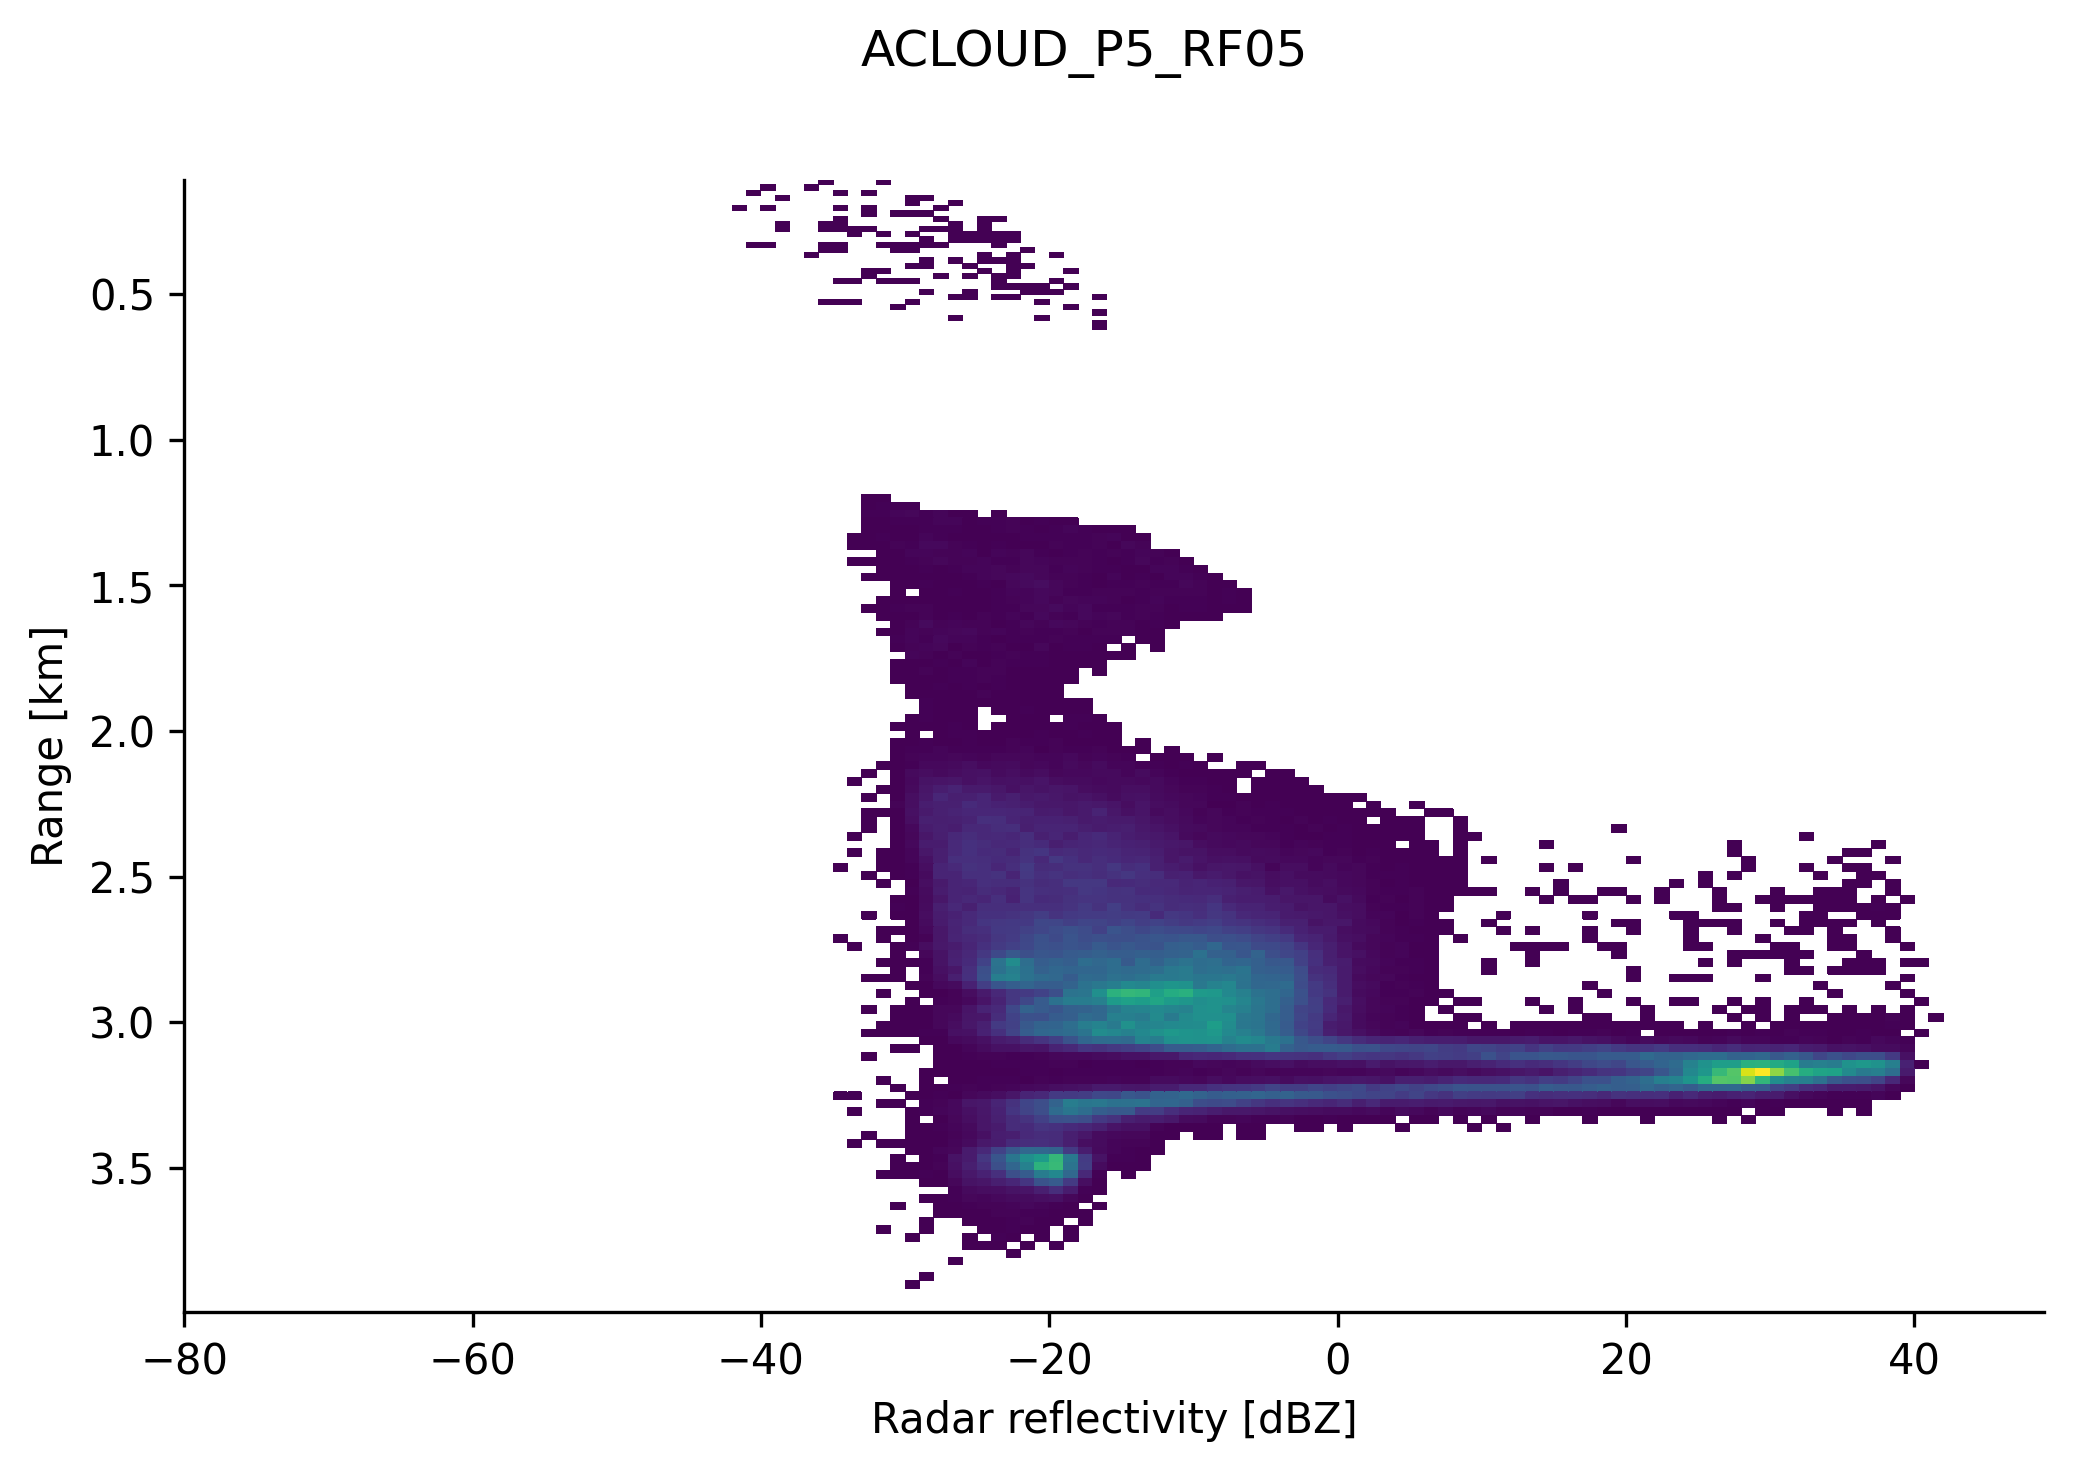

In [14]:
flight_id = 'ACLOUD_P5_RF05'
cfad(flight_id)

### RF06, 2017-05-27

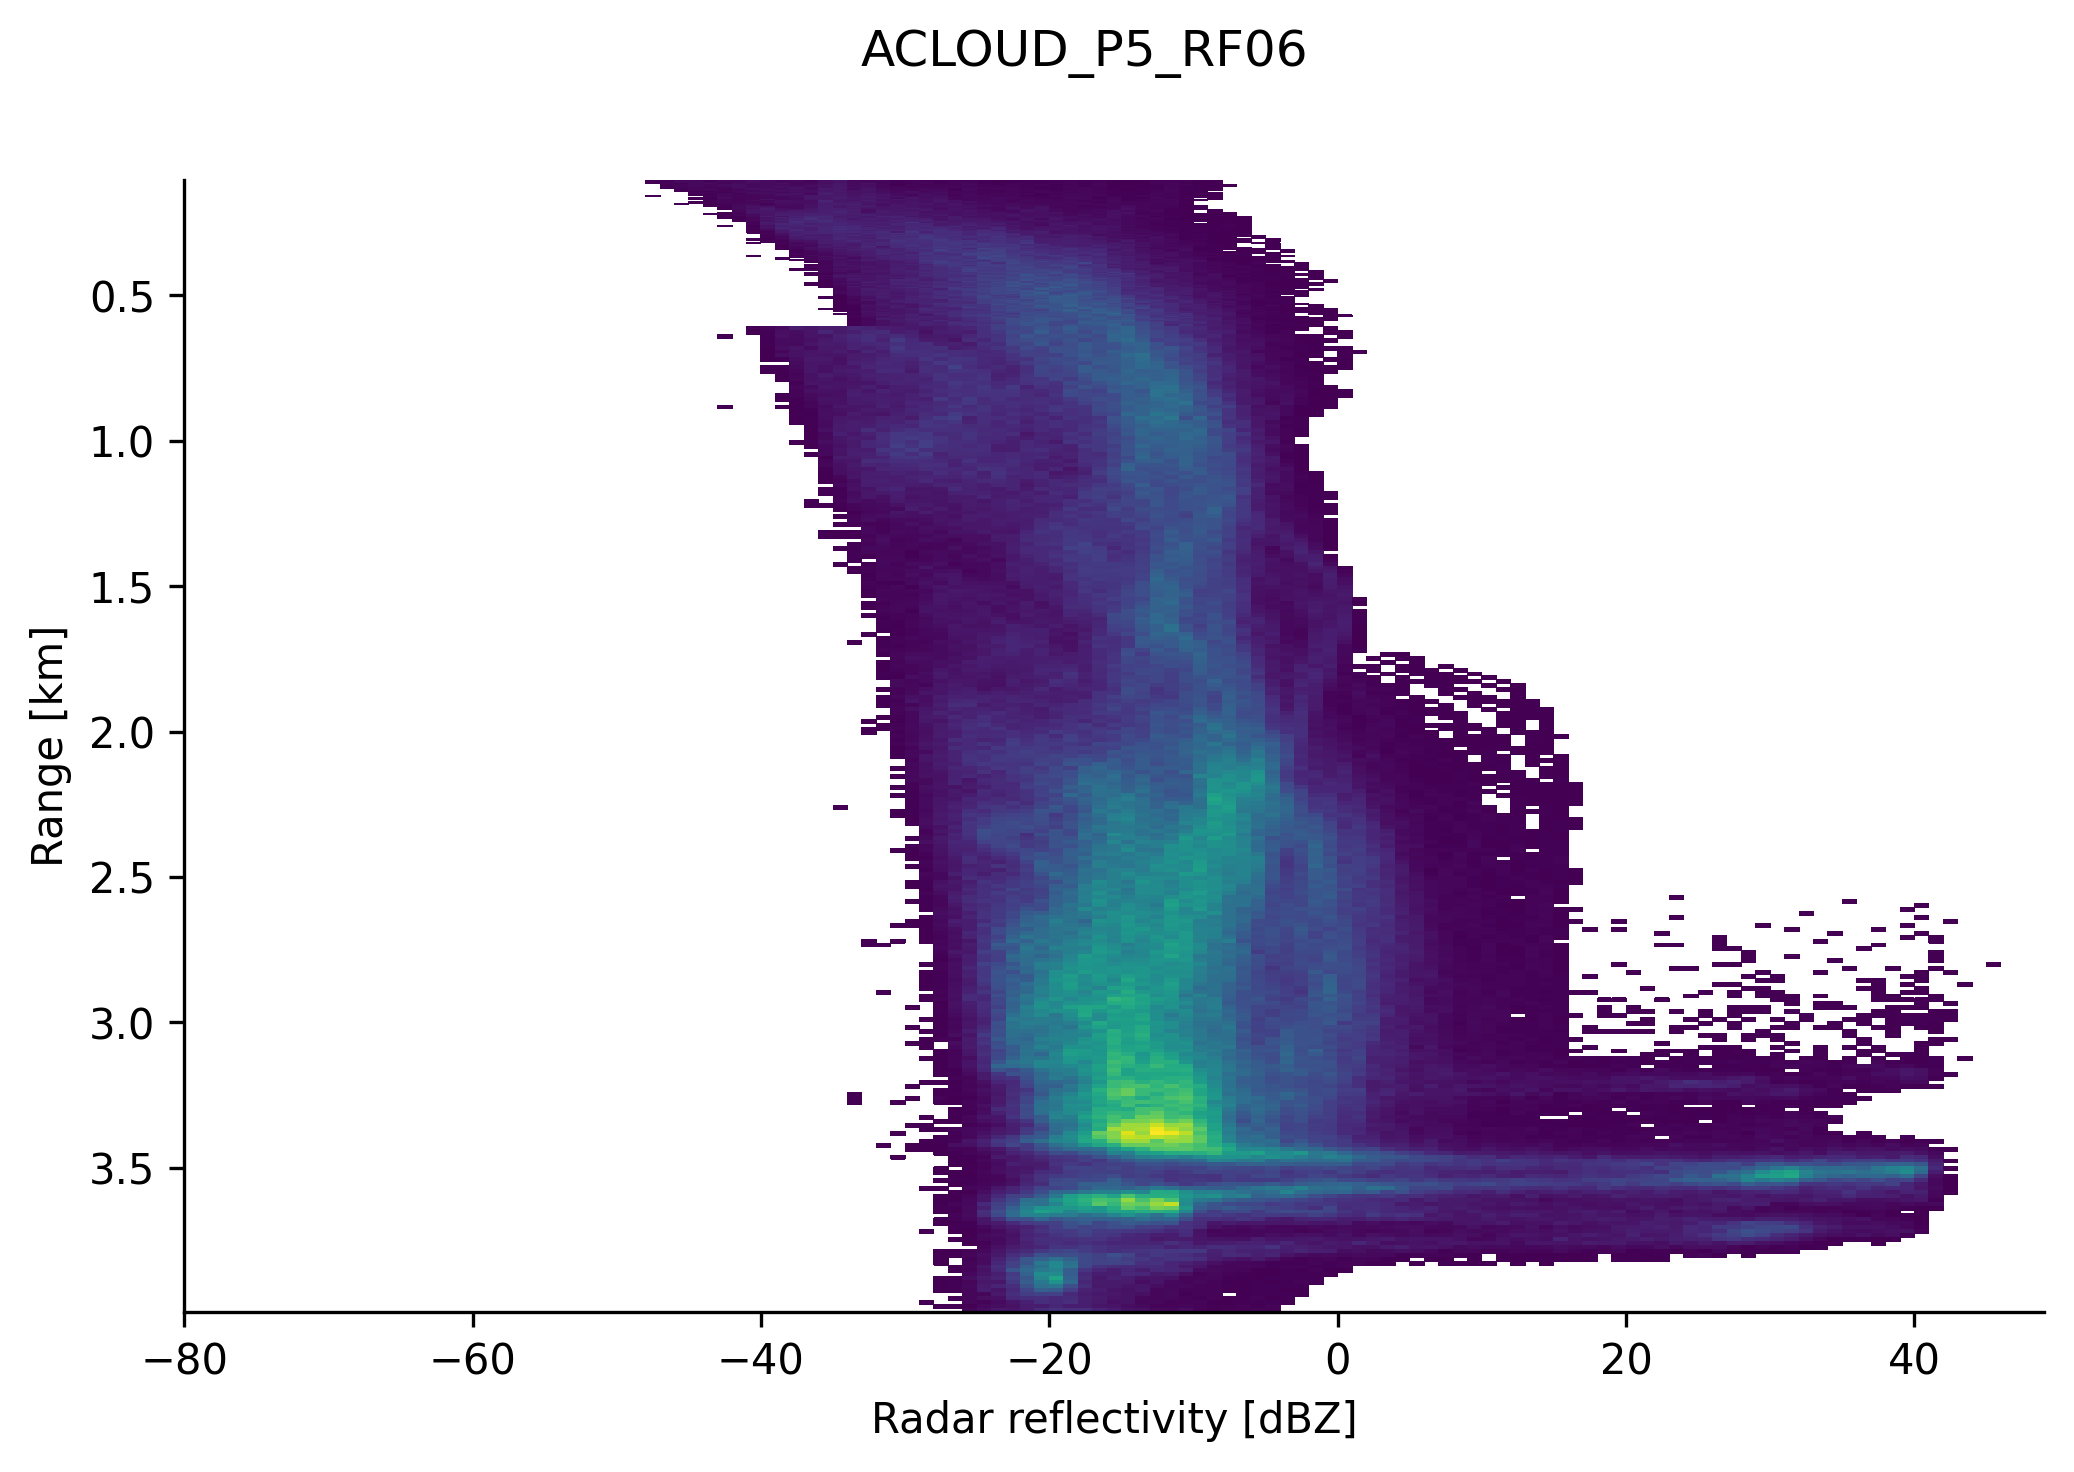

In [15]:
flight_id = 'ACLOUD_P5_RF06'
cfad(flight_id)

### RF07, 2017-05-27

In [16]:
flight_id = 'ACLOUD_P5_RF07'
cfad(flight_id)

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

### RF08, 2017-05-29

In [ ]:
flight_id = 'ACLOUD_P5_RF08'
cfad(flight_id)

### RF10, 2017-05-31

In [ ]:
flight_id = 'ACLOUD_P5_RF10'
cfad(flight_id)

### RF11, 2017-06-02

In [ ]:
flight_id = 'ACLOUD_P5_RF11'
cfad(flight_id)

### RF13, 2017-06-05

In [ ]:
# no data

### RF14, 2017-06-08

In [ ]:
flight_id = 'ACLOUD_P5_RF14'
cfad(flight_id)

### RF15, 2017-06-09

In [ ]:
flight_id = 'ACLOUD_P5_RF15'
cfad(flight_id)

### RF16, 2017-06-13

In [ ]:
flight_id = 'ACLOUD_P5_RF16'
cfad(flight_id)

### RF17, 2017-06-14

In [ ]:
flight_id = 'ACLOUD_P5_RF17'
cfad(flight_id)

### RF18, 2017-06-16

In [ ]:
flight_id = 'ACLOUD_P5_RF18'
cfad(flight_id)

### RF19, 2017-06-17

In [ ]:
flight_id = 'ACLOUD_P5_RF19'
cfad(flight_id)

### RF20, 2017-06-18

In [ ]:
flight_id = 'ACLOUD_P5_RF20'
cfad(flight_id)

### RF21, 2017-06-20

In [ ]:
flight_id = 'ACLOUD_P5_RF21'
cfad(flight_id)

### RF22, 2017-06-23

In [ ]:
flight_id = 'ACLOUD_P5_RF22'
cfad(flight_id)

### RF23, 2017-06-25

In [ ]:
flight_id = 'ACLOUD_P5_RF23'
cfad(flight_id)

### RF25, 2017-06-26

In [ ]:
flight_id = 'ACLOUD_P5_RF25'
cfad(flight_id)

## AFLUX

### RF02, 2019-03-19

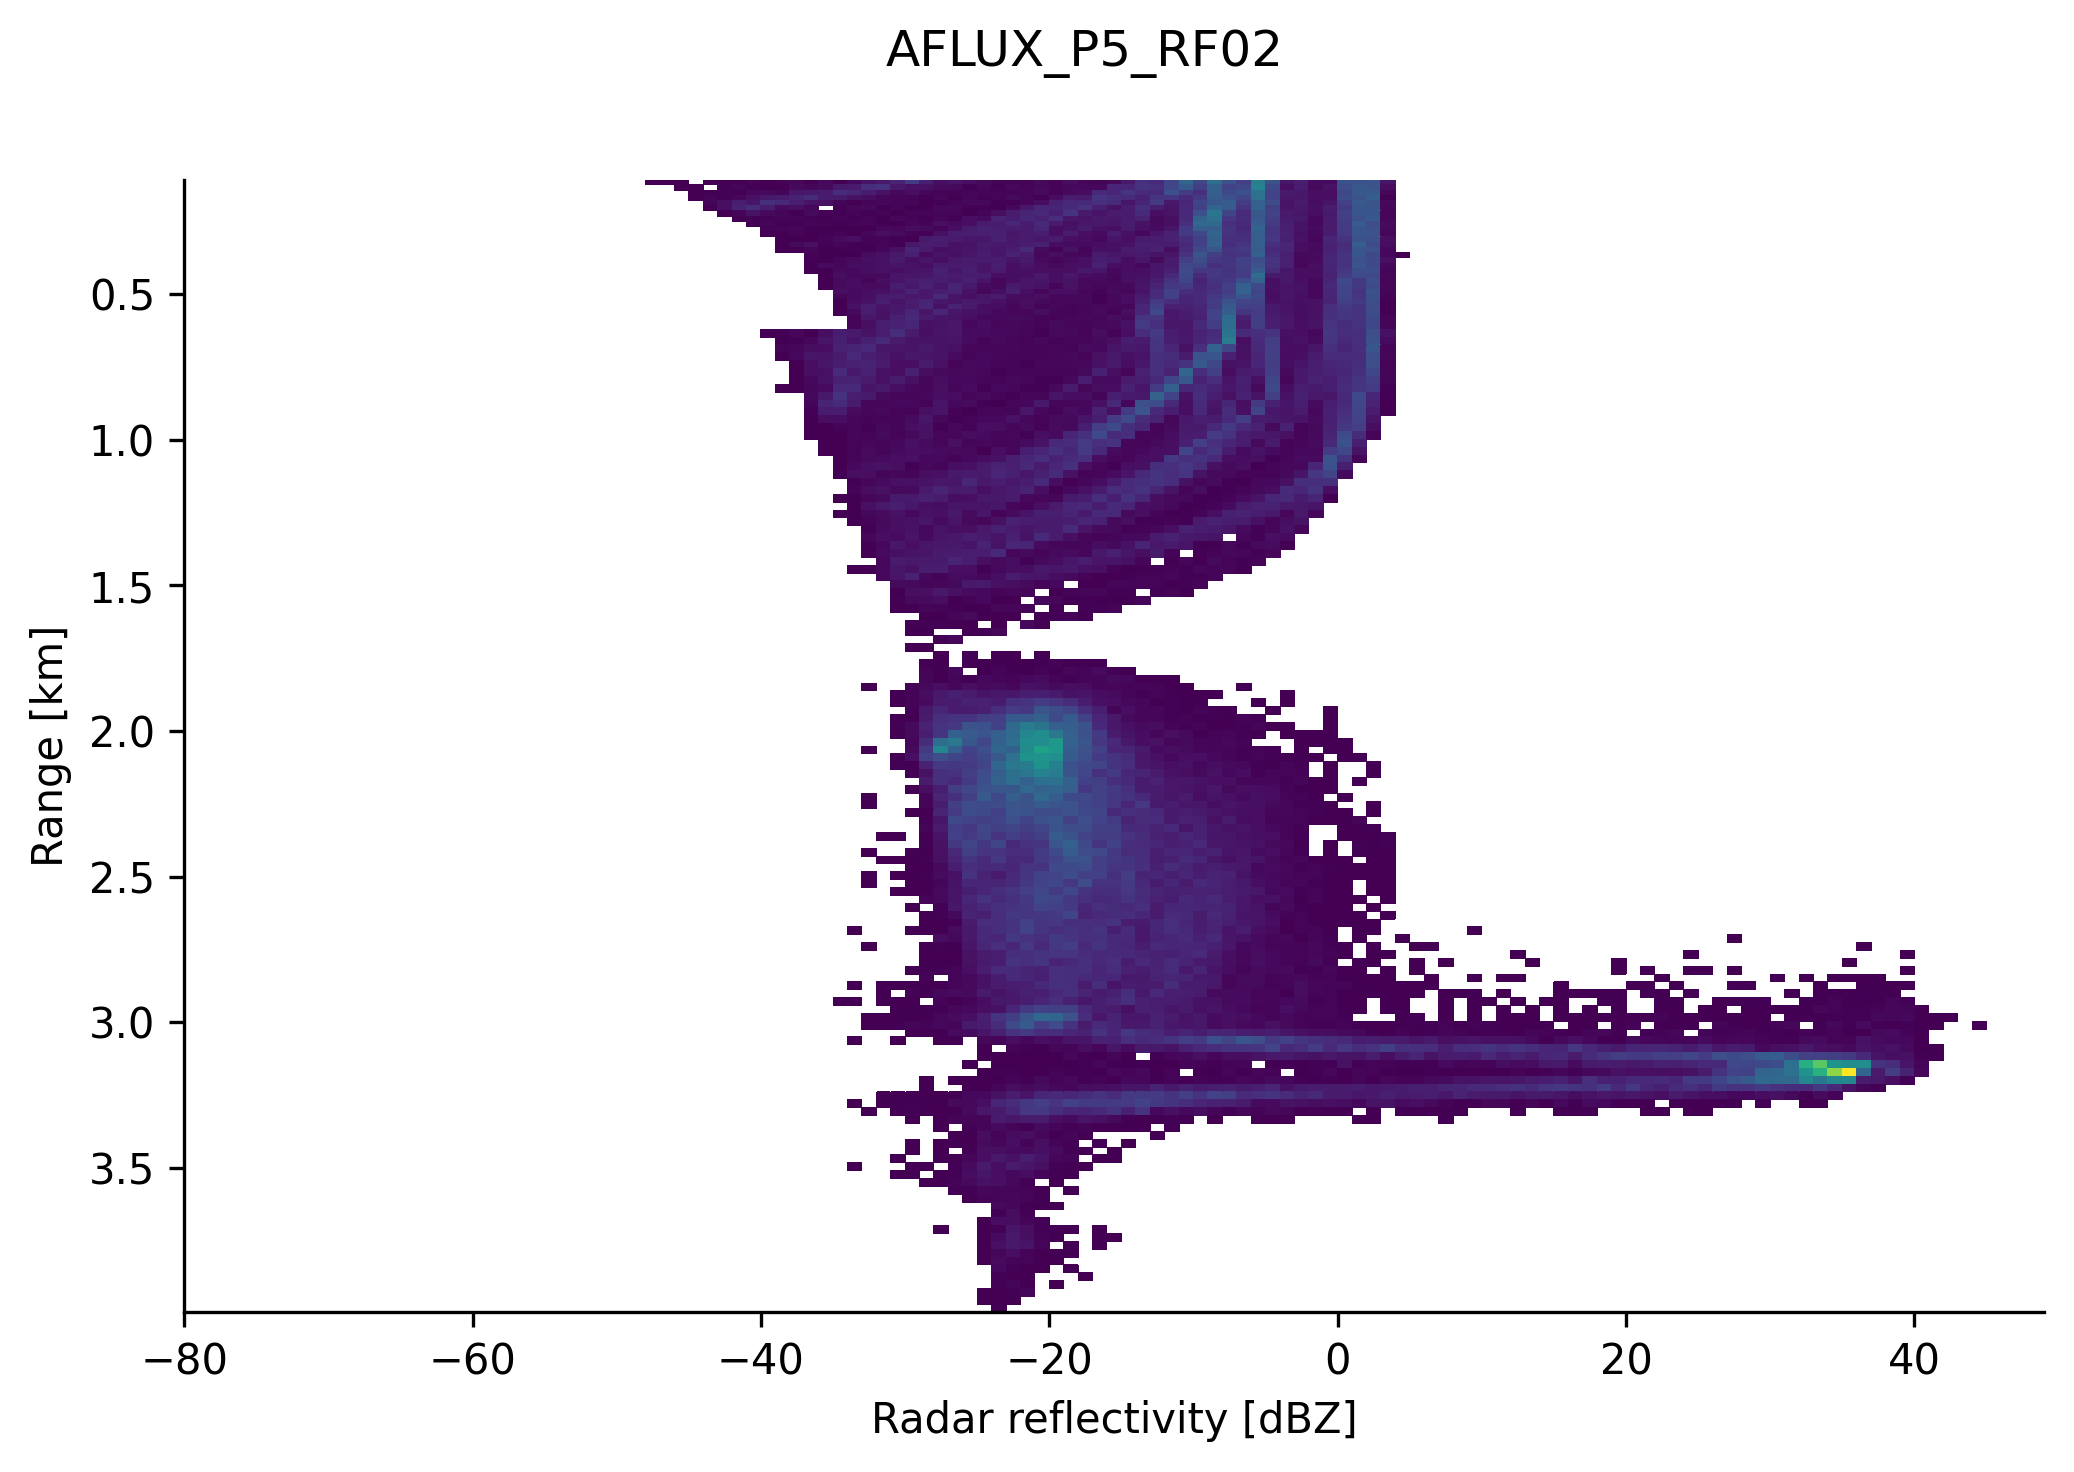

In [17]:
flight_id = 'AFLUX_P5_RF02'
cfad(flight_id)

### RF03, 2019-03-21

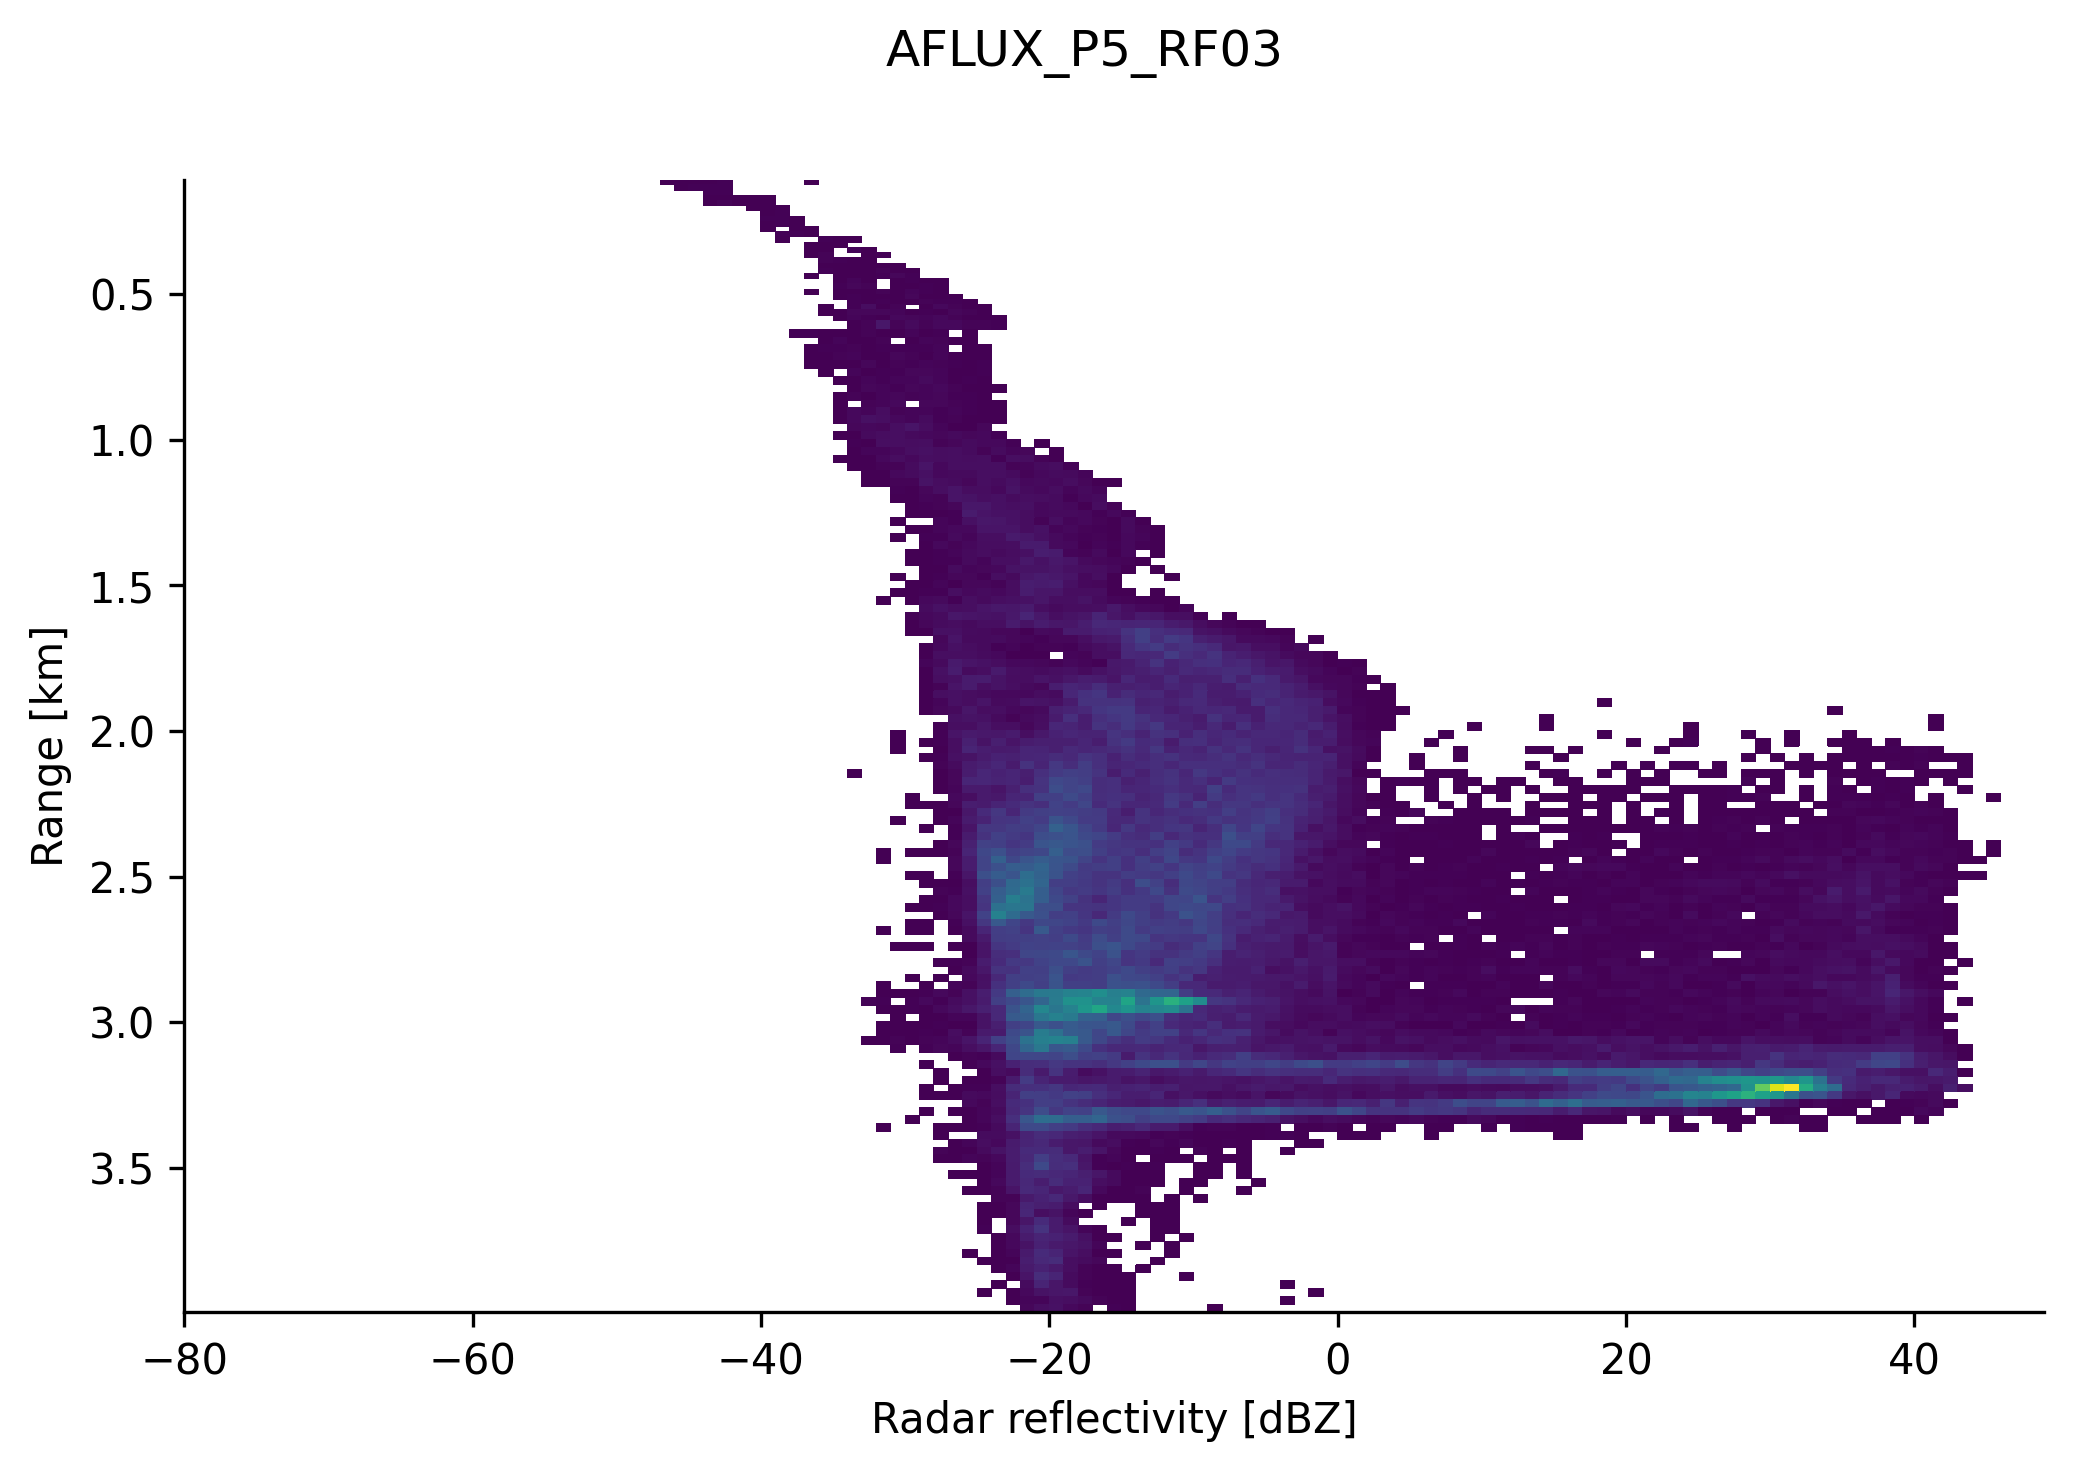

In [18]:
flight_id = 'AFLUX_P5_RF03'
cfad(flight_id)

### RF04, 2019-03-23

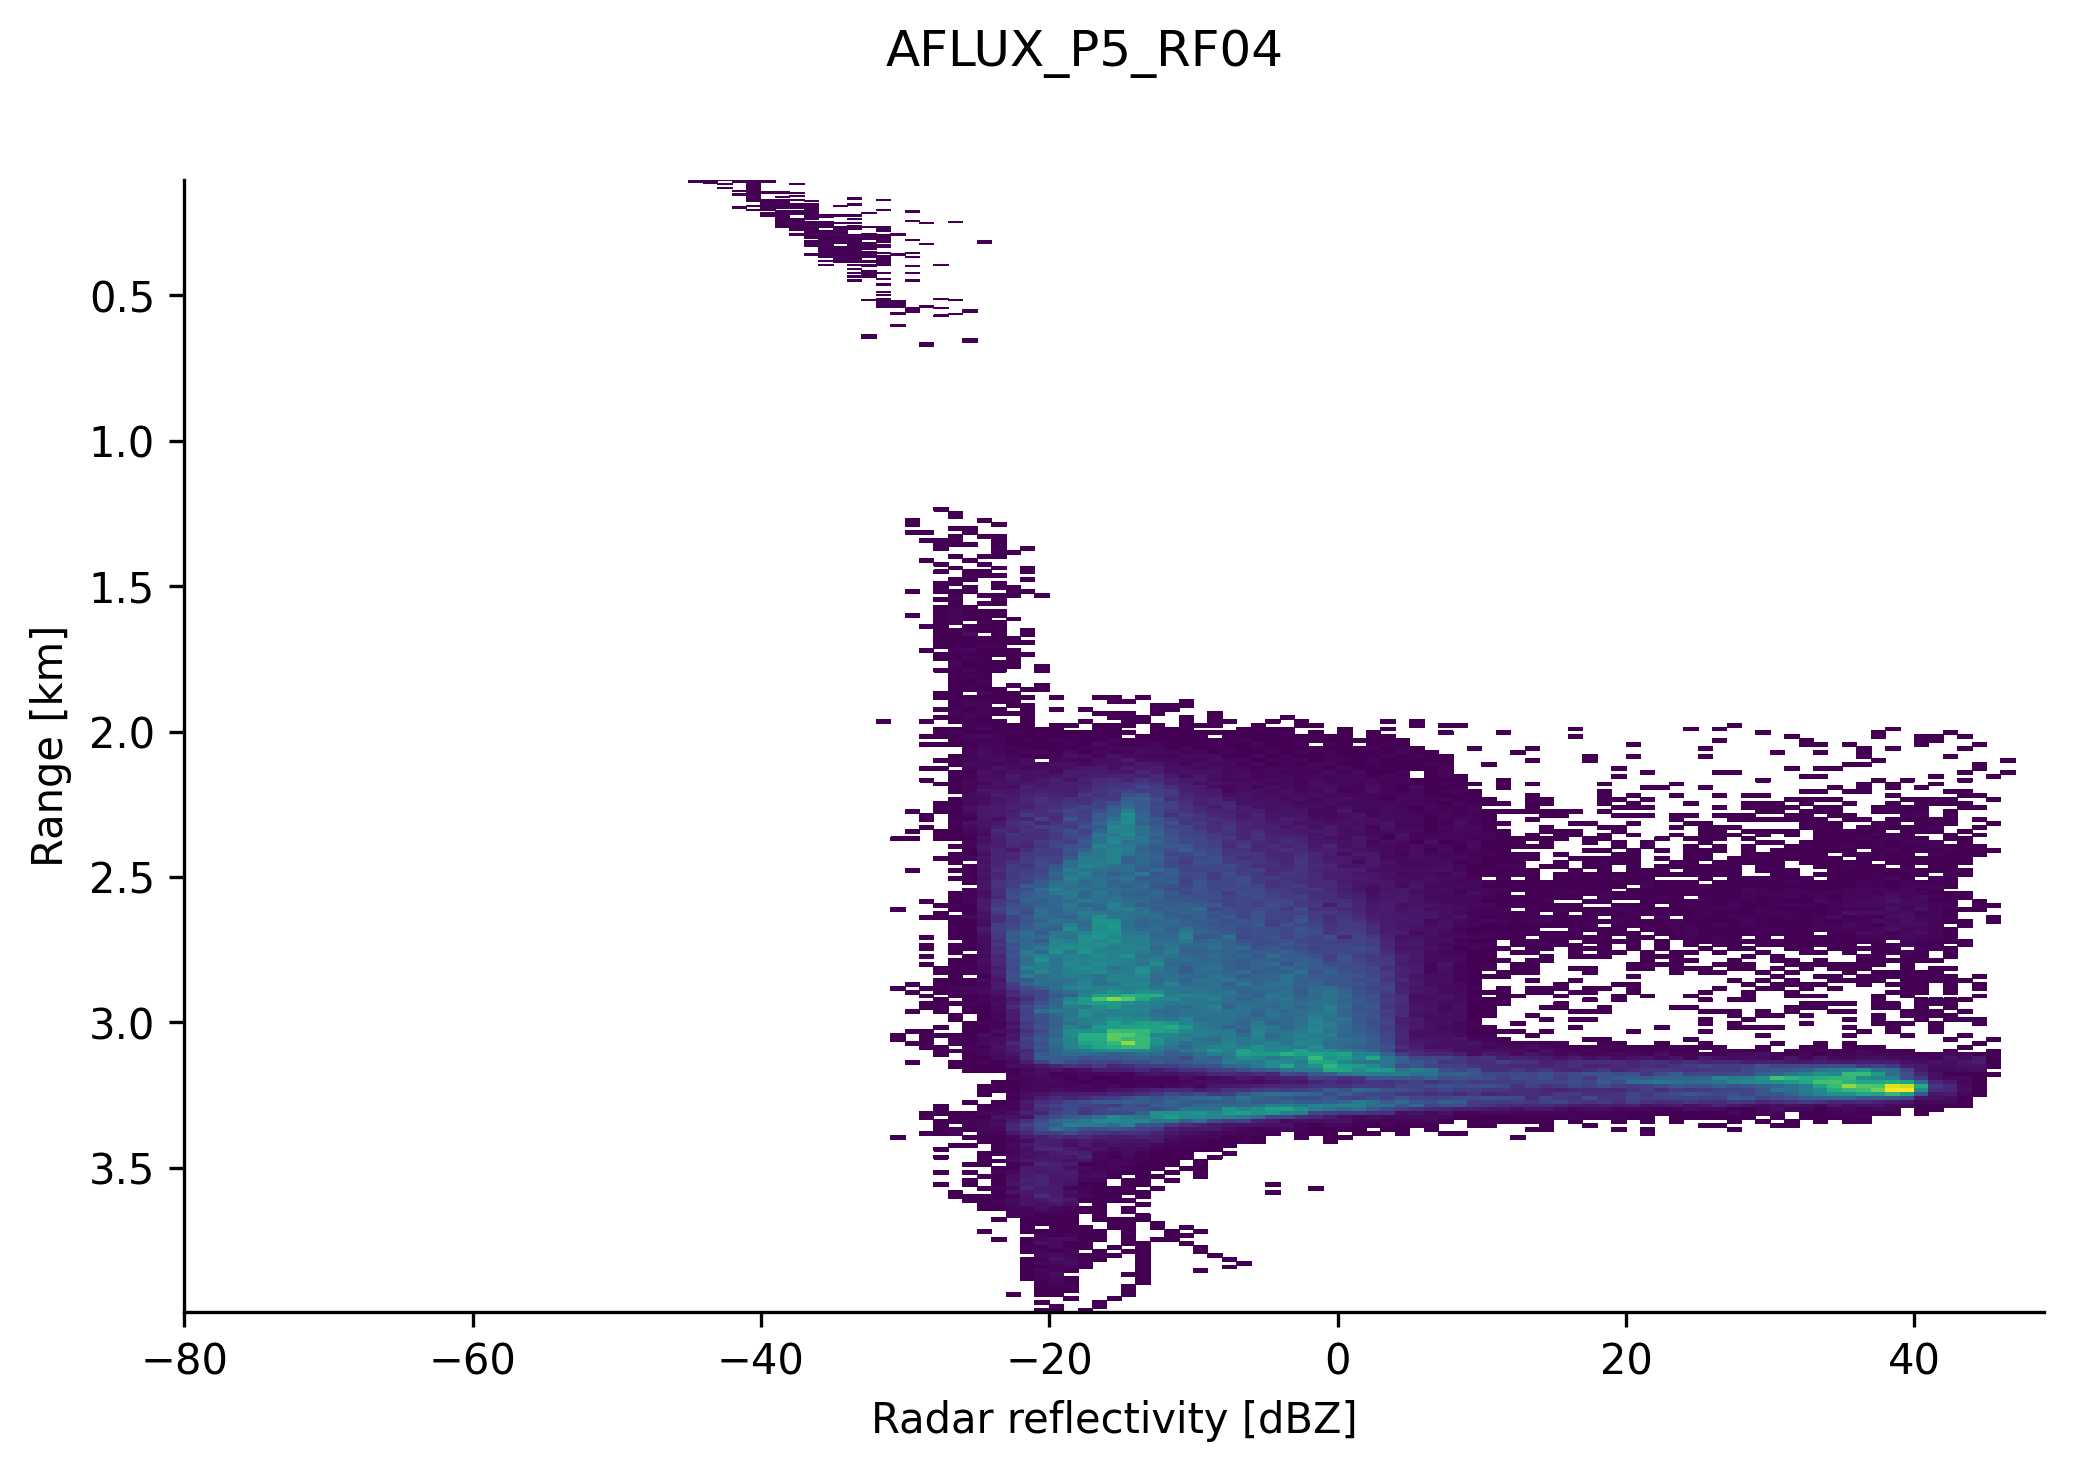

In [19]:
flight_id = 'AFLUX_P5_RF04'
cfad(flight_id)

### RF05, 2019-03-24

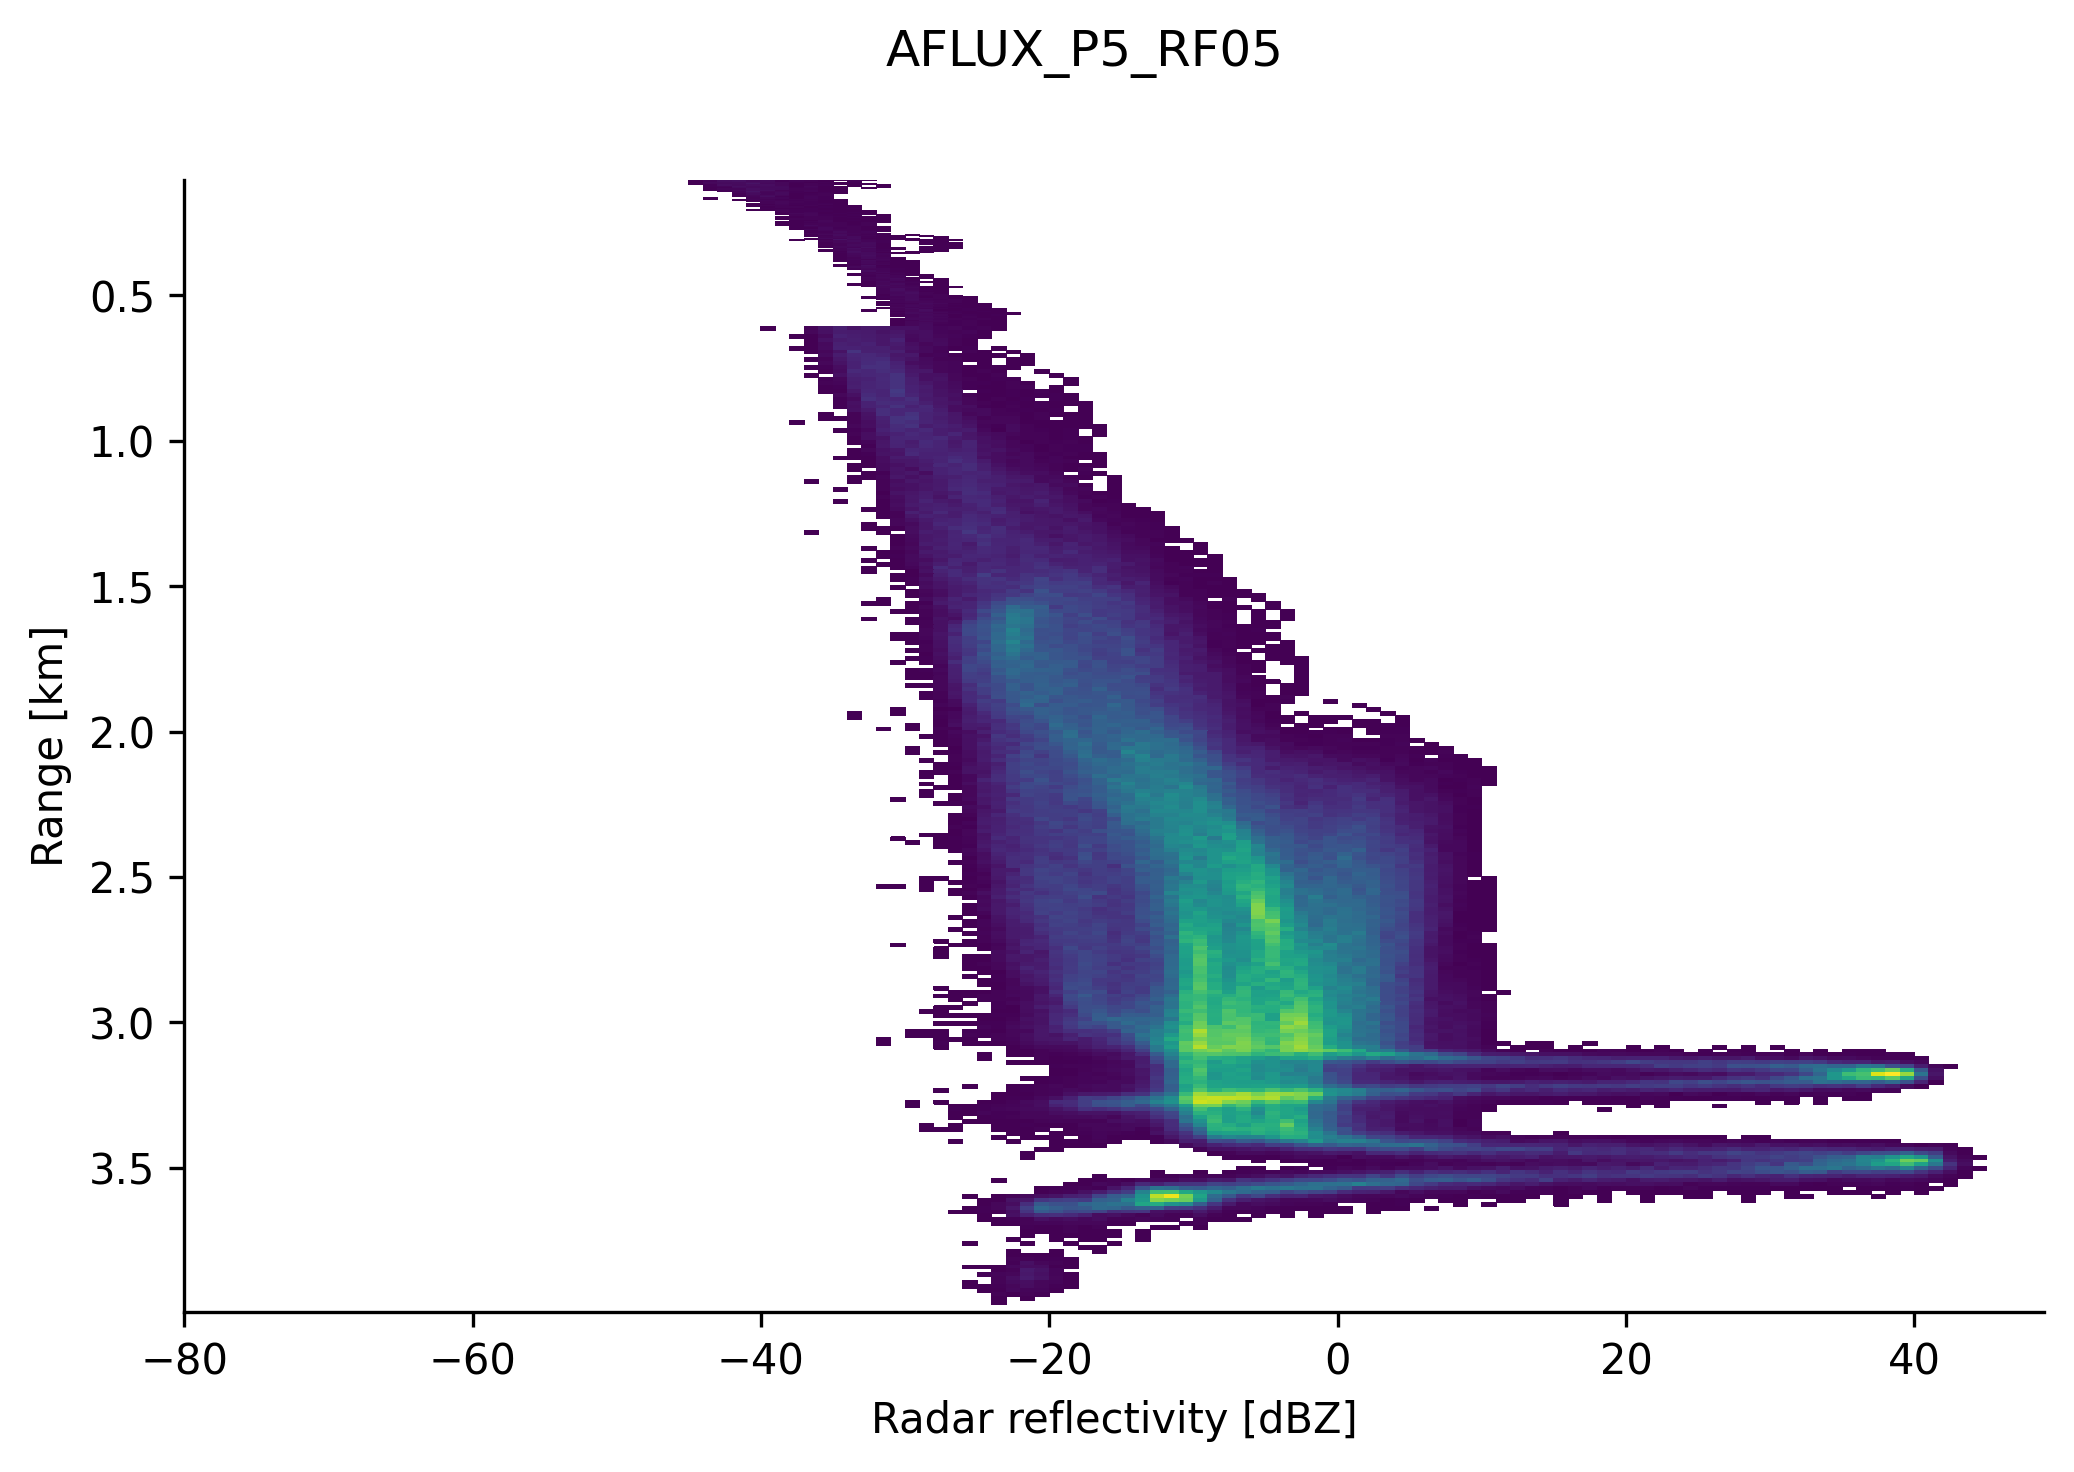

In [20]:
flight_id = 'AFLUX_P5_RF05'
cfad(flight_id)

### RF06, 2019-03-25

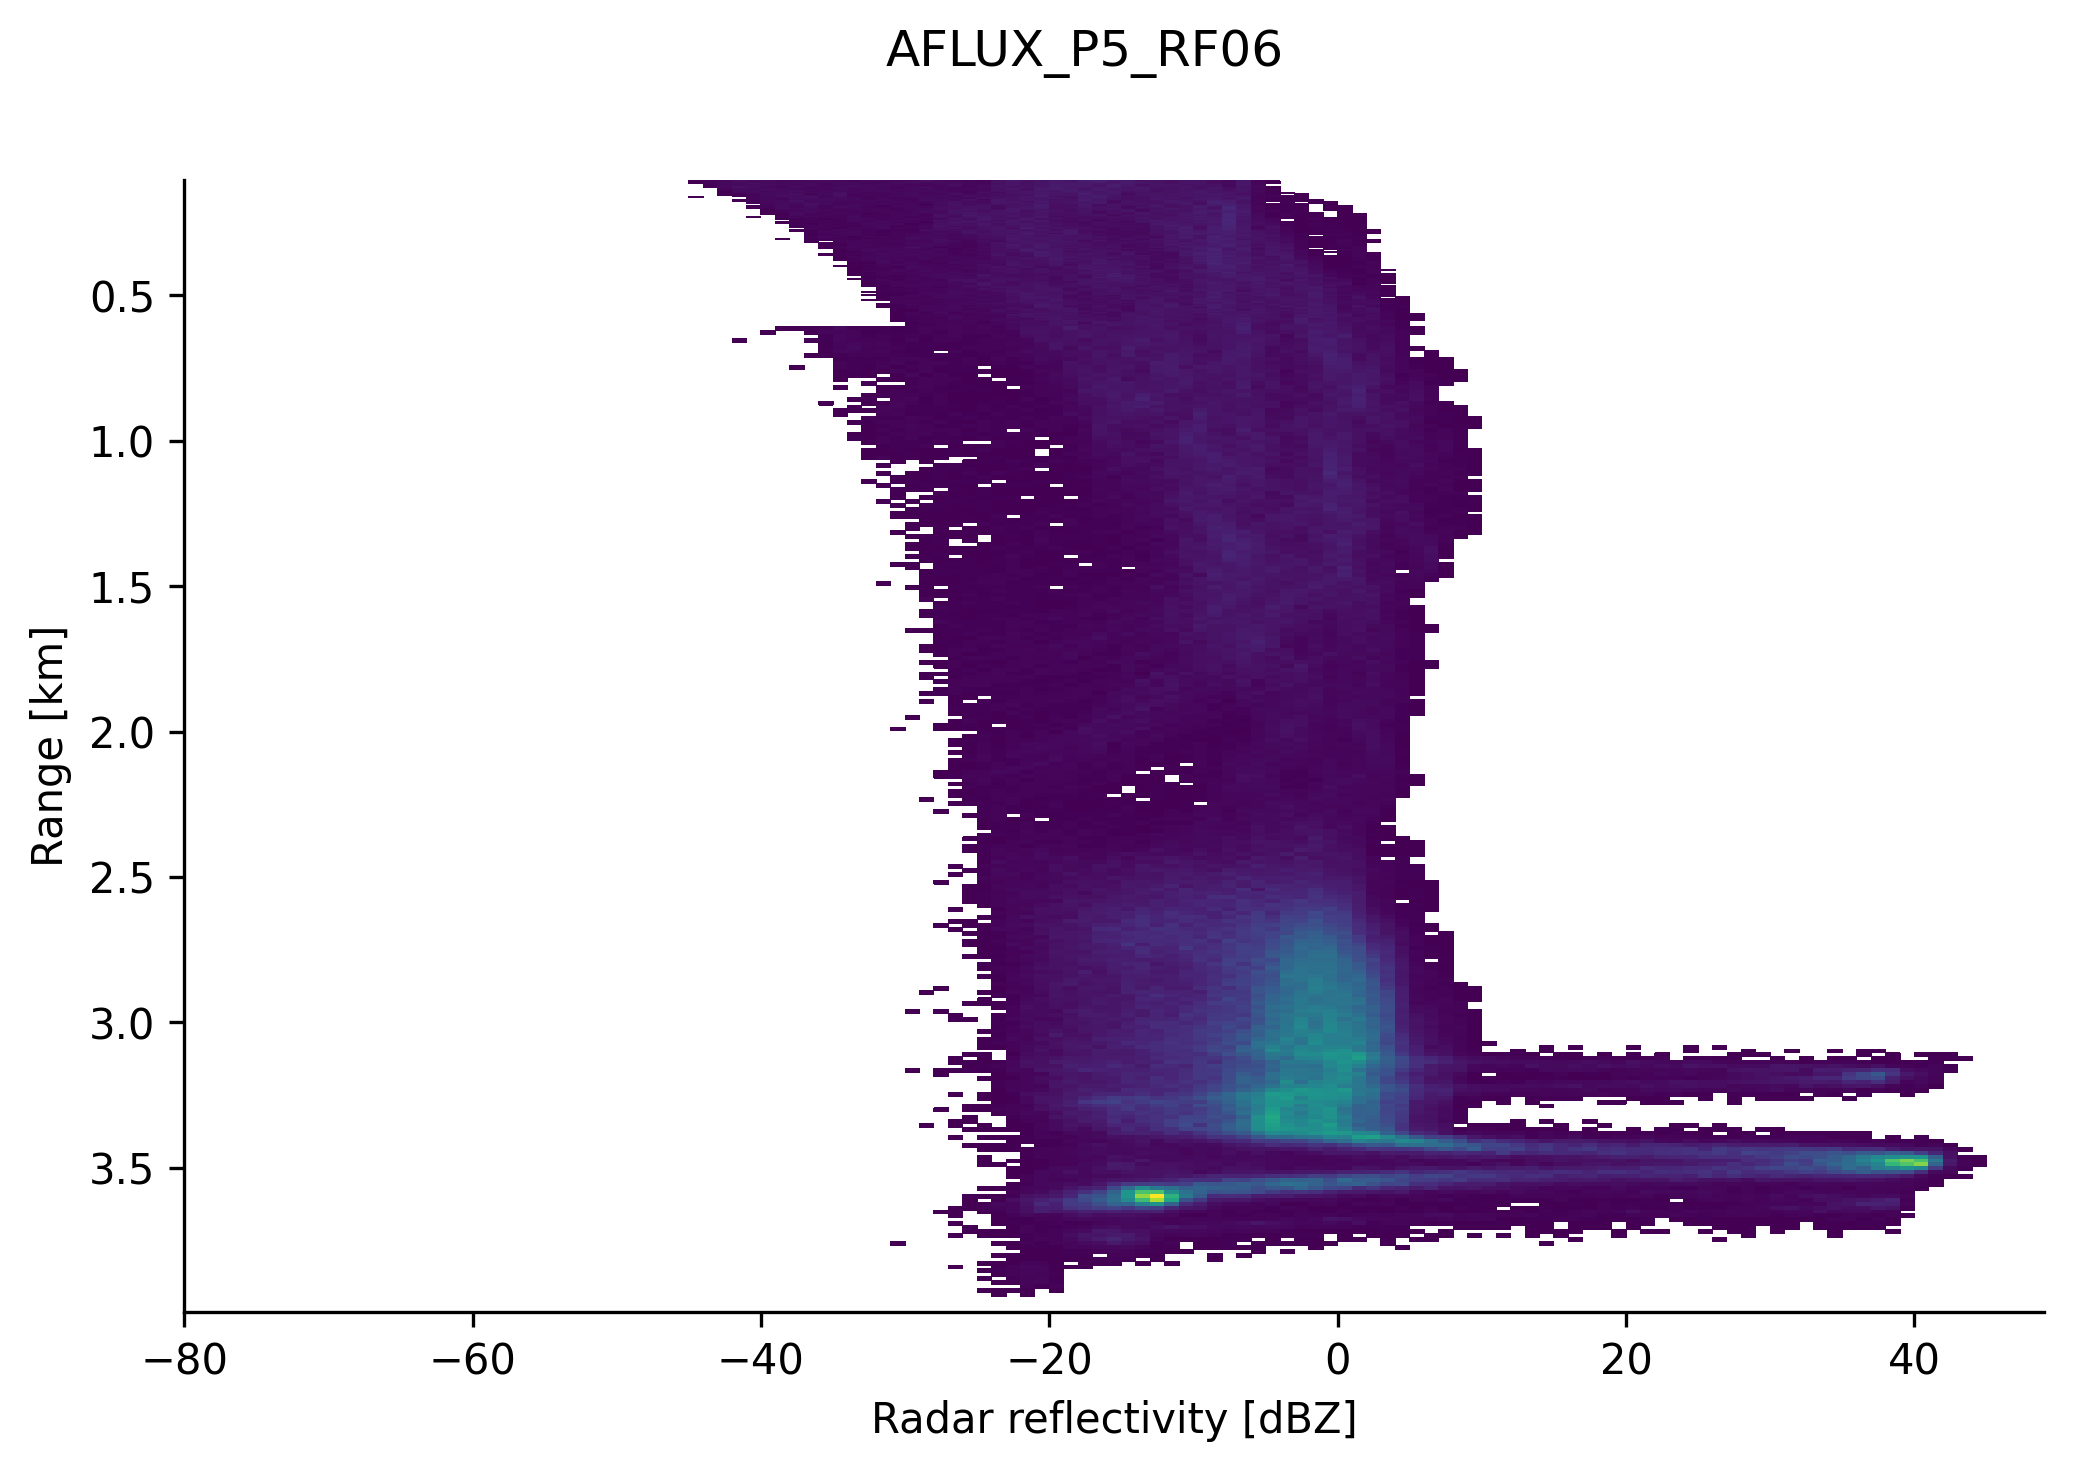

In [21]:
flight_id = 'AFLUX_P5_RF06'
cfad(flight_id)

### RF07, 2019-03-30

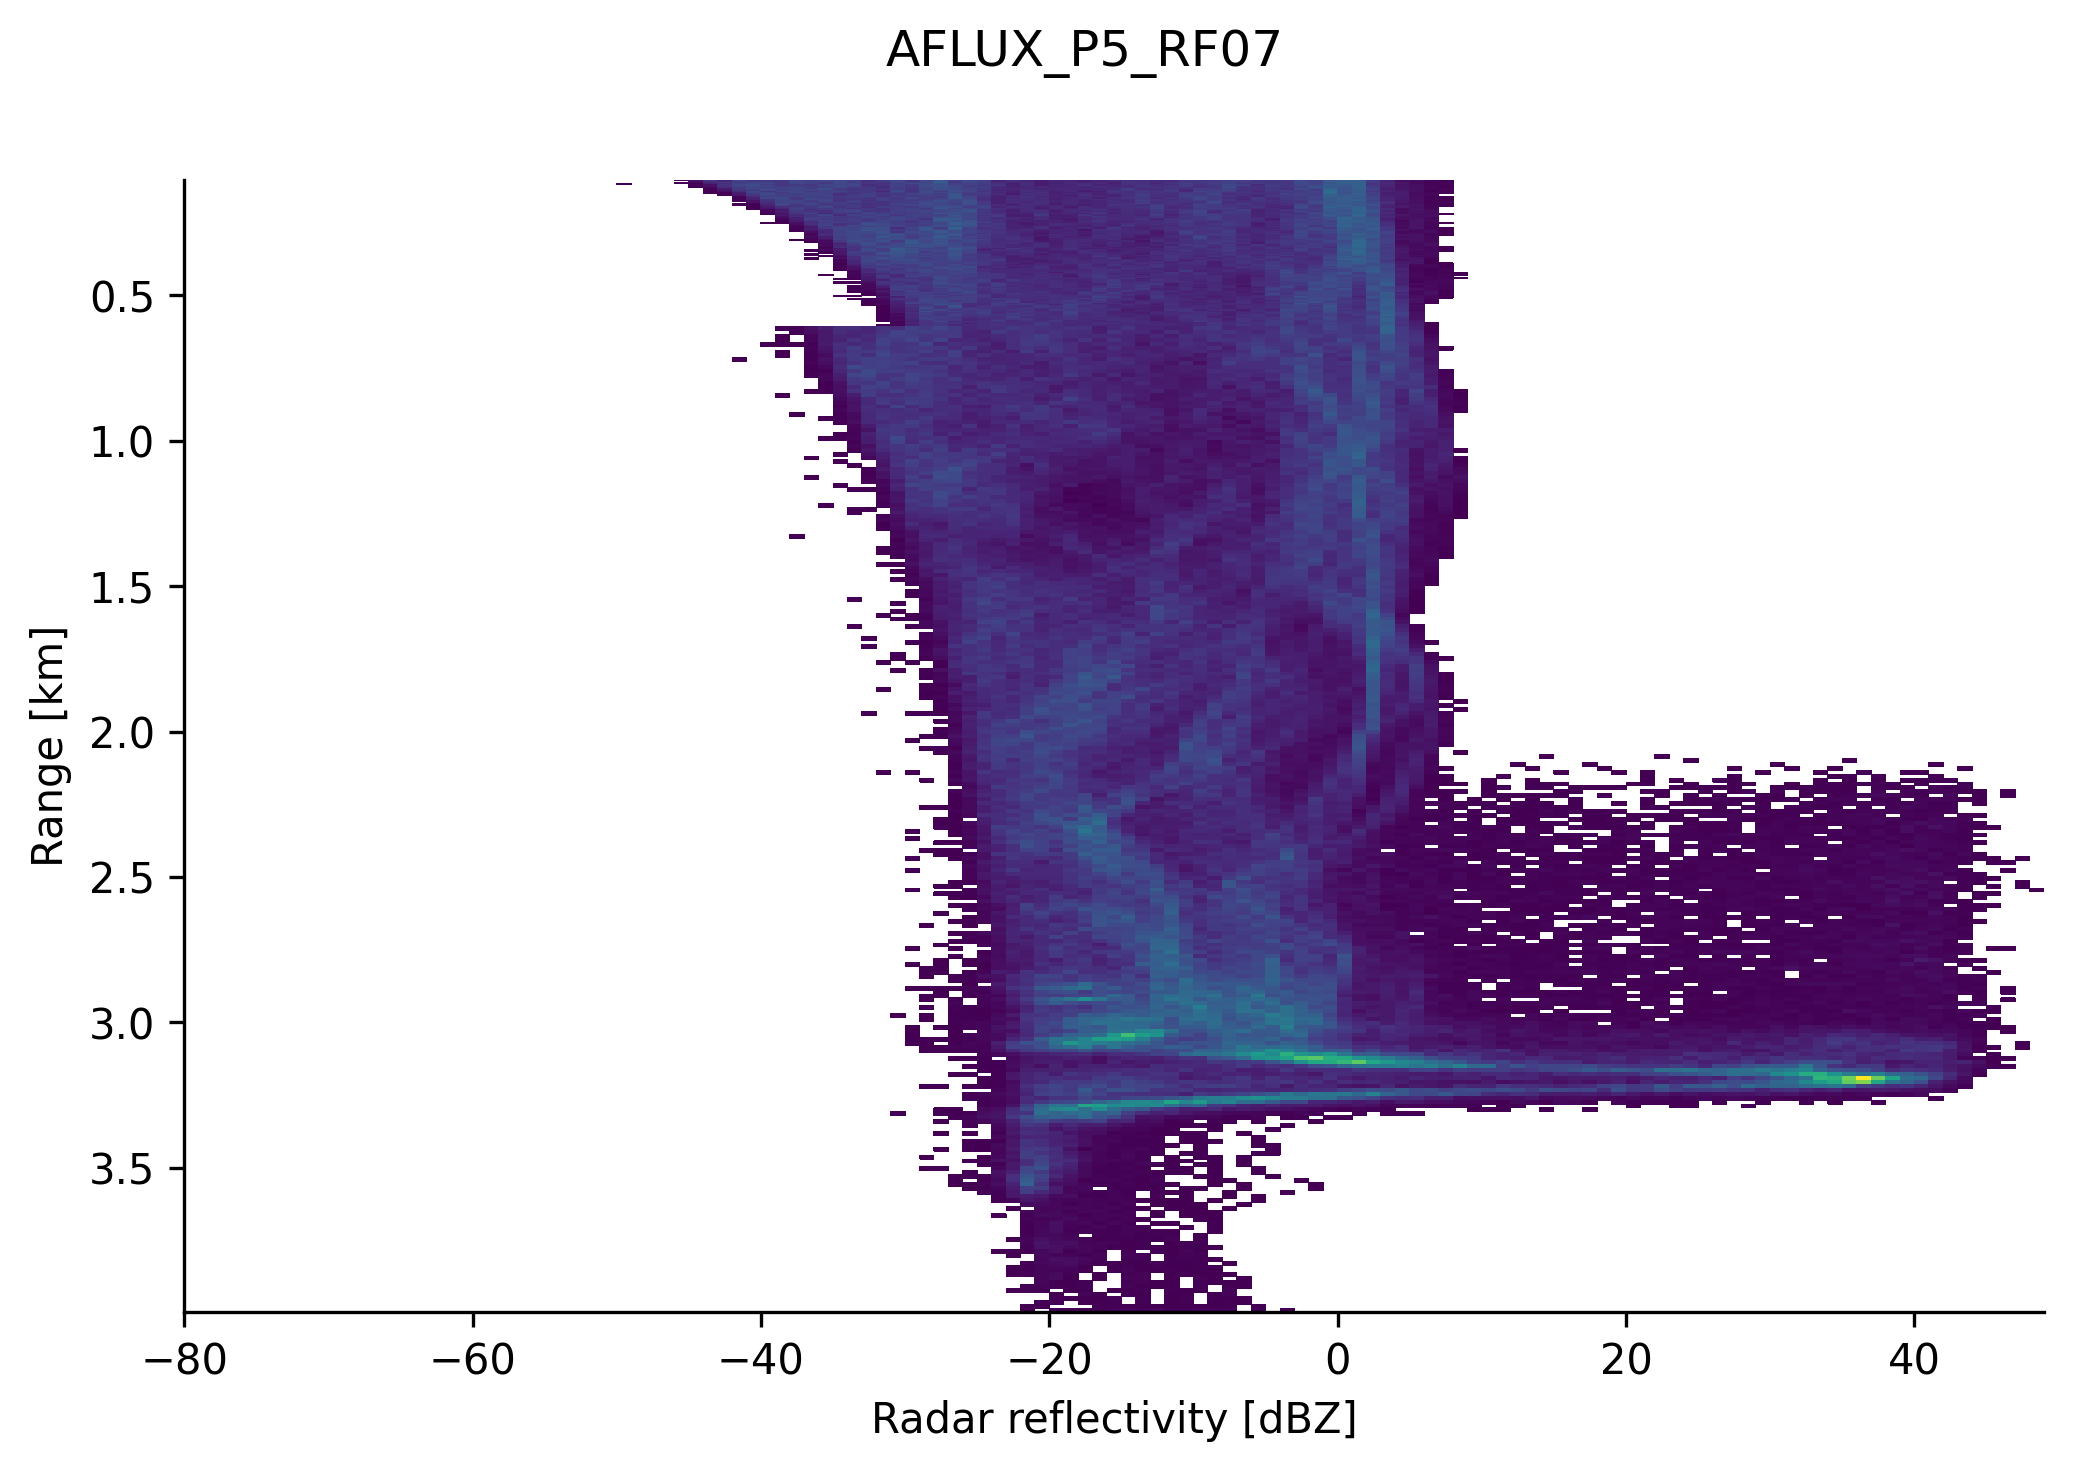

In [22]:
flight_id = 'AFLUX_P5_RF07'
cfad(flight_id)

### RF08, 2019-03-31

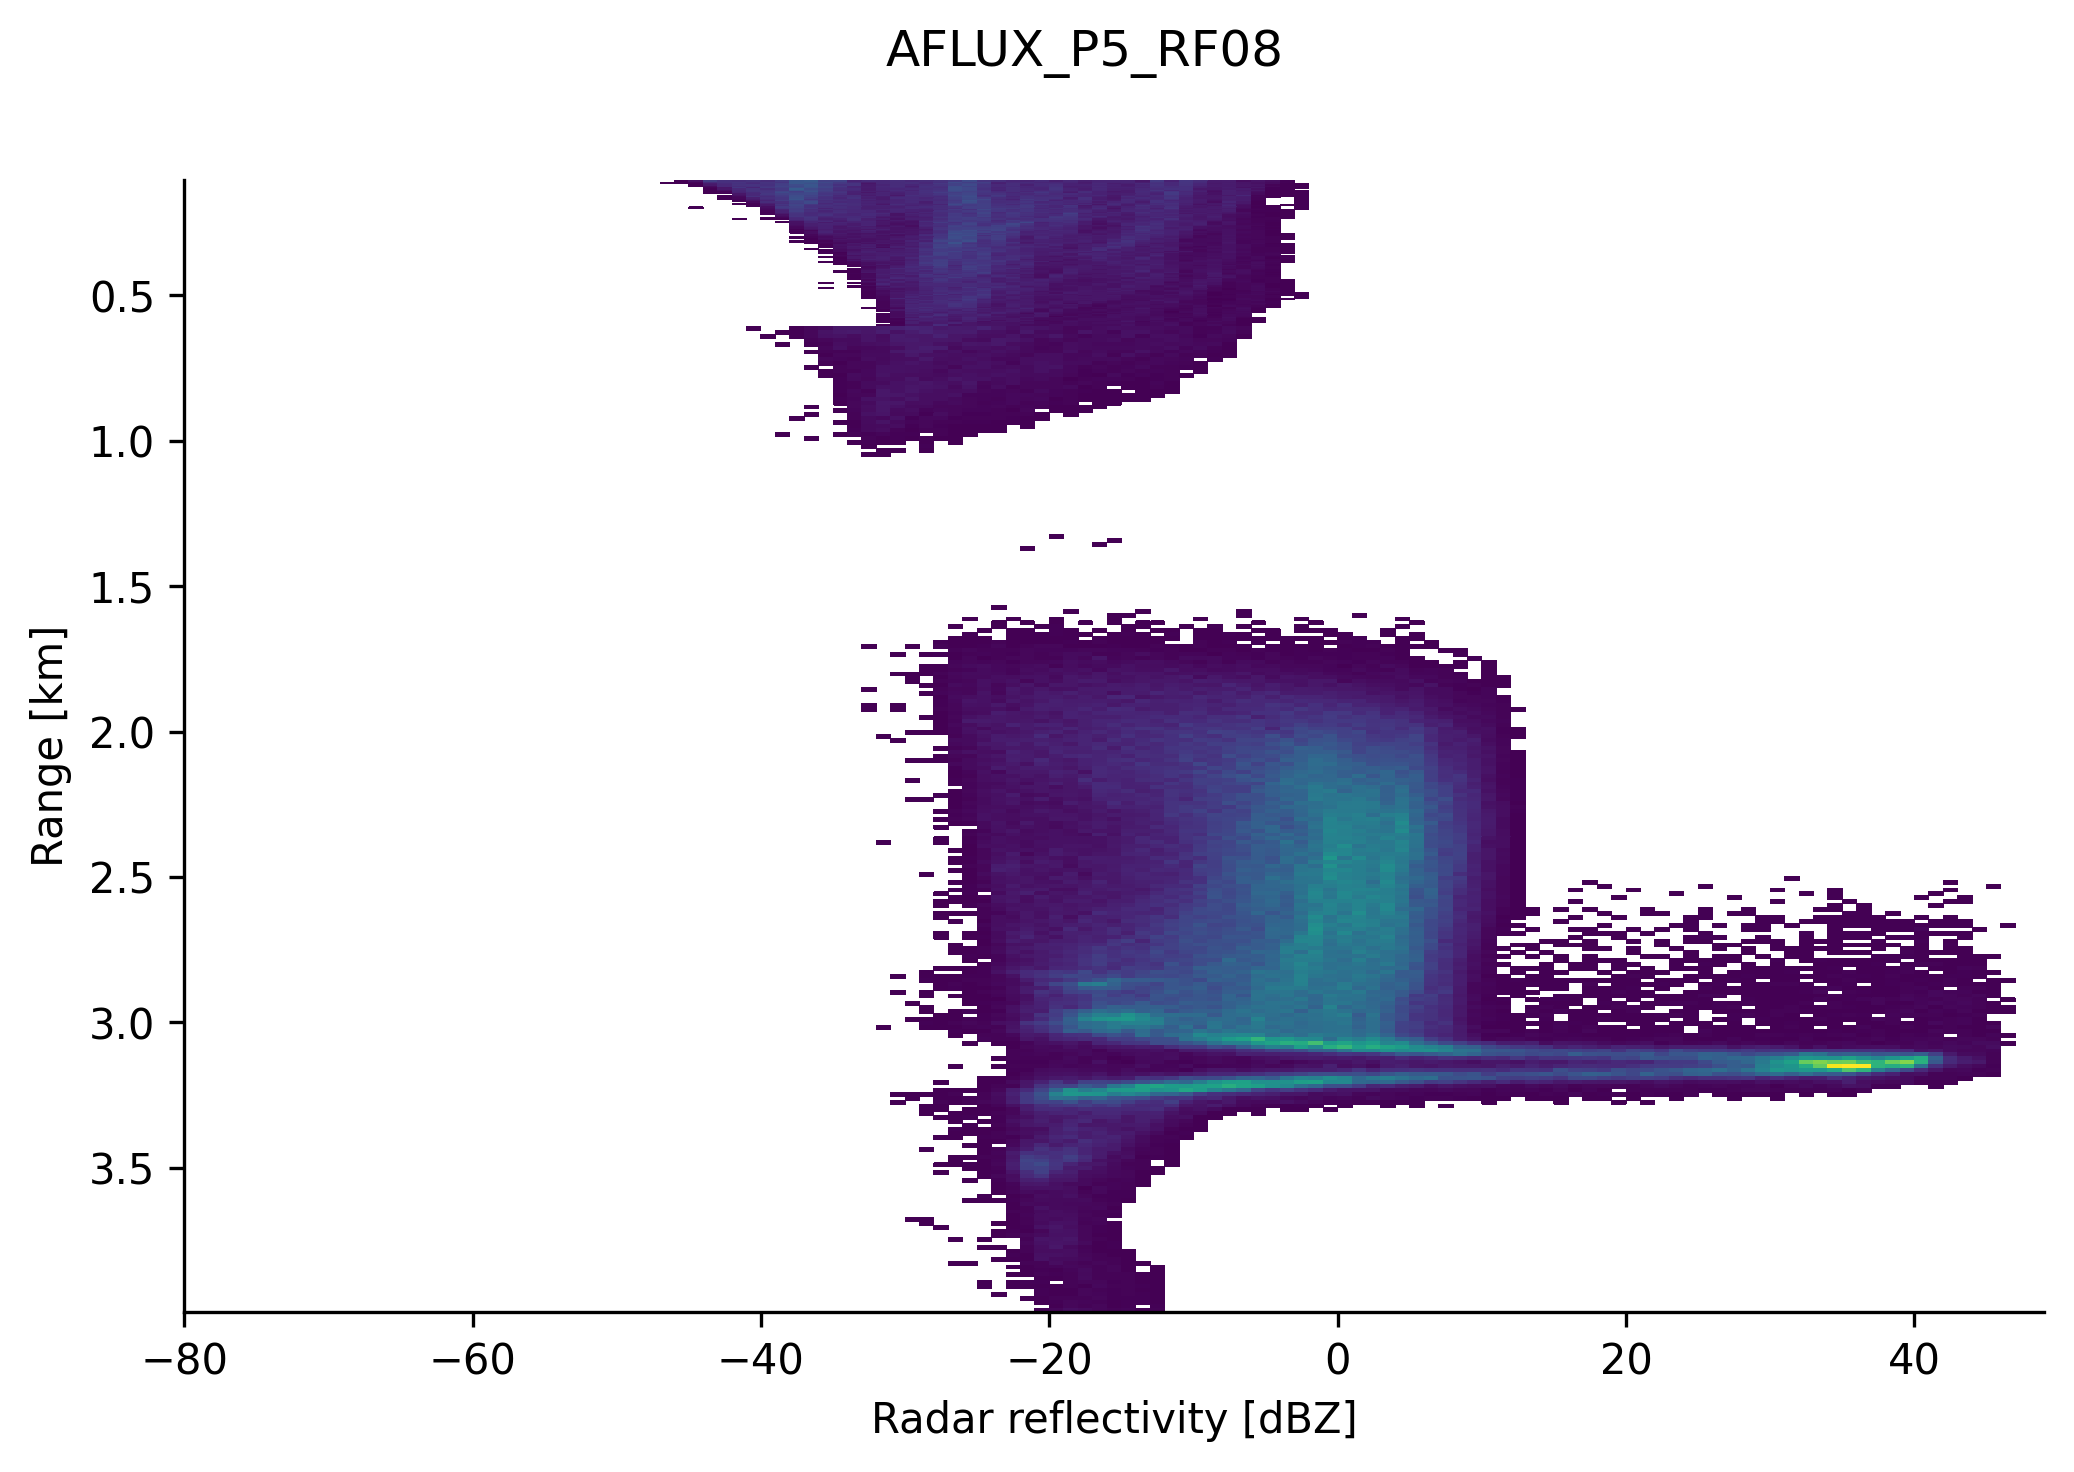

In [23]:
flight_id = 'AFLUX_P5_RF08'
cfad(flight_id)

### RF09, 2019-04-01

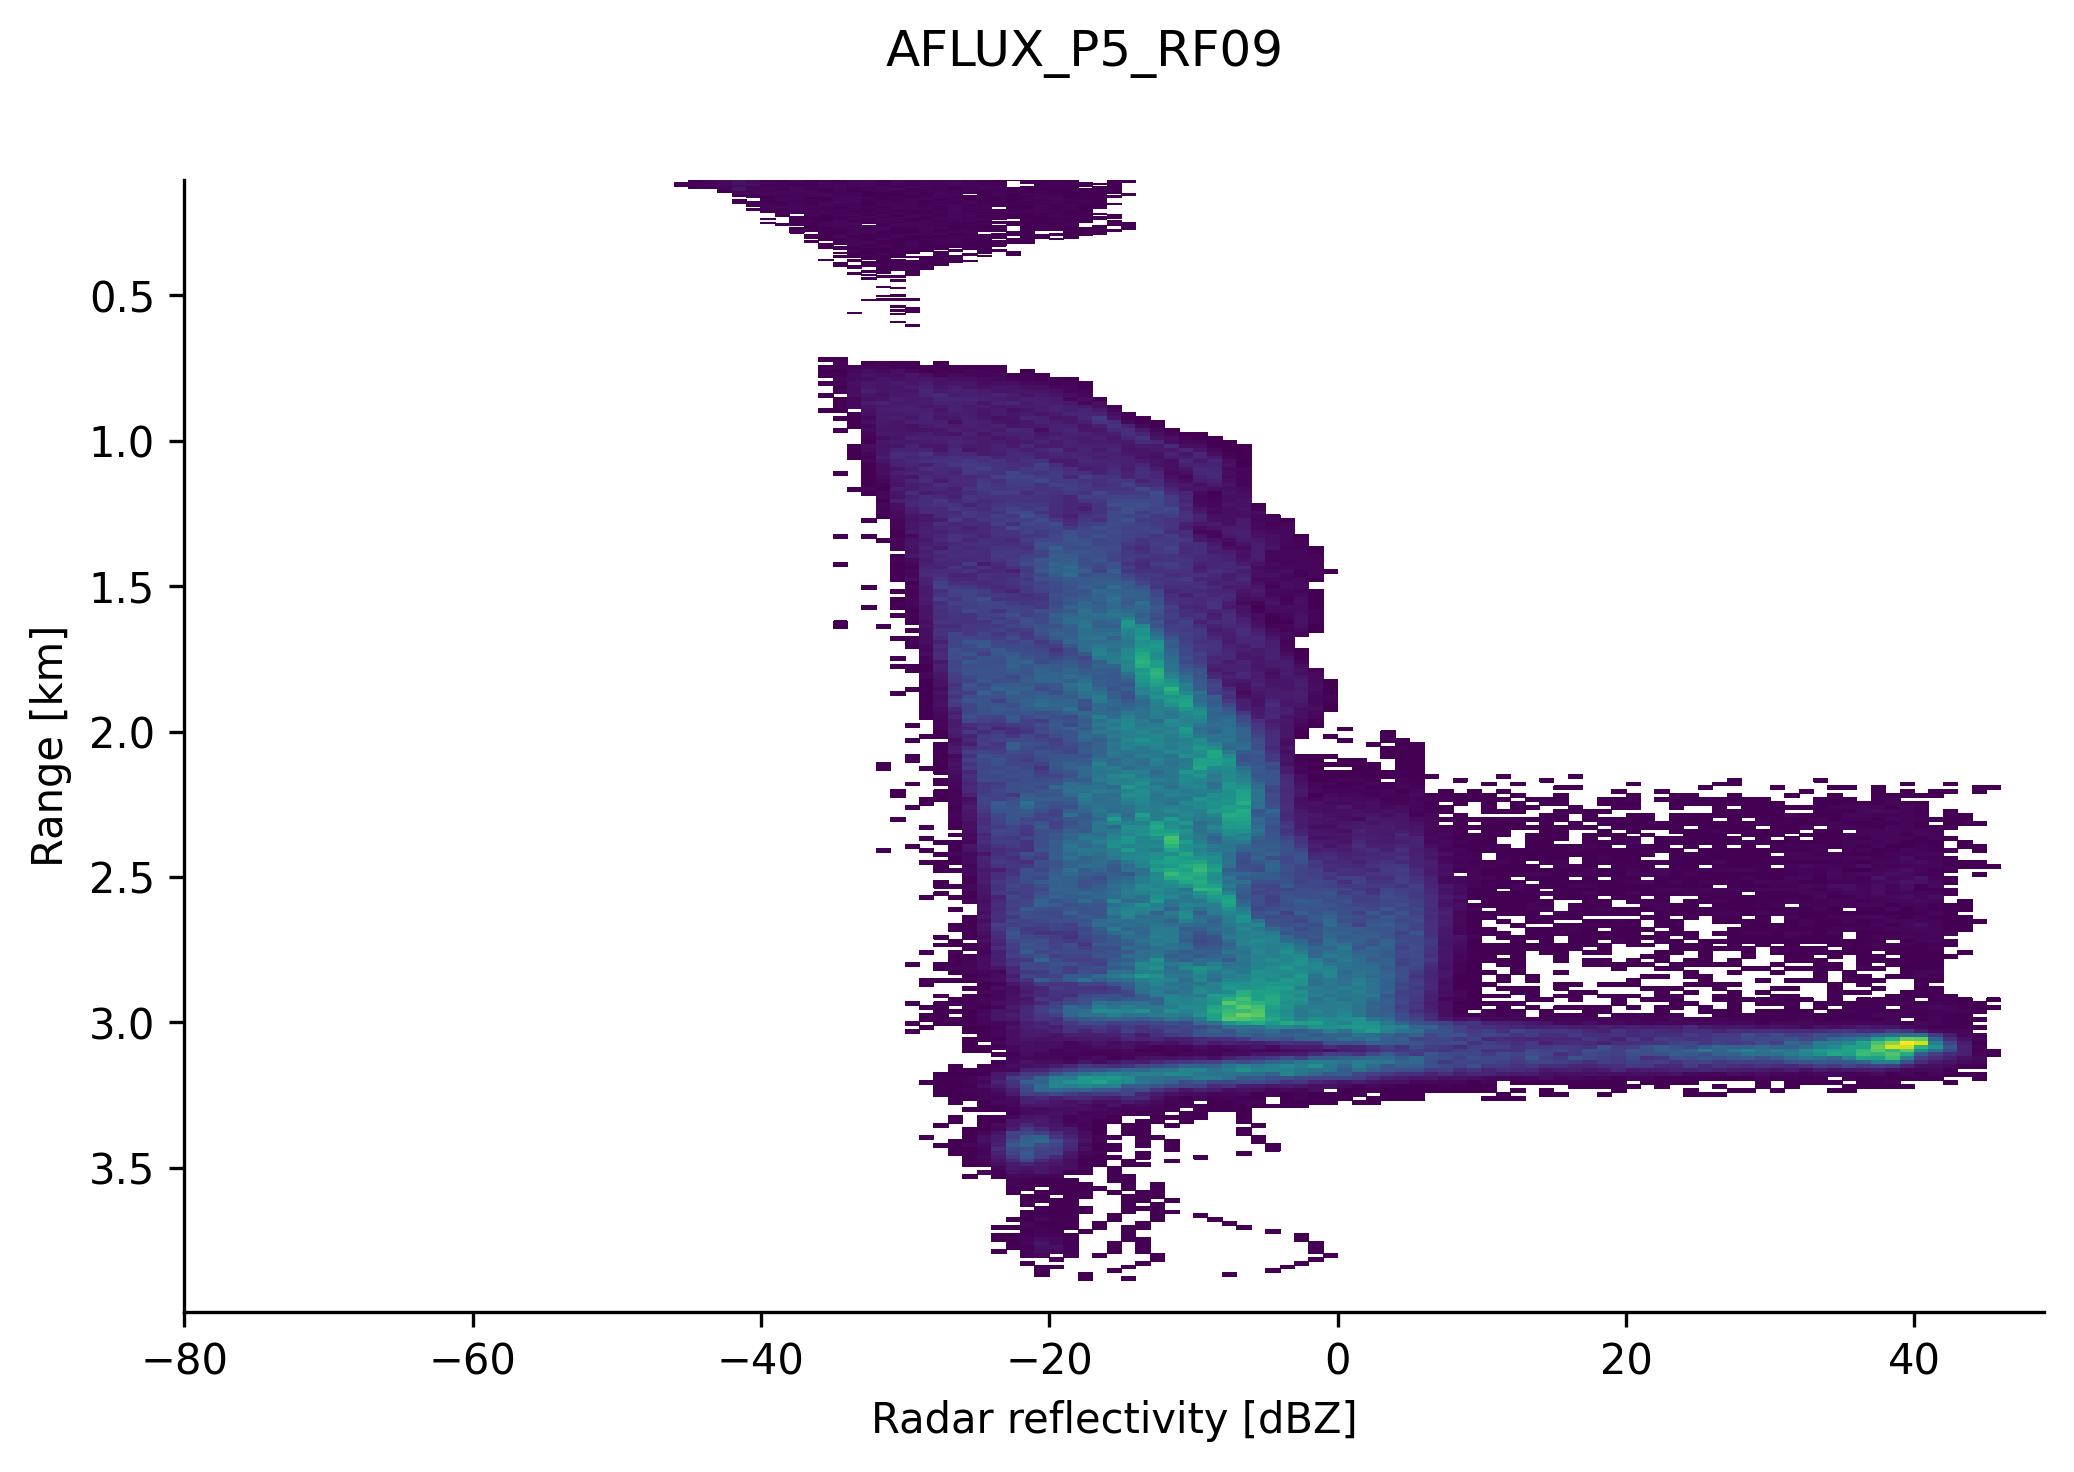

In [24]:
flight_id = 'AFLUX_P5_RF09'
cfad(flight_id)

### RF10, 2019-04-03

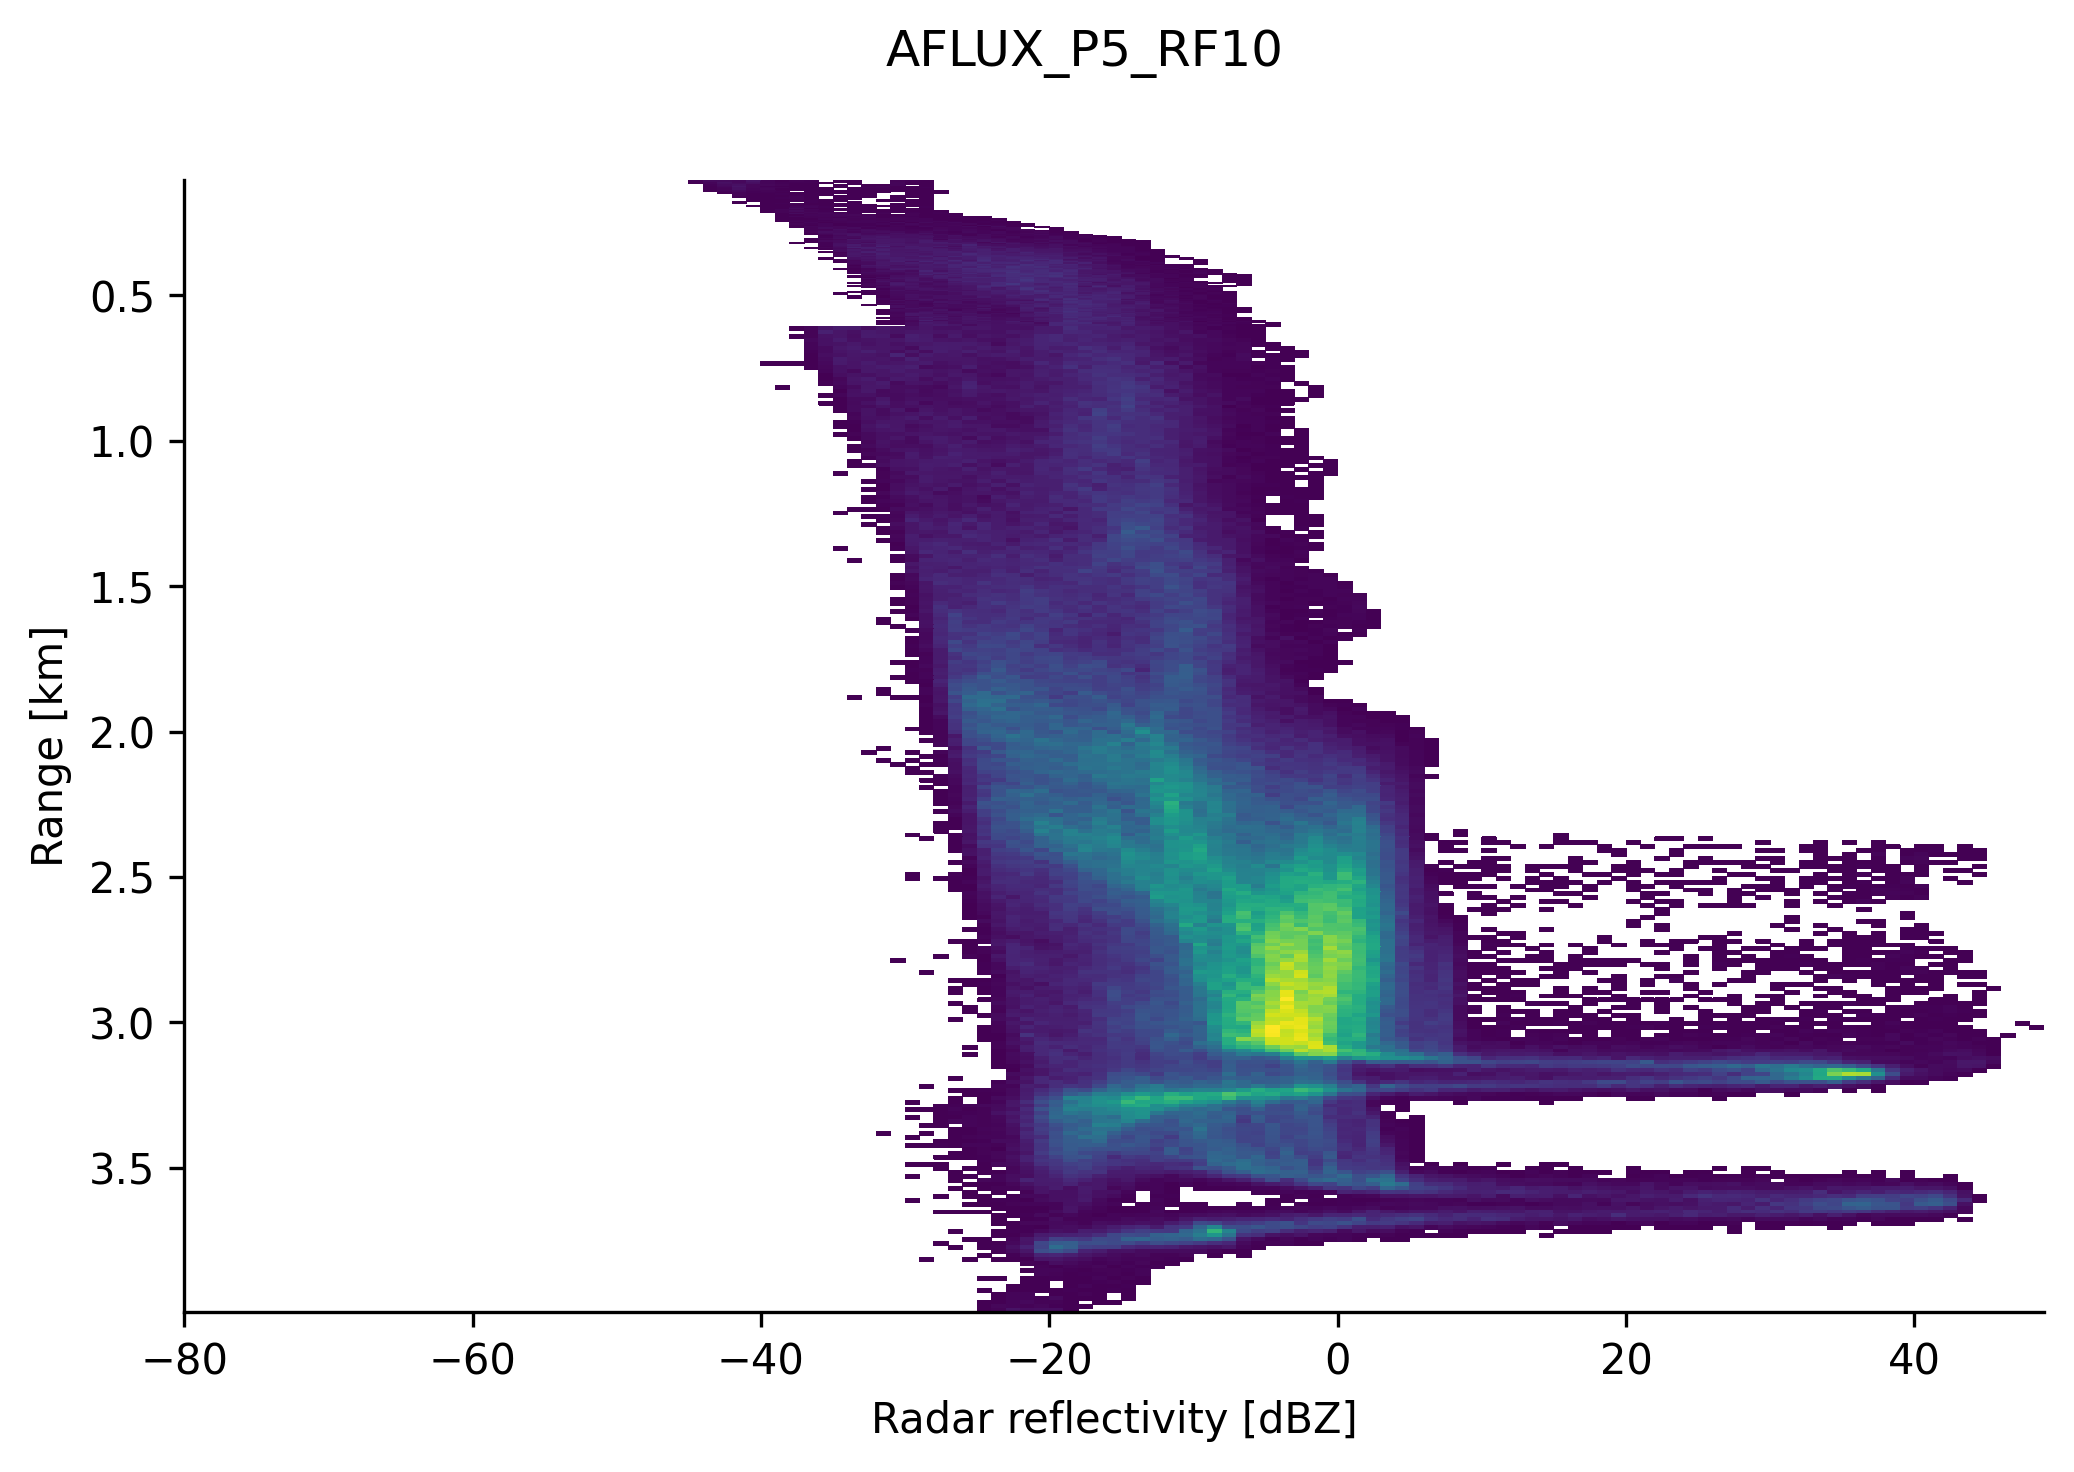

In [25]:
flight_id = 'AFLUX_P5_RF10'
cfad(flight_id)

### RF11, 2019-04-04

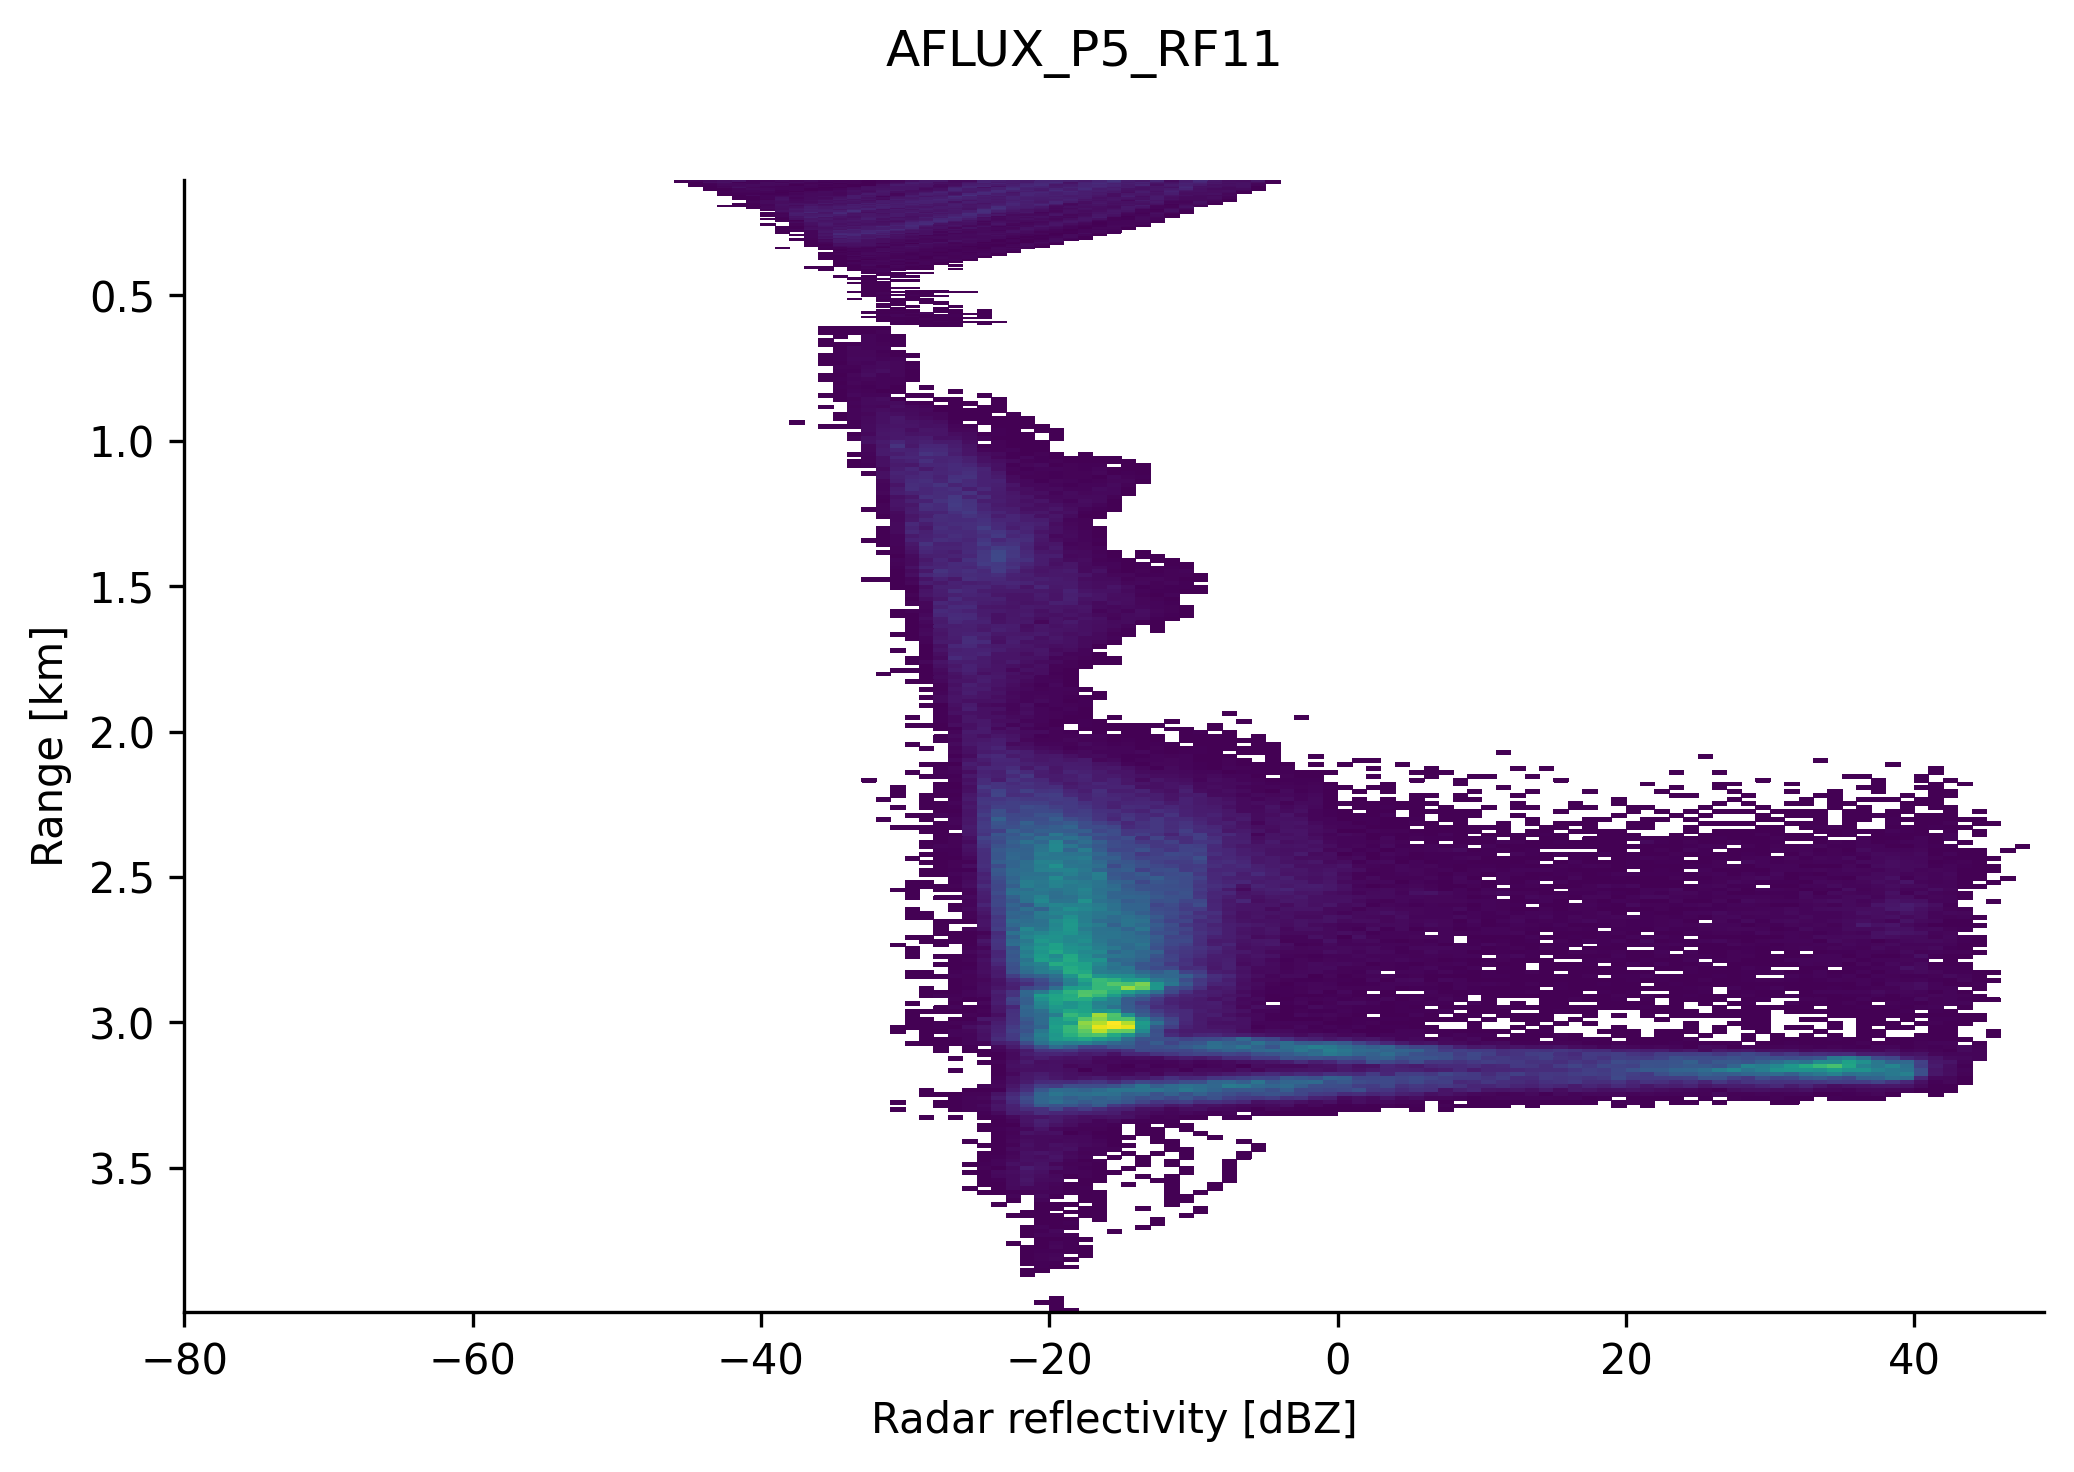

In [26]:
flight_id = 'AFLUX_P5_RF11'
cfad(flight_id)

### RF12, 2019-04-06

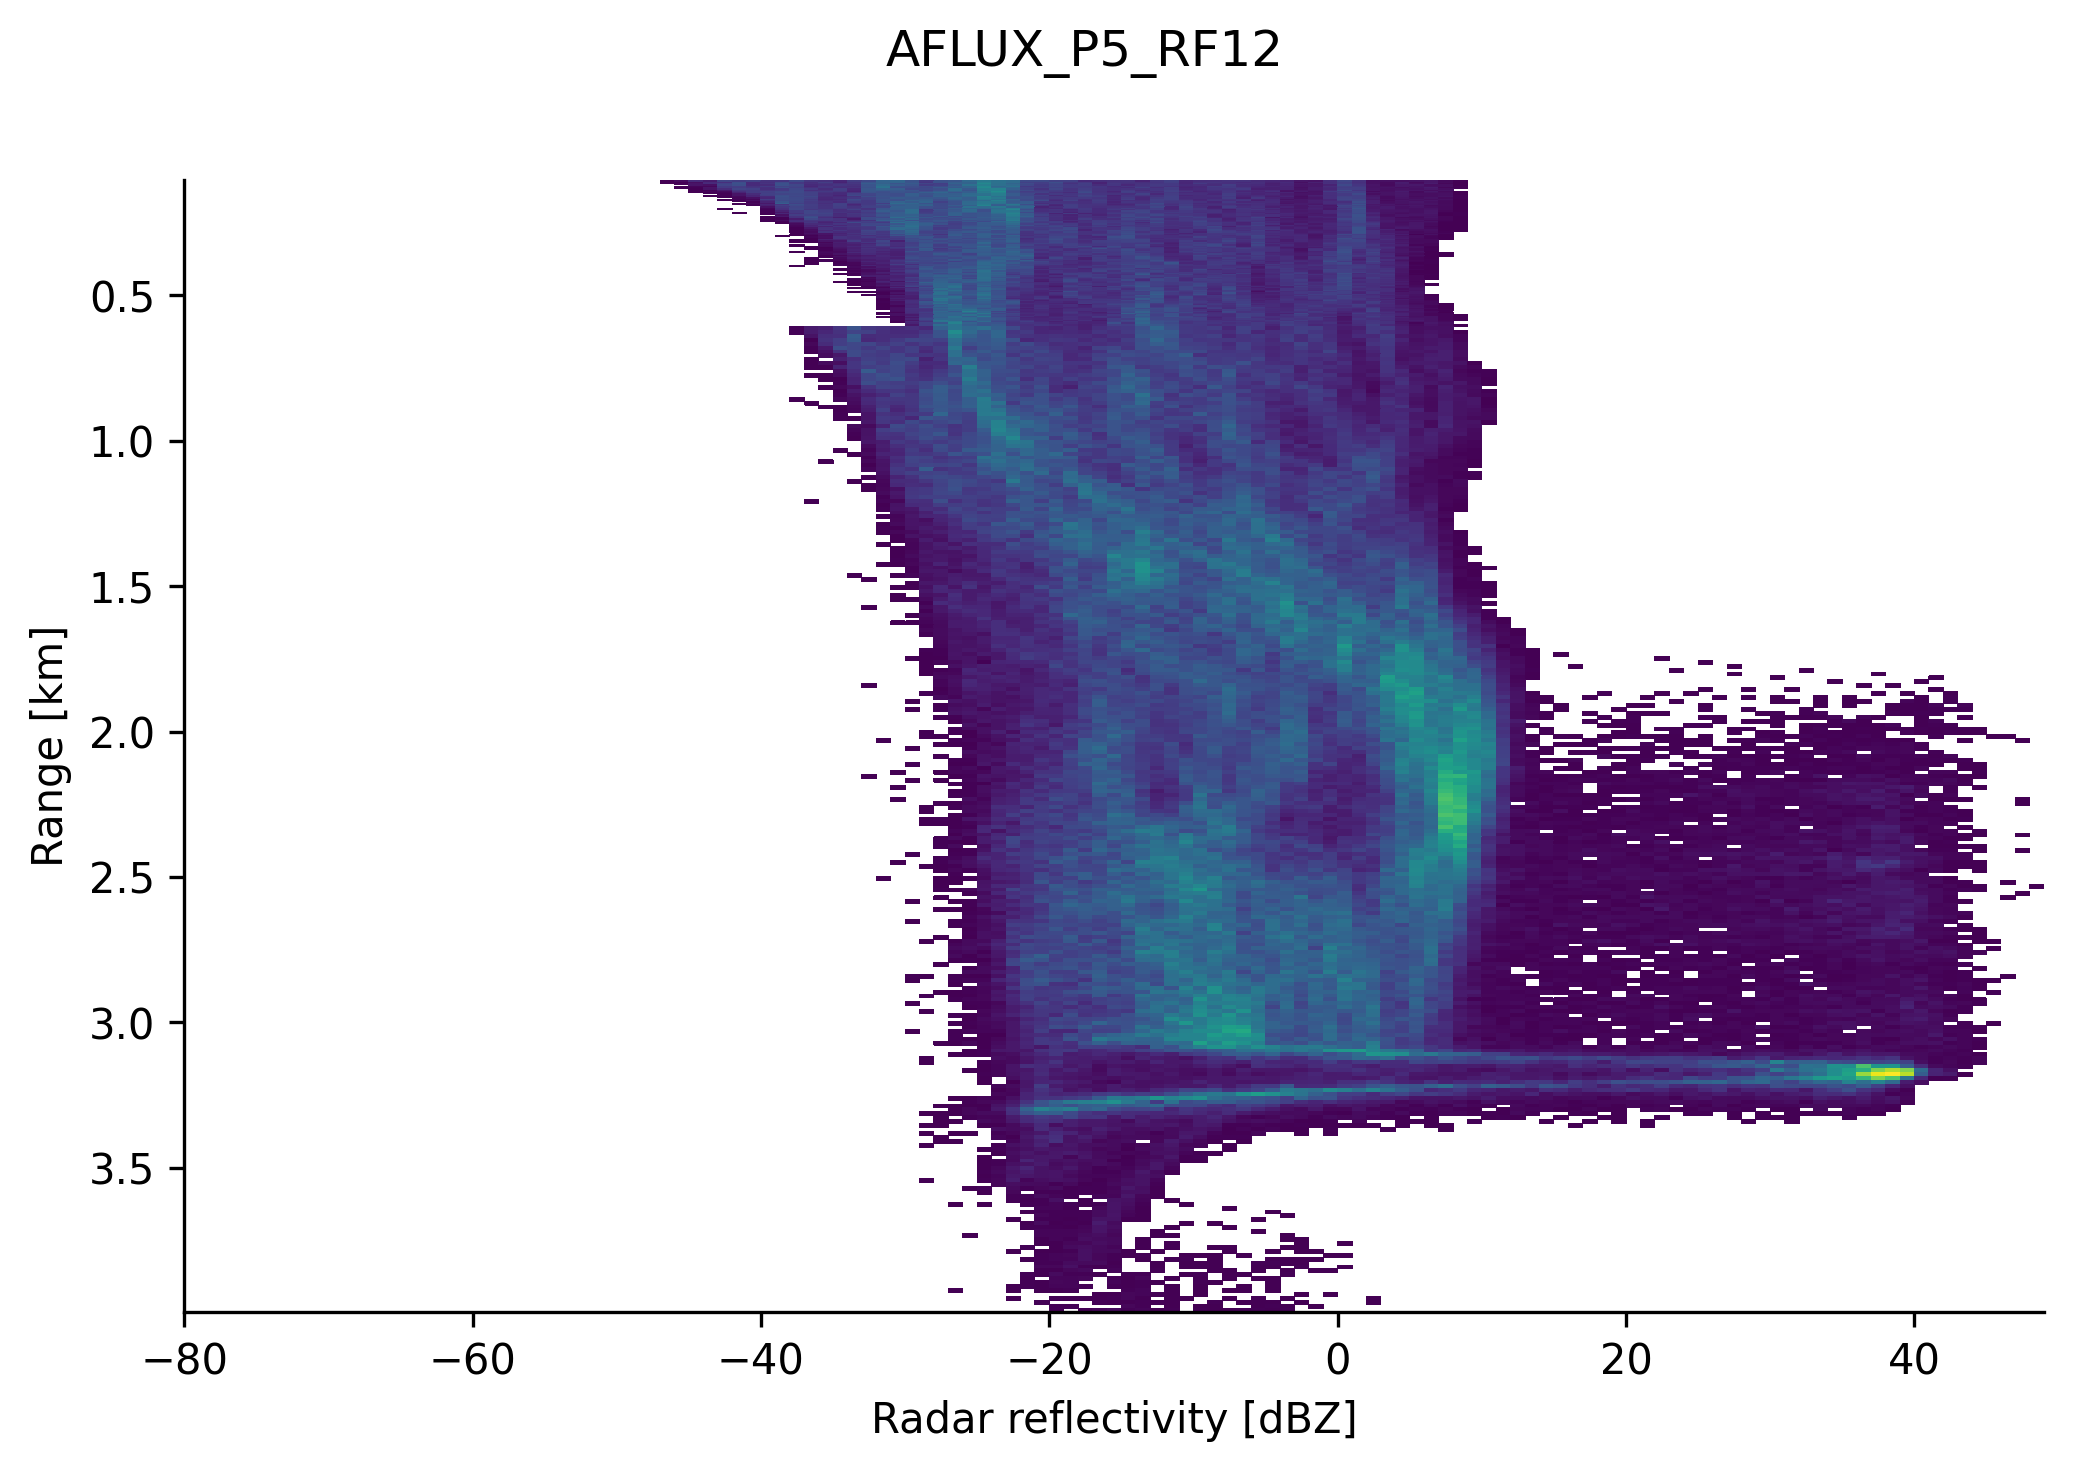

In [27]:
flight_id = 'AFLUX_P5_RF12'
cfad(flight_id)

### RF13, 2019-04-07

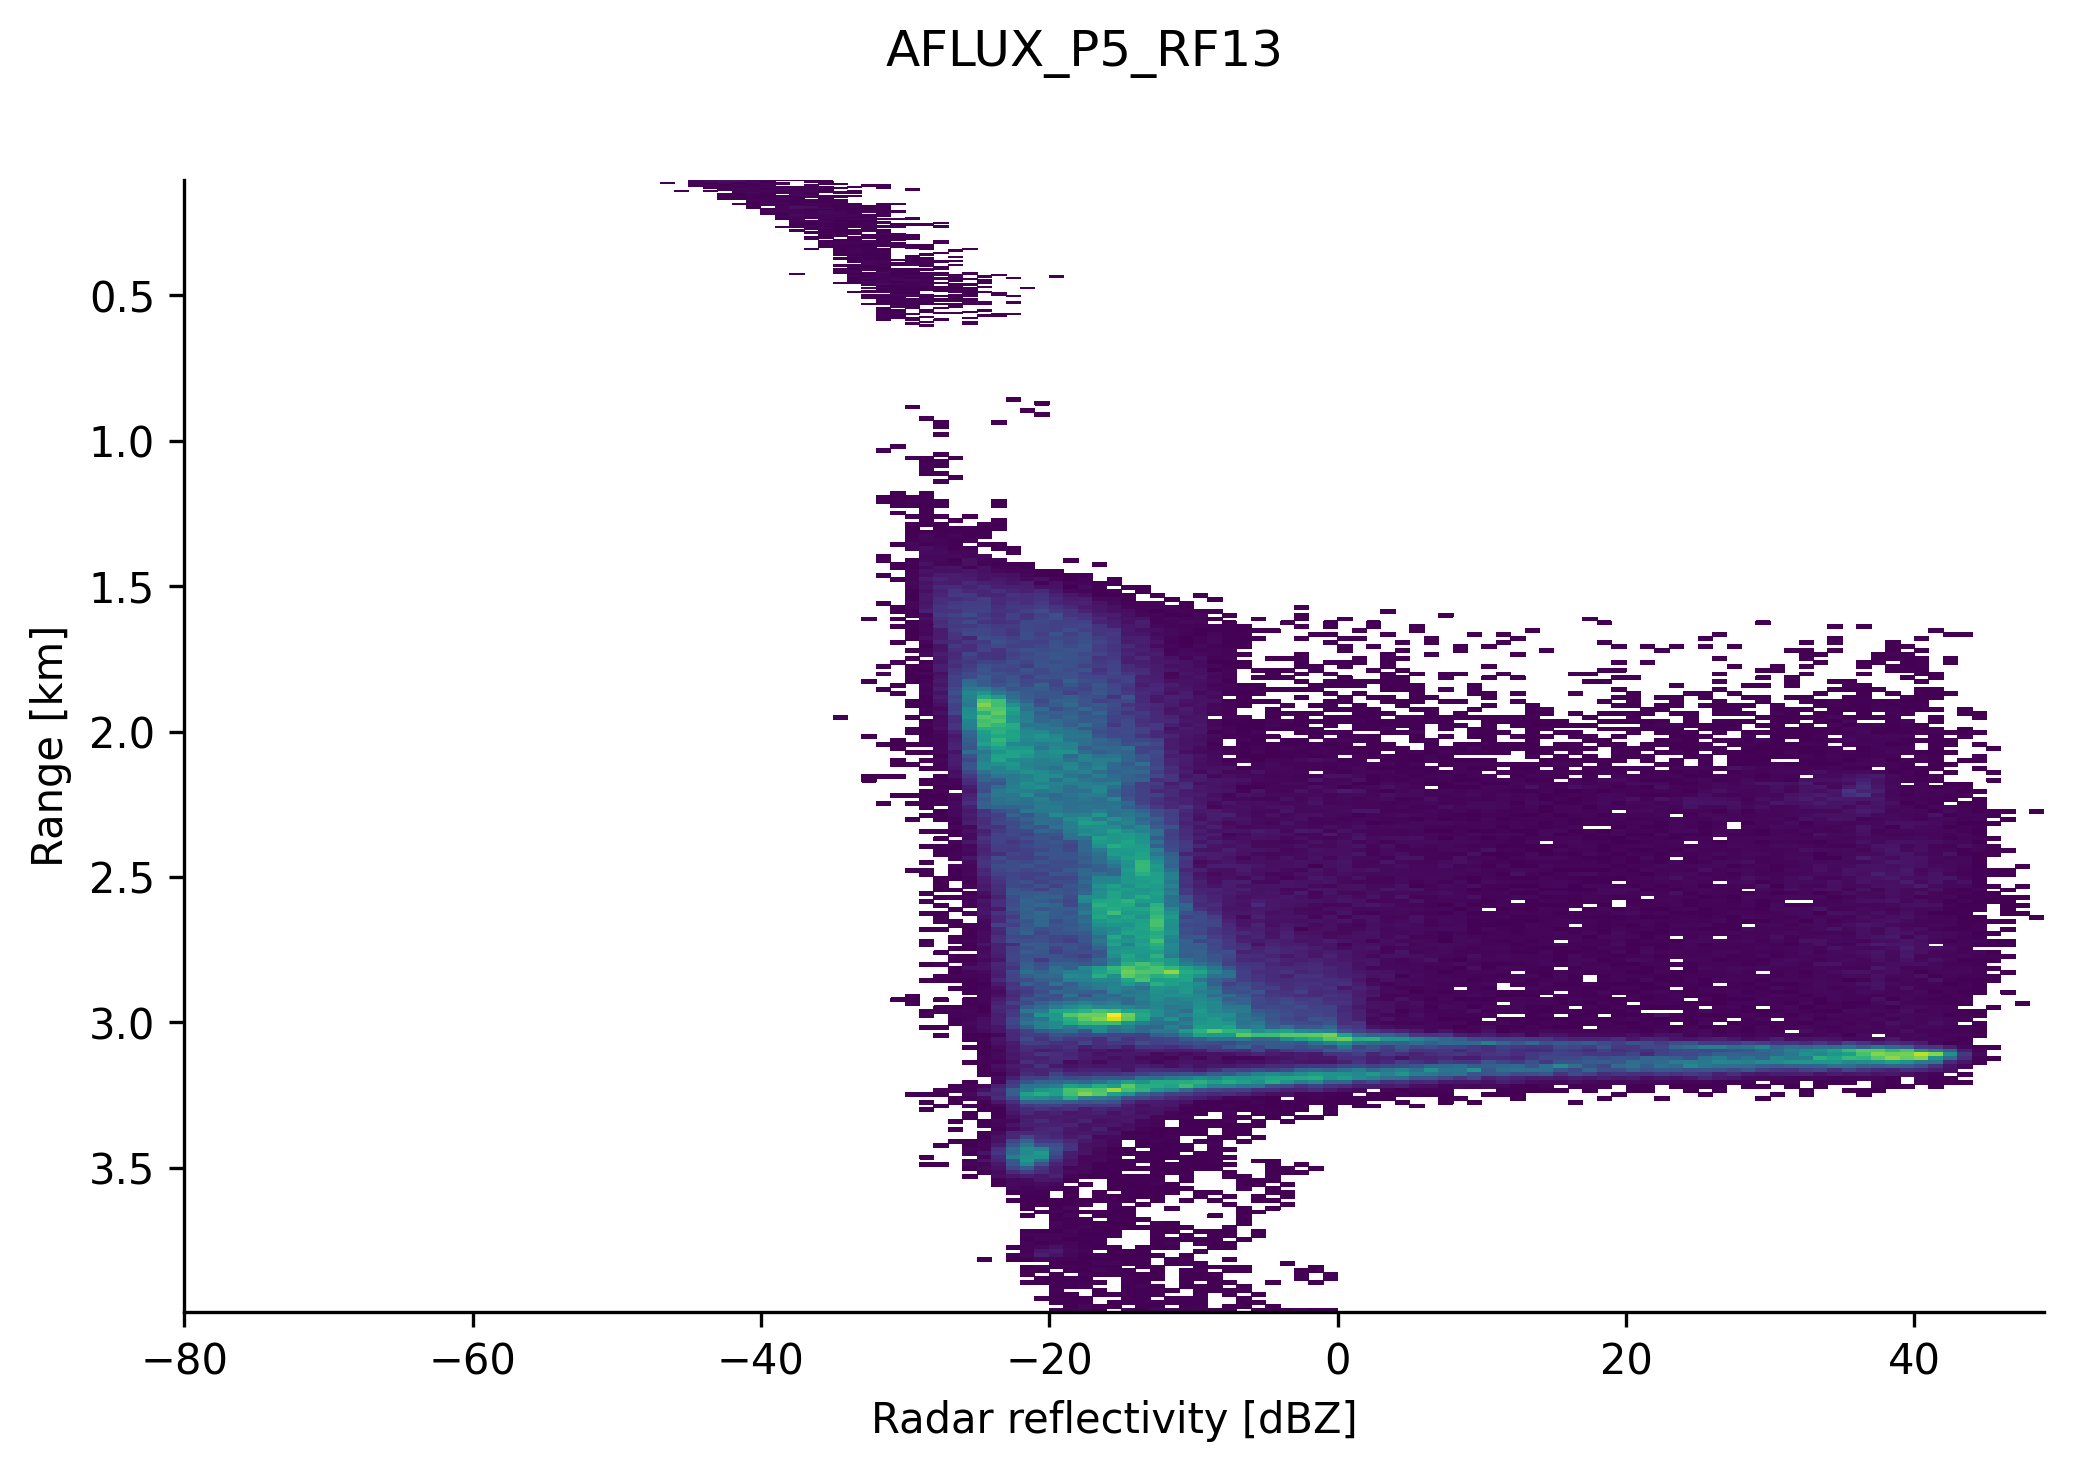

In [28]:
flight_id = 'AFLUX_P5_RF13'
cfad(flight_id)

### RF14, 2019-04-08

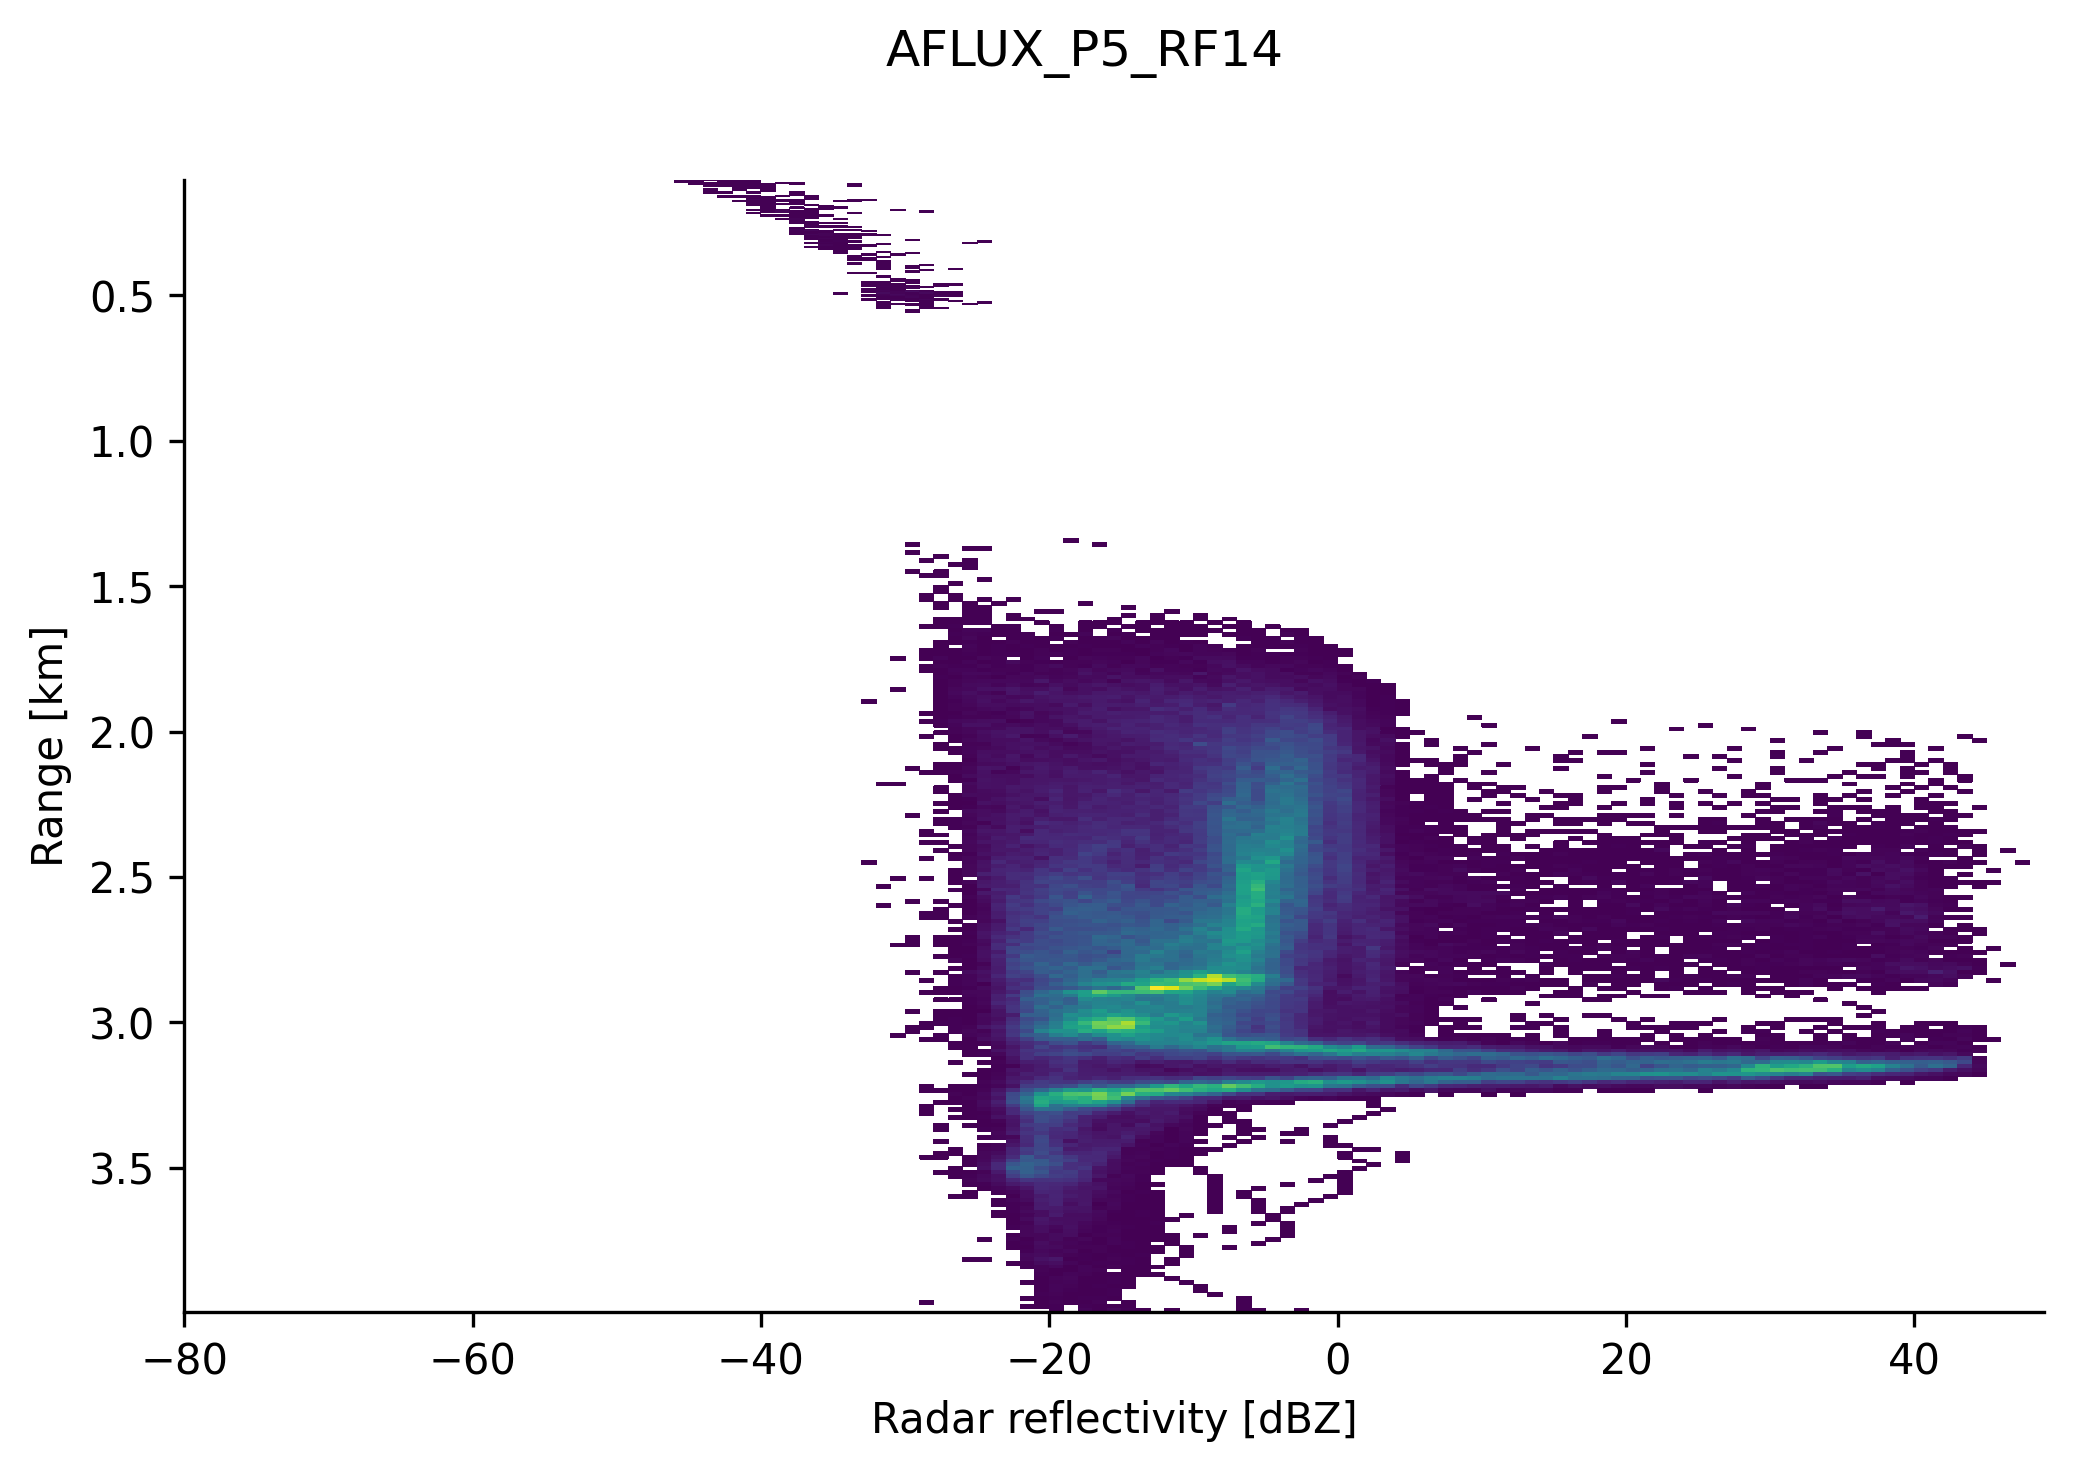

In [29]:
flight_id = 'AFLUX_P5_RF14'
cfad(flight_id)

### RF15, 2019-04-11

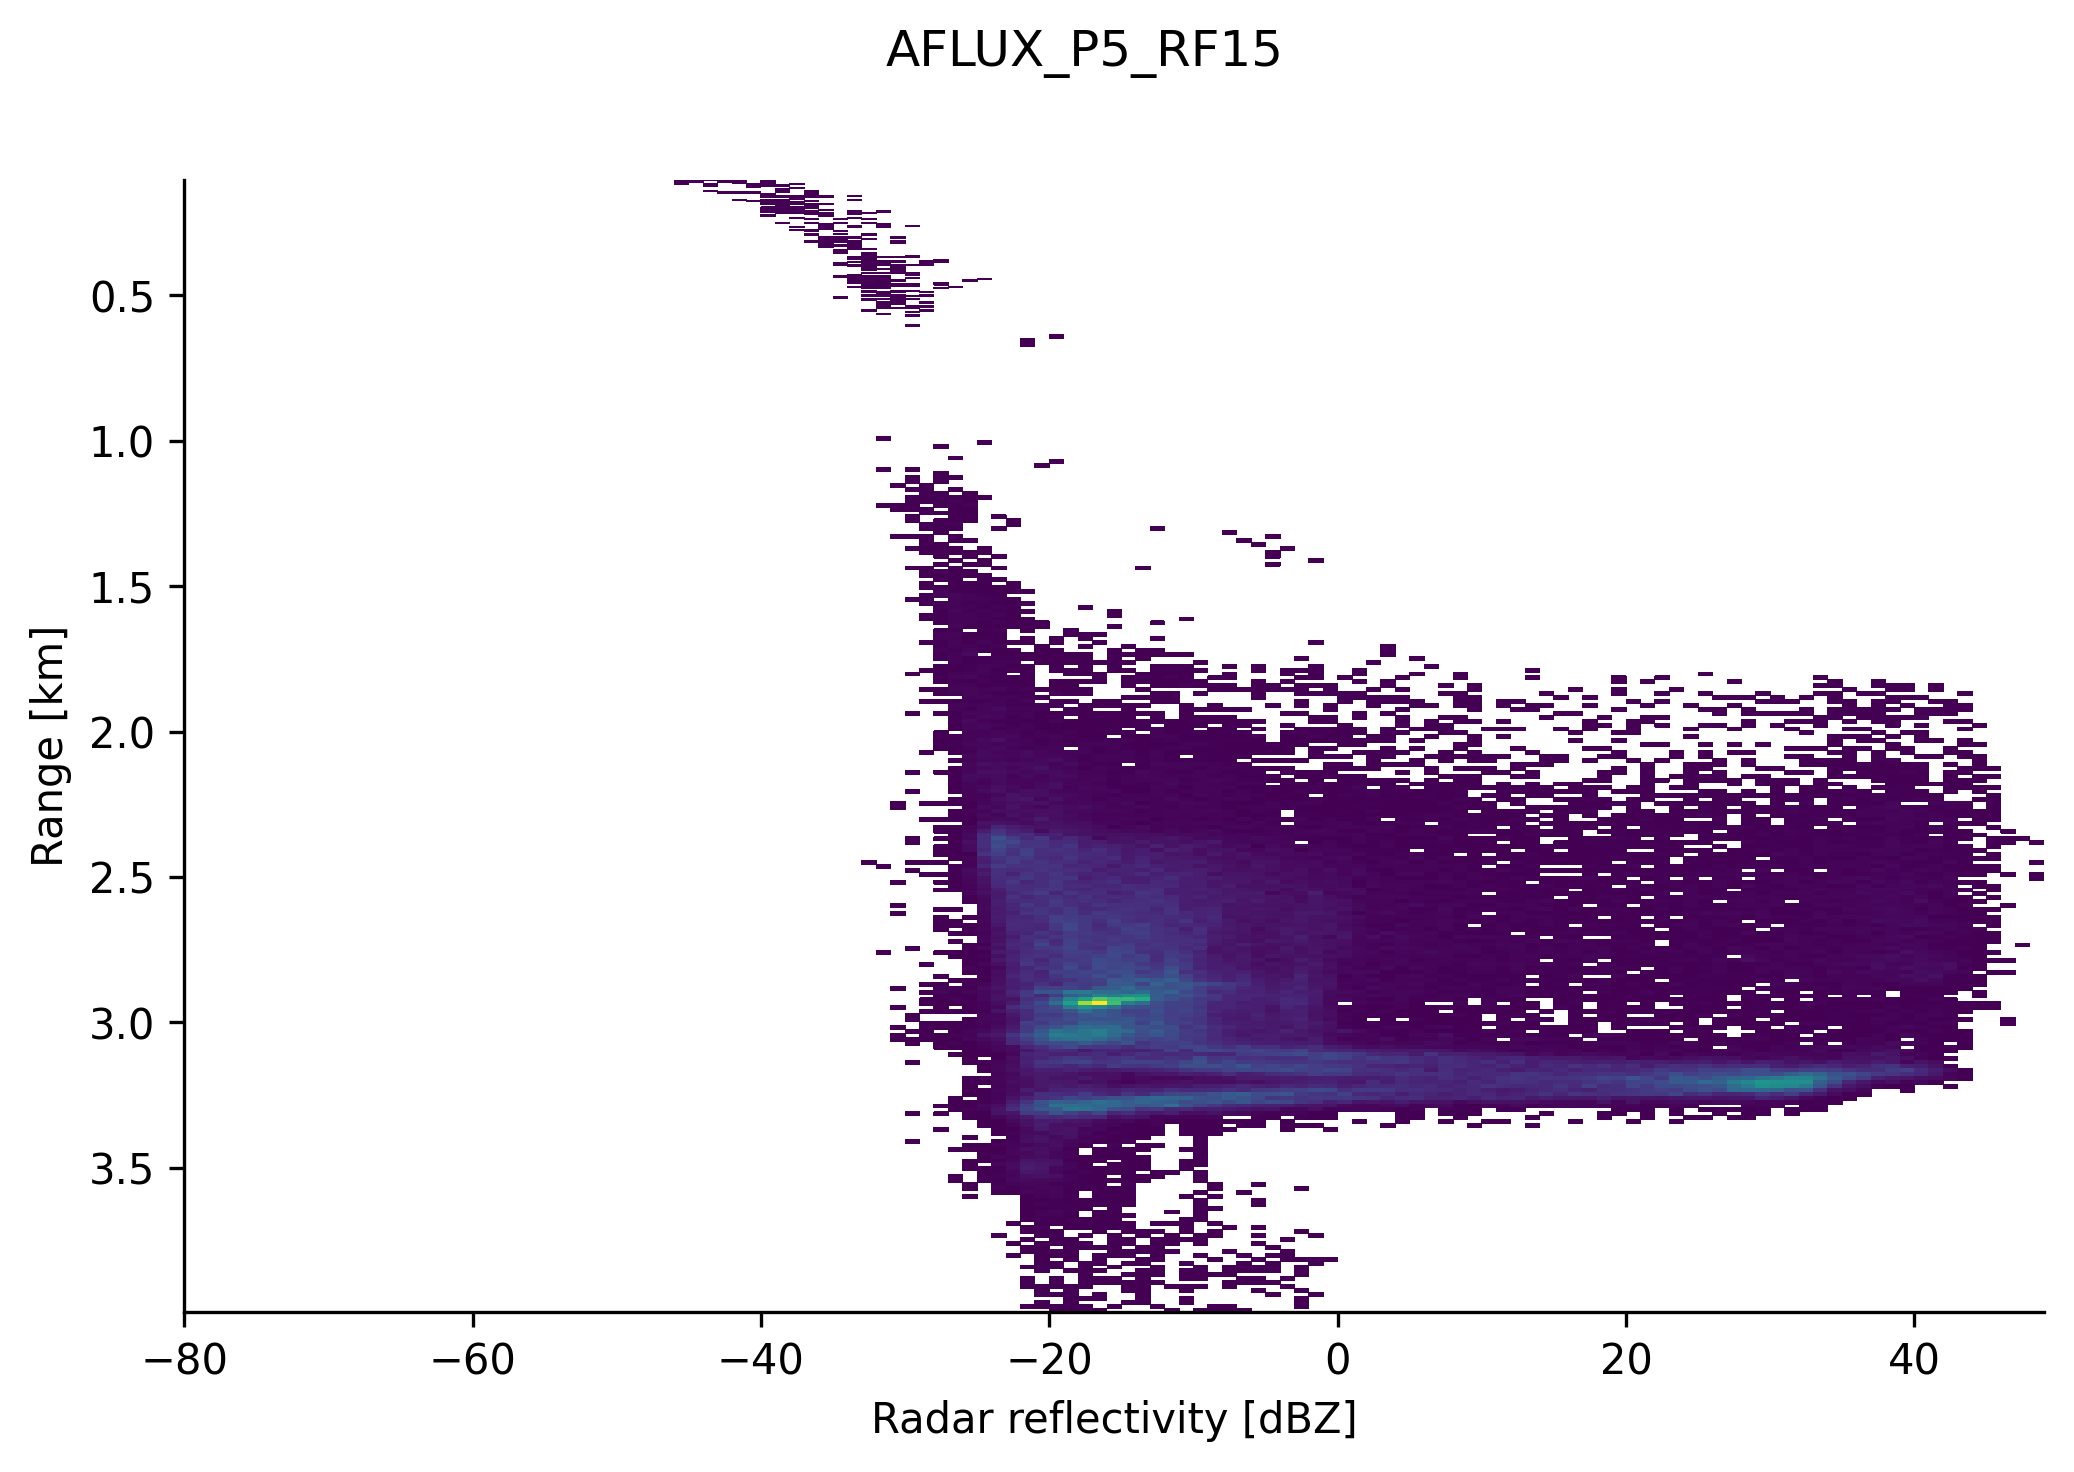

In [30]:
flight_id = 'AFLUX_P5_RF15'
cfad(flight_id)

## MOSAiC-ACA

### RF05, 2020-09-02

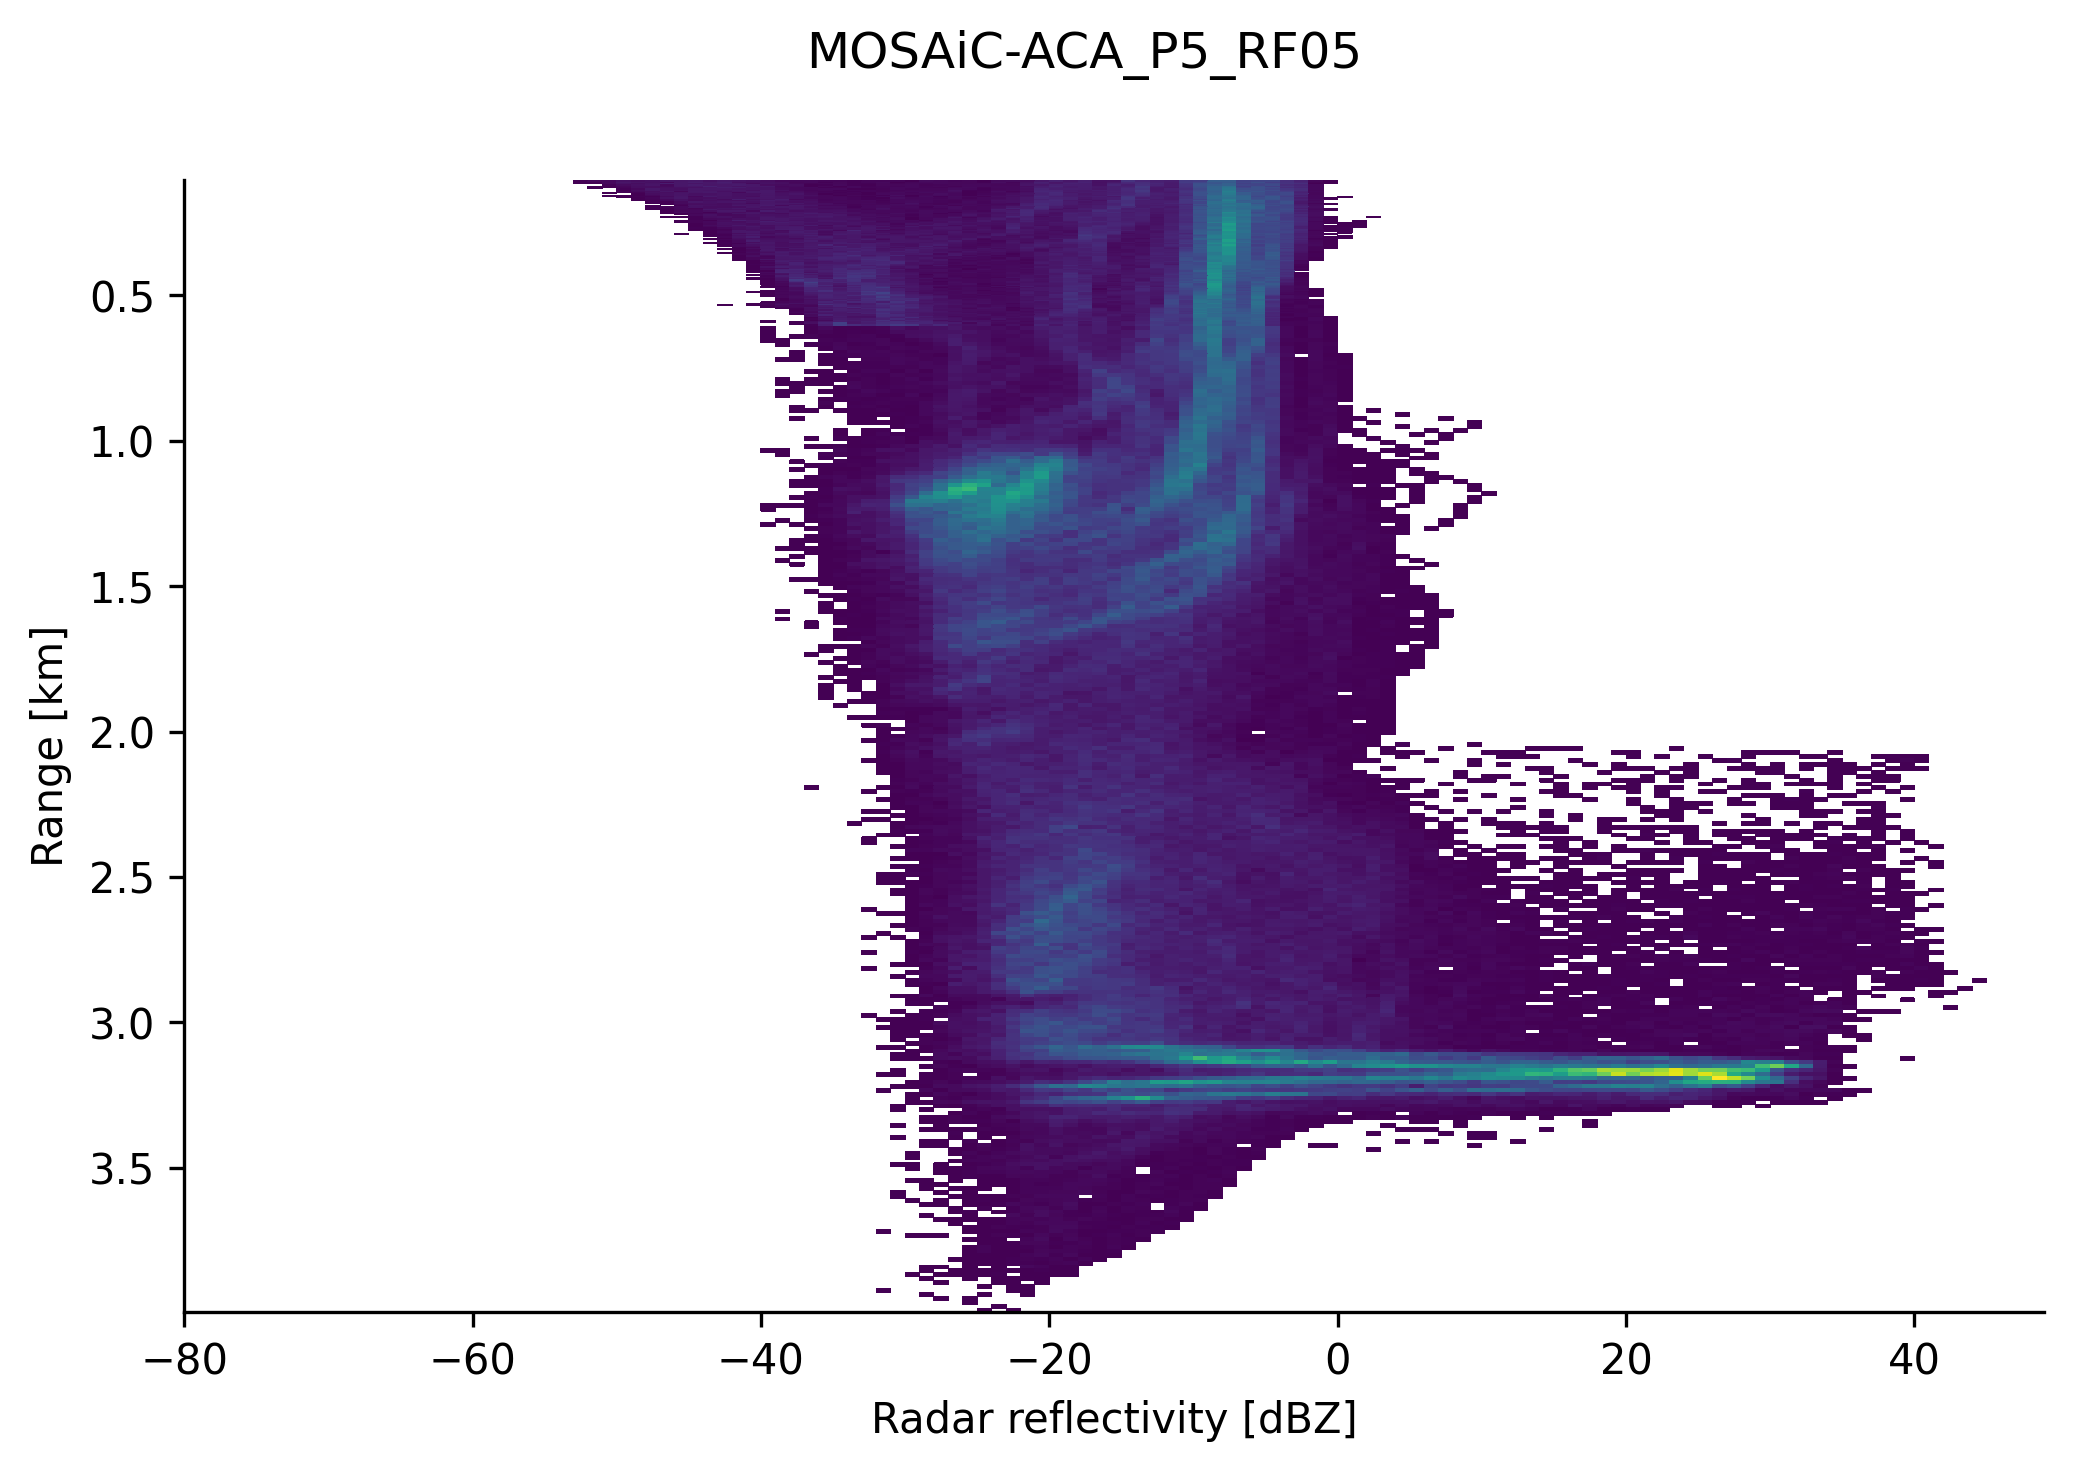

In [31]:
flight_id = 'MOSAiC-ACA_P5_RF05'
cfad(flight_id)

In [48]:
flight_id = 'MOSAiC-ACA_P5_RF05'

ds = read_data(flight_id)

In [50]:
ds

<xarray.Dataset>
Dimensions:            (scalar: 1, range: 364, T_range: 93, H_range: 93, number.chirp.sequences: 2, time: 17365, velocity: 512)
Coordinates:
  * range              (range) float32 102.9 107.3 111.8 ... 3.983e+03 3.996e+03
  * time               (time) datetime64[ns] 2020-09-02T06:55:45 ... 2020-09-...
Dimensions without coordinates: scalar, T_range, H_range, number.chirp.sequences, velocity
Data variables: (12/57)
    freq_sb            (scalar) float32 ...
    wl                 (scalar) float32 ...
    hpbw               (scalar) float32 ...
    alias_flag         (scalar) int8 ...
    filecode           (scalar) int32 ...
    n_levels           (scalar) int32 ...
    ...                 ...
    kurt               (time, range) float32 ...
    PNv                (time, range) float32 ...
    SLv                (time, range) float32 ...
    sze                (time, range, velocity) float32 ...
    v_noise_pow_mean   (time, range) float32 ...
    v_noise_pow_peak   (time, range) float32 ...
Attributes: (12/23)
    FillValue:         NaN
    program_name:      Flight HR 1sec
    PI_NAME:           Mario;Mech
    PI_AFFILIATION:    University of Cologne (UNI);Germany
    PI_ADDRESS:        University of Cologne; Institute for Geophysics and Me...
    PI_MAIL:           mario.mech@uni-koeln.de
    ...                ...
    DATA_LOCATION:     Research station XYZ;Country
    DATA_SOURCE:       Radar.Standard.Moments.Ldr_mirac_a;run by UNI
    DATA_PROCESSING:   https://github.com/igmk/w-radar/releases/tag/v2.0_202007
    FILL_VALUE:        NaN
    INSTRUMENT_MODEL:  94 GHz single pol.
    MDF_PROGRAM_USED:  Flight HR 1sec

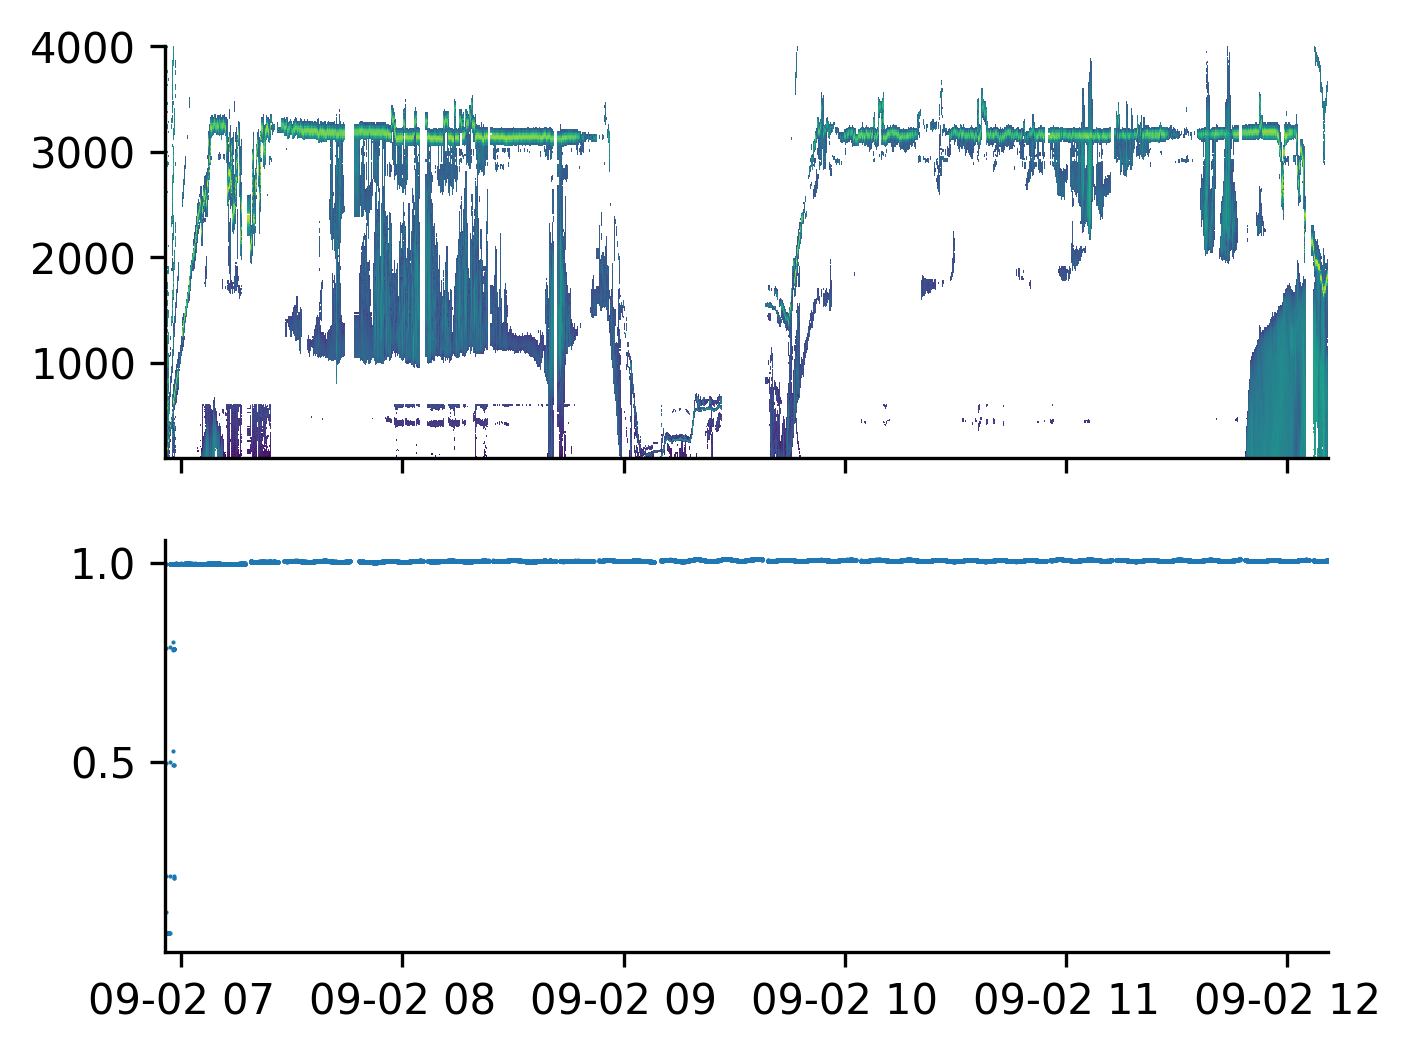

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

ax1.pcolormesh(ds.time, ds.range, 10*np.log10(ds.ze.T), shading='nearest')
ax2.scatter(ds.time, ds.p_trans, s=1, linewidths=0, )

plt.show()

### RF06, 2020-09-04

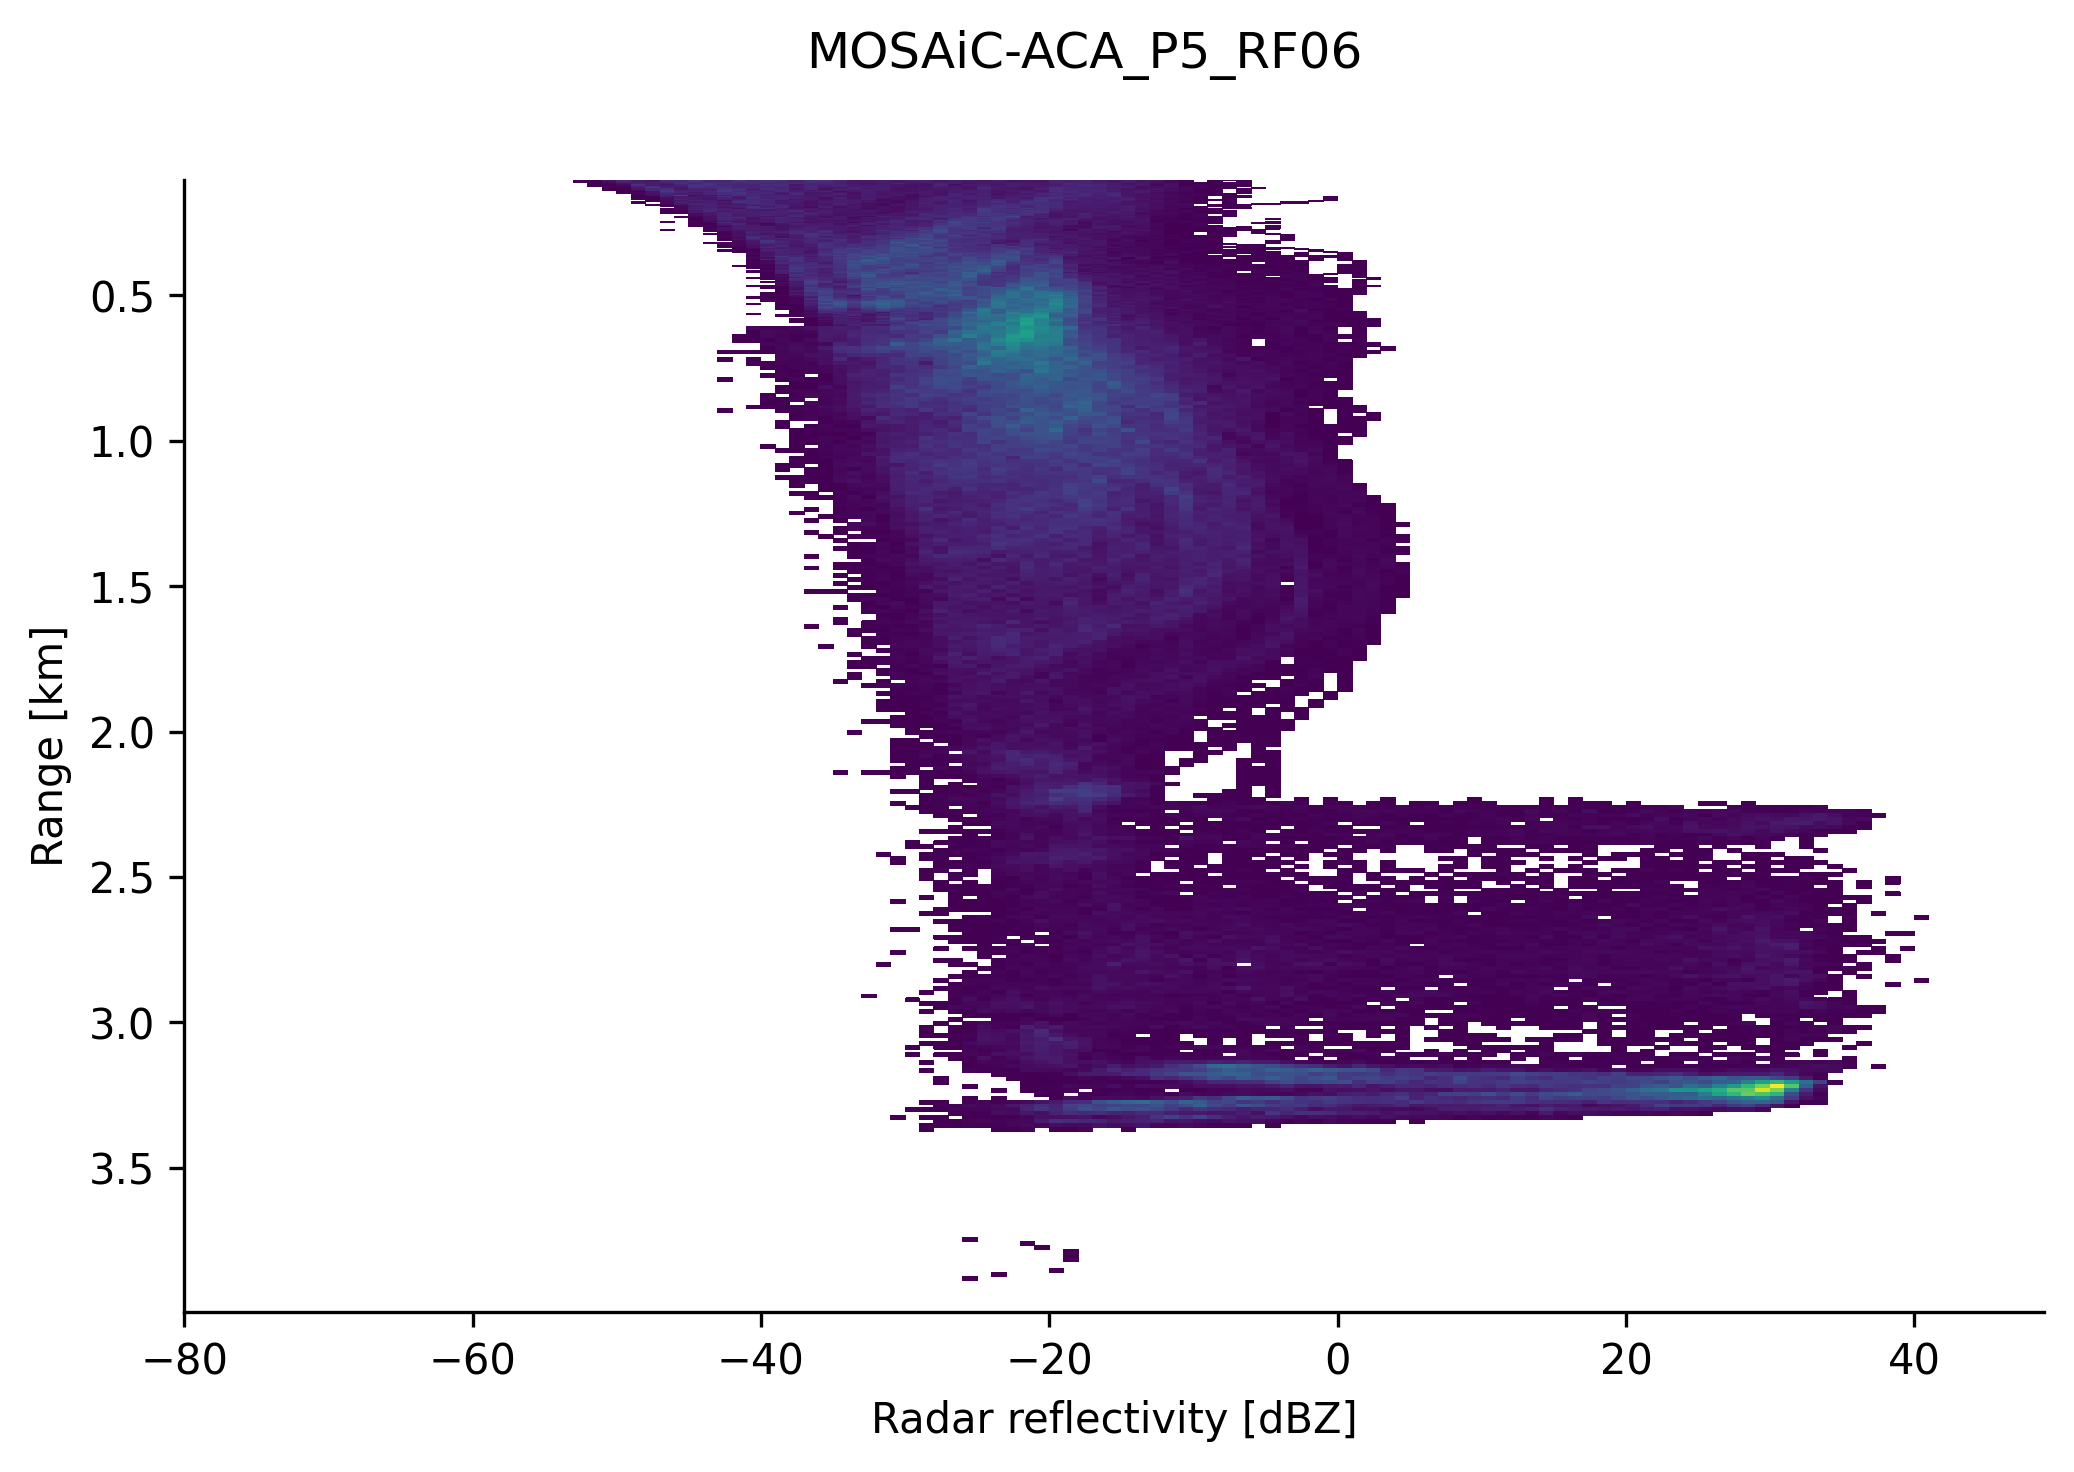

In [32]:
flight_id = 'MOSAiC-ACA_P5_RF06'
cfad(flight_id)

### RF07, 2020-09-07

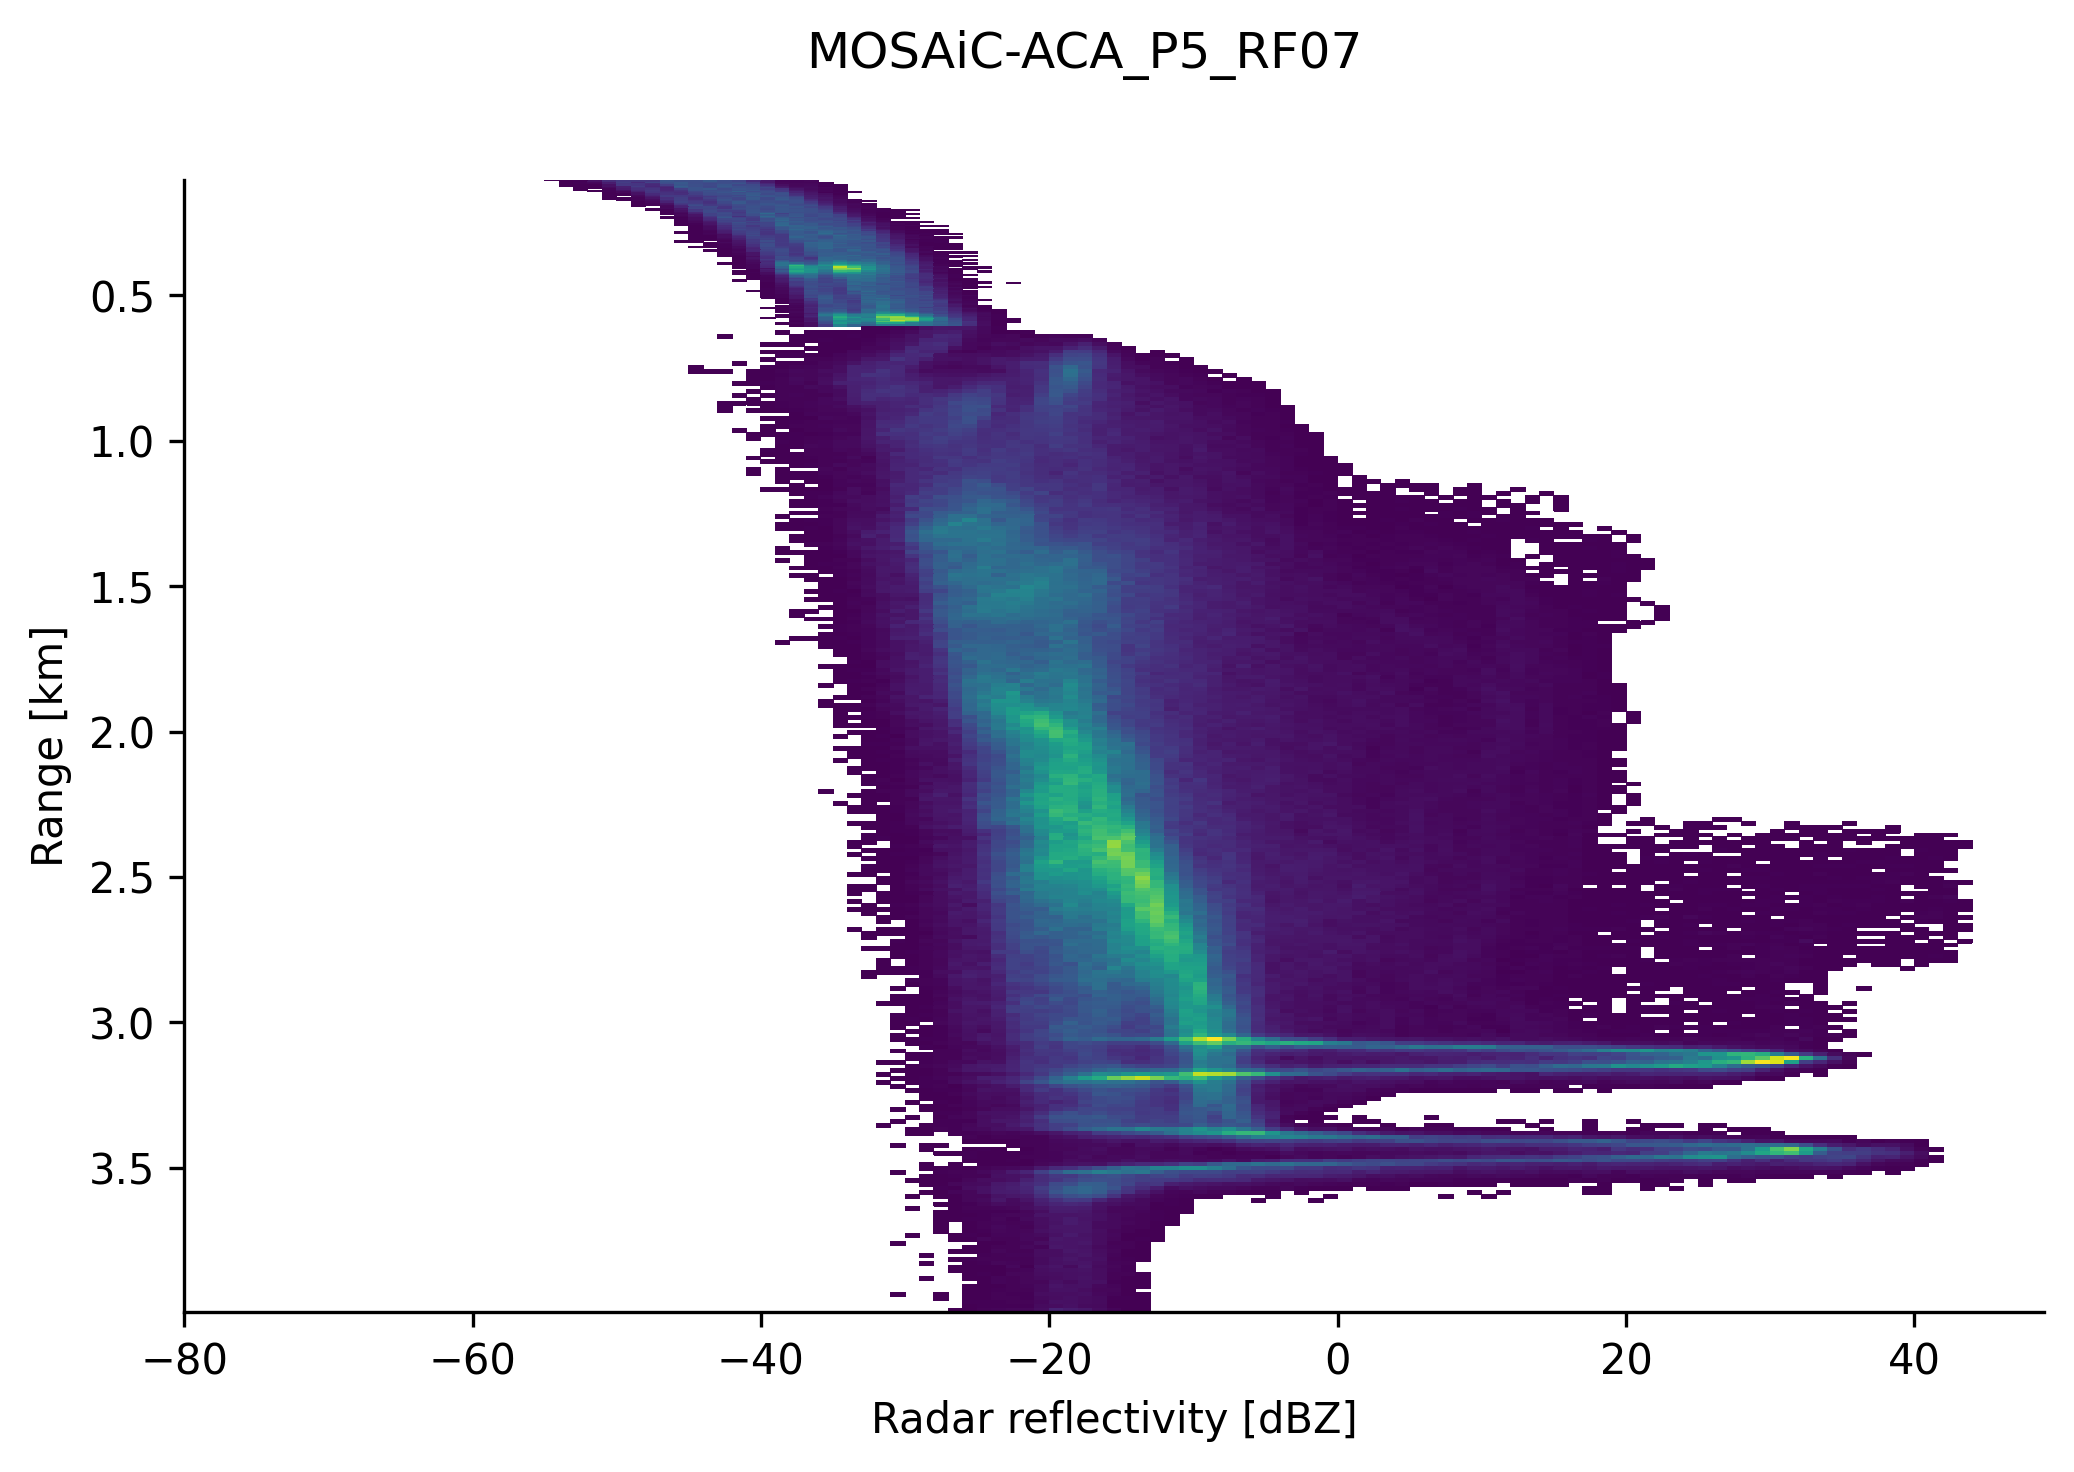

In [33]:
flight_id = 'MOSAiC-ACA_P5_RF07'
cfad(flight_id)

### RF08, 2020-09-08

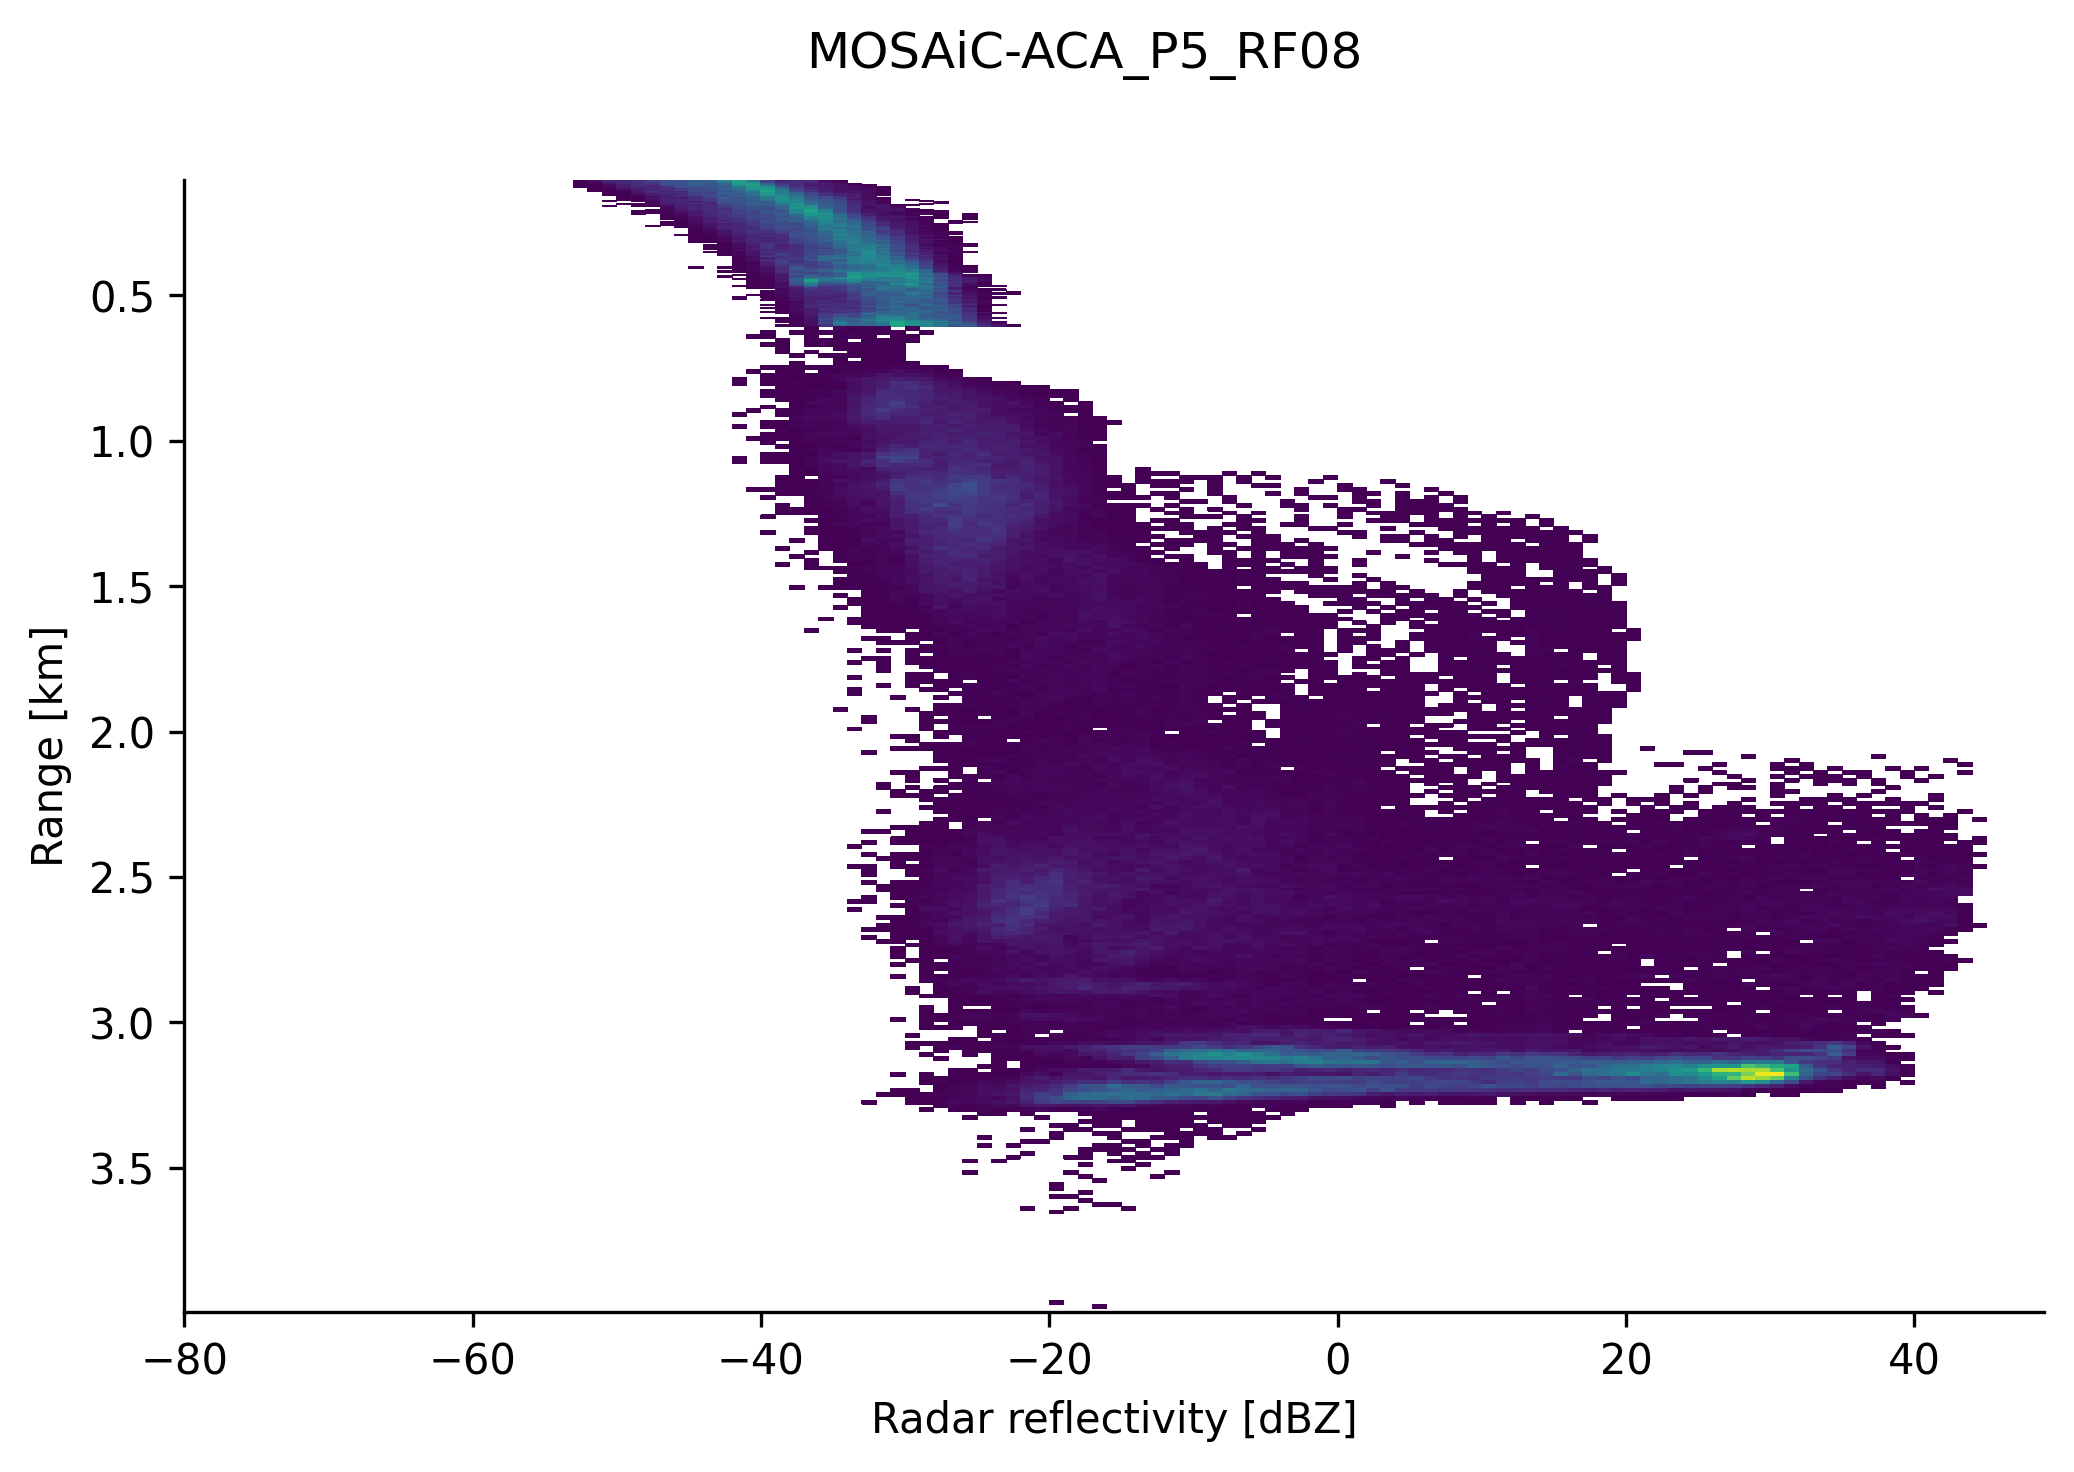

In [34]:
flight_id = 'MOSAiC-ACA_P5_RF08'
cfad(flight_id)

### RF09, 2020-09-10

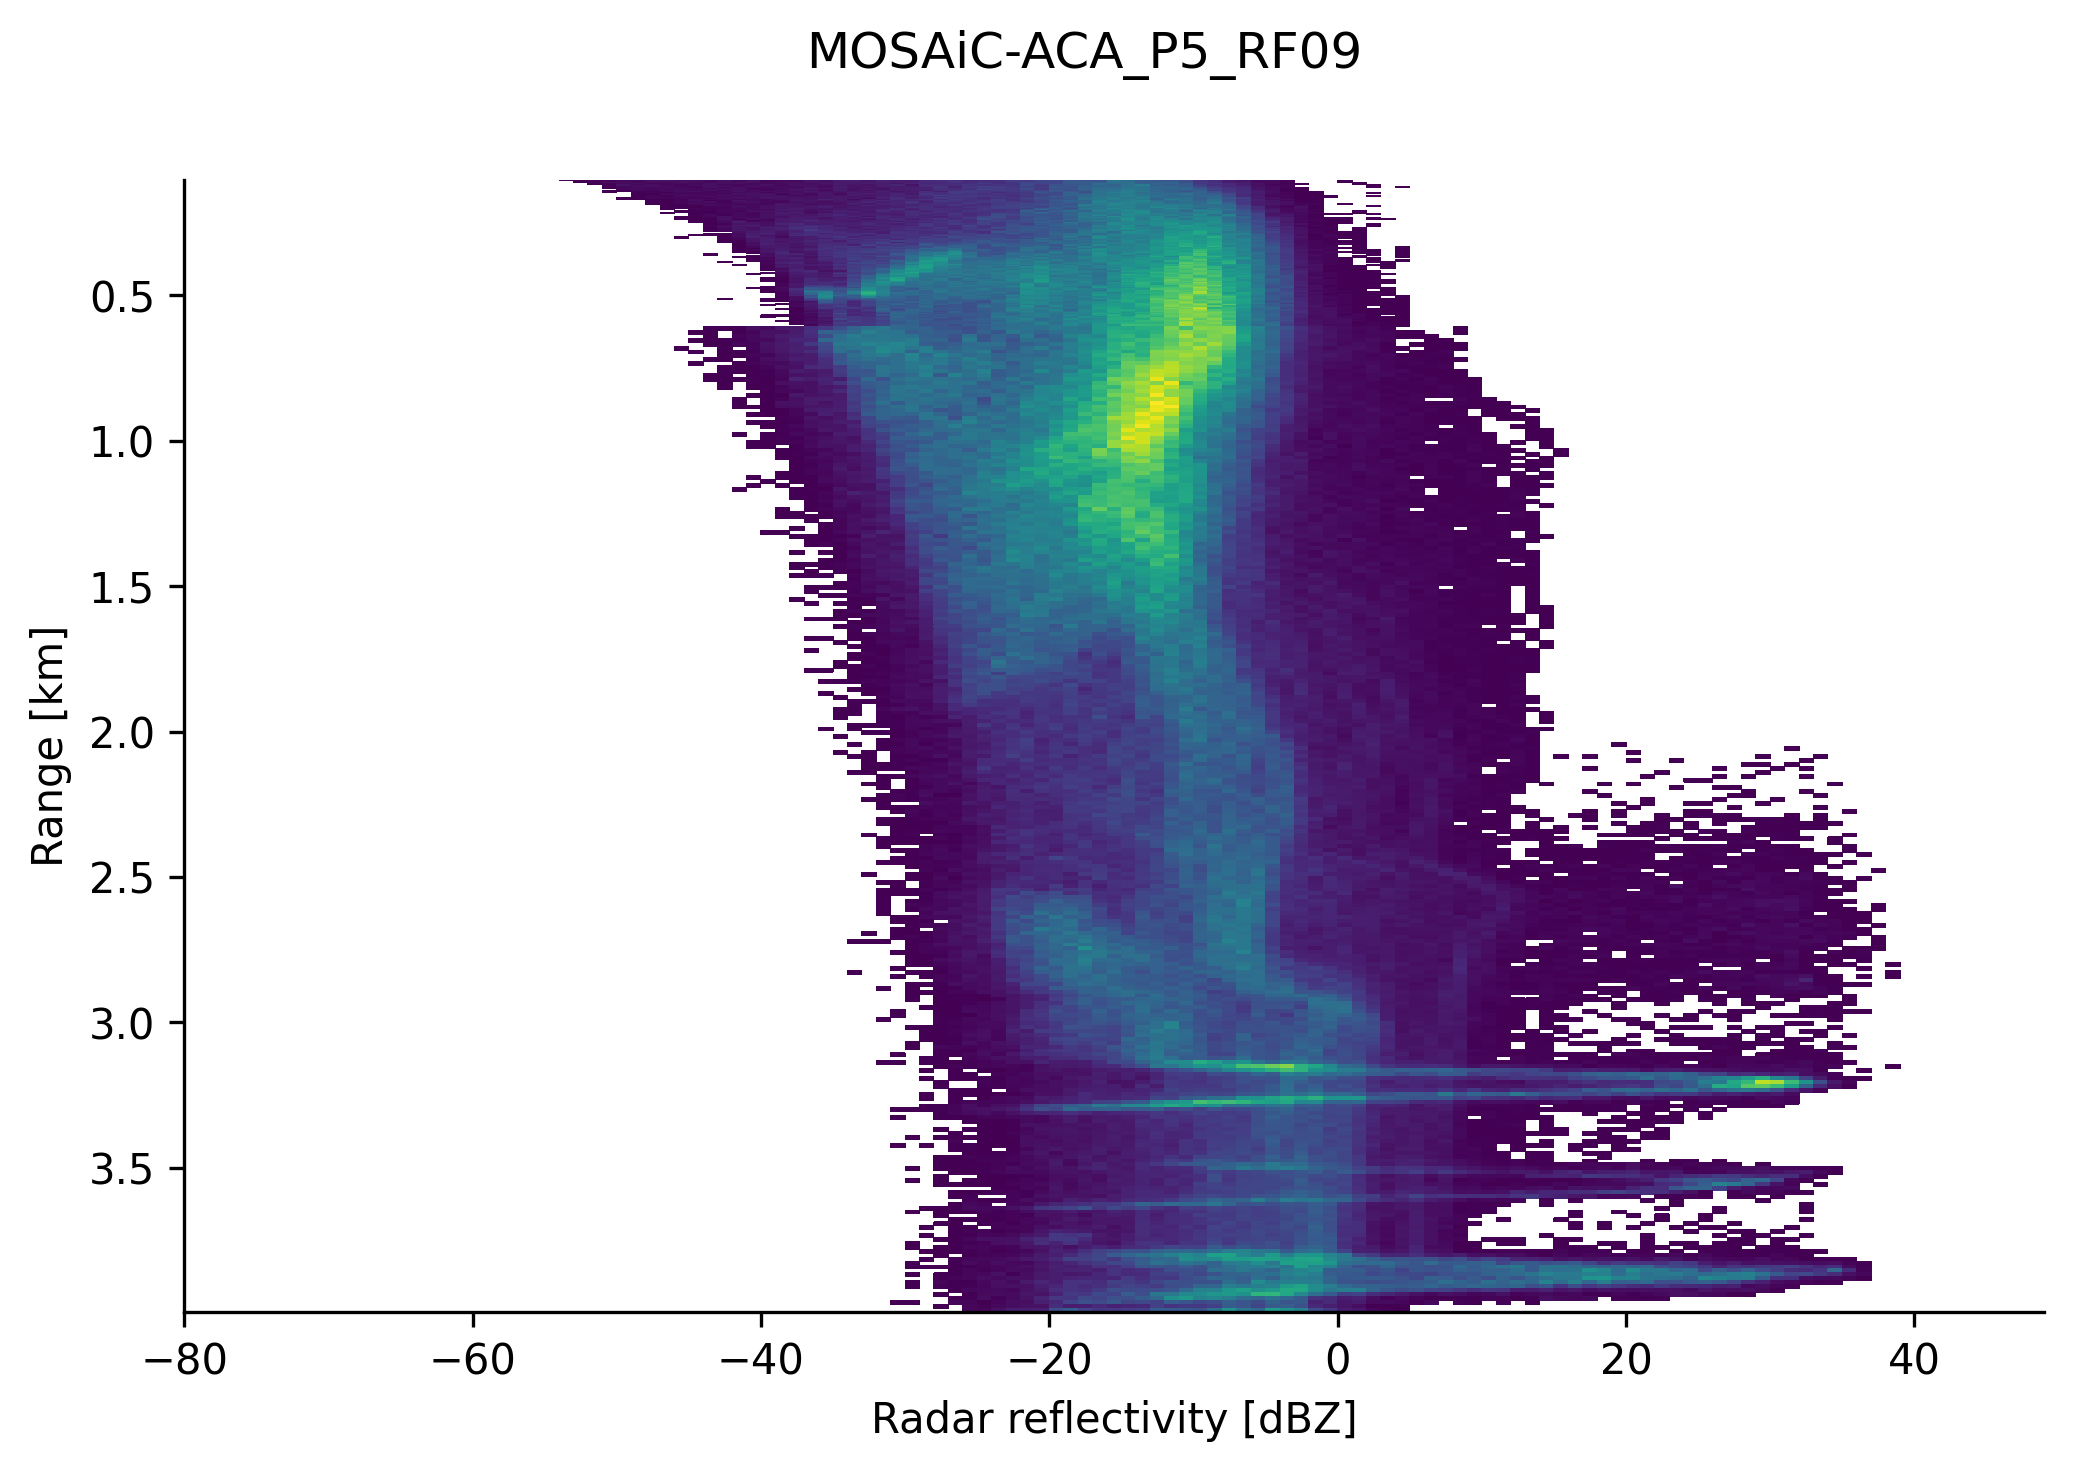

In [35]:
flight_id = 'MOSAiC-ACA_P5_RF09'
cfad(flight_id)

### RF10, 2020-09-11

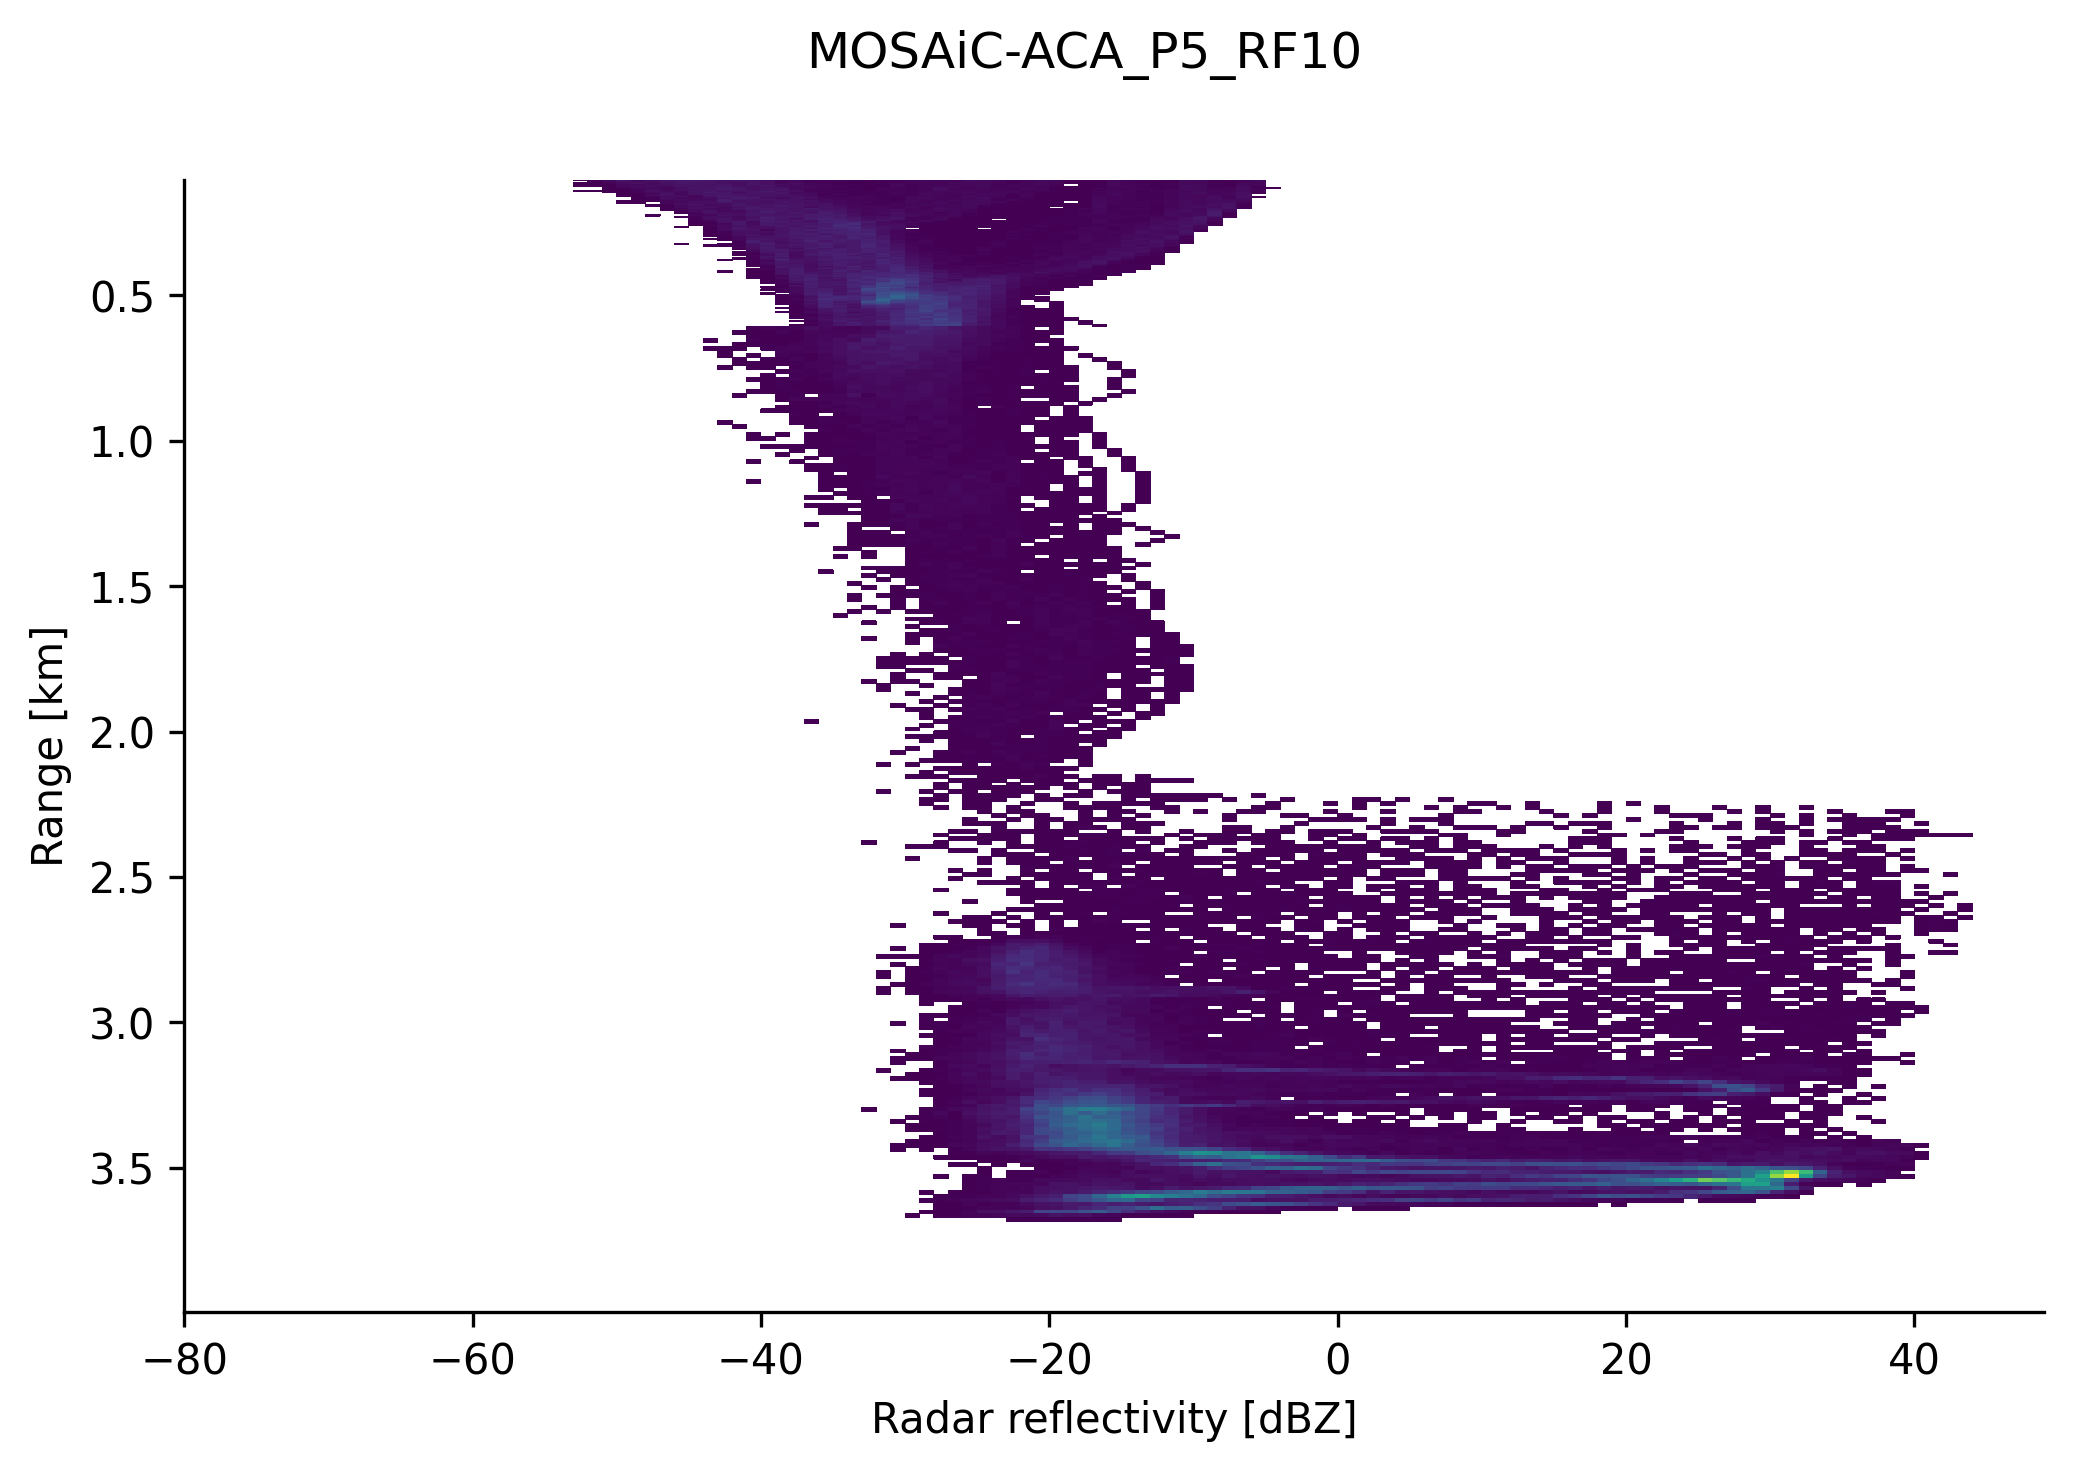

In [36]:
flight_id = 'MOSAiC-ACA_P5_RF10'
cfad(flight_id)

### RF11, 2020-09-13

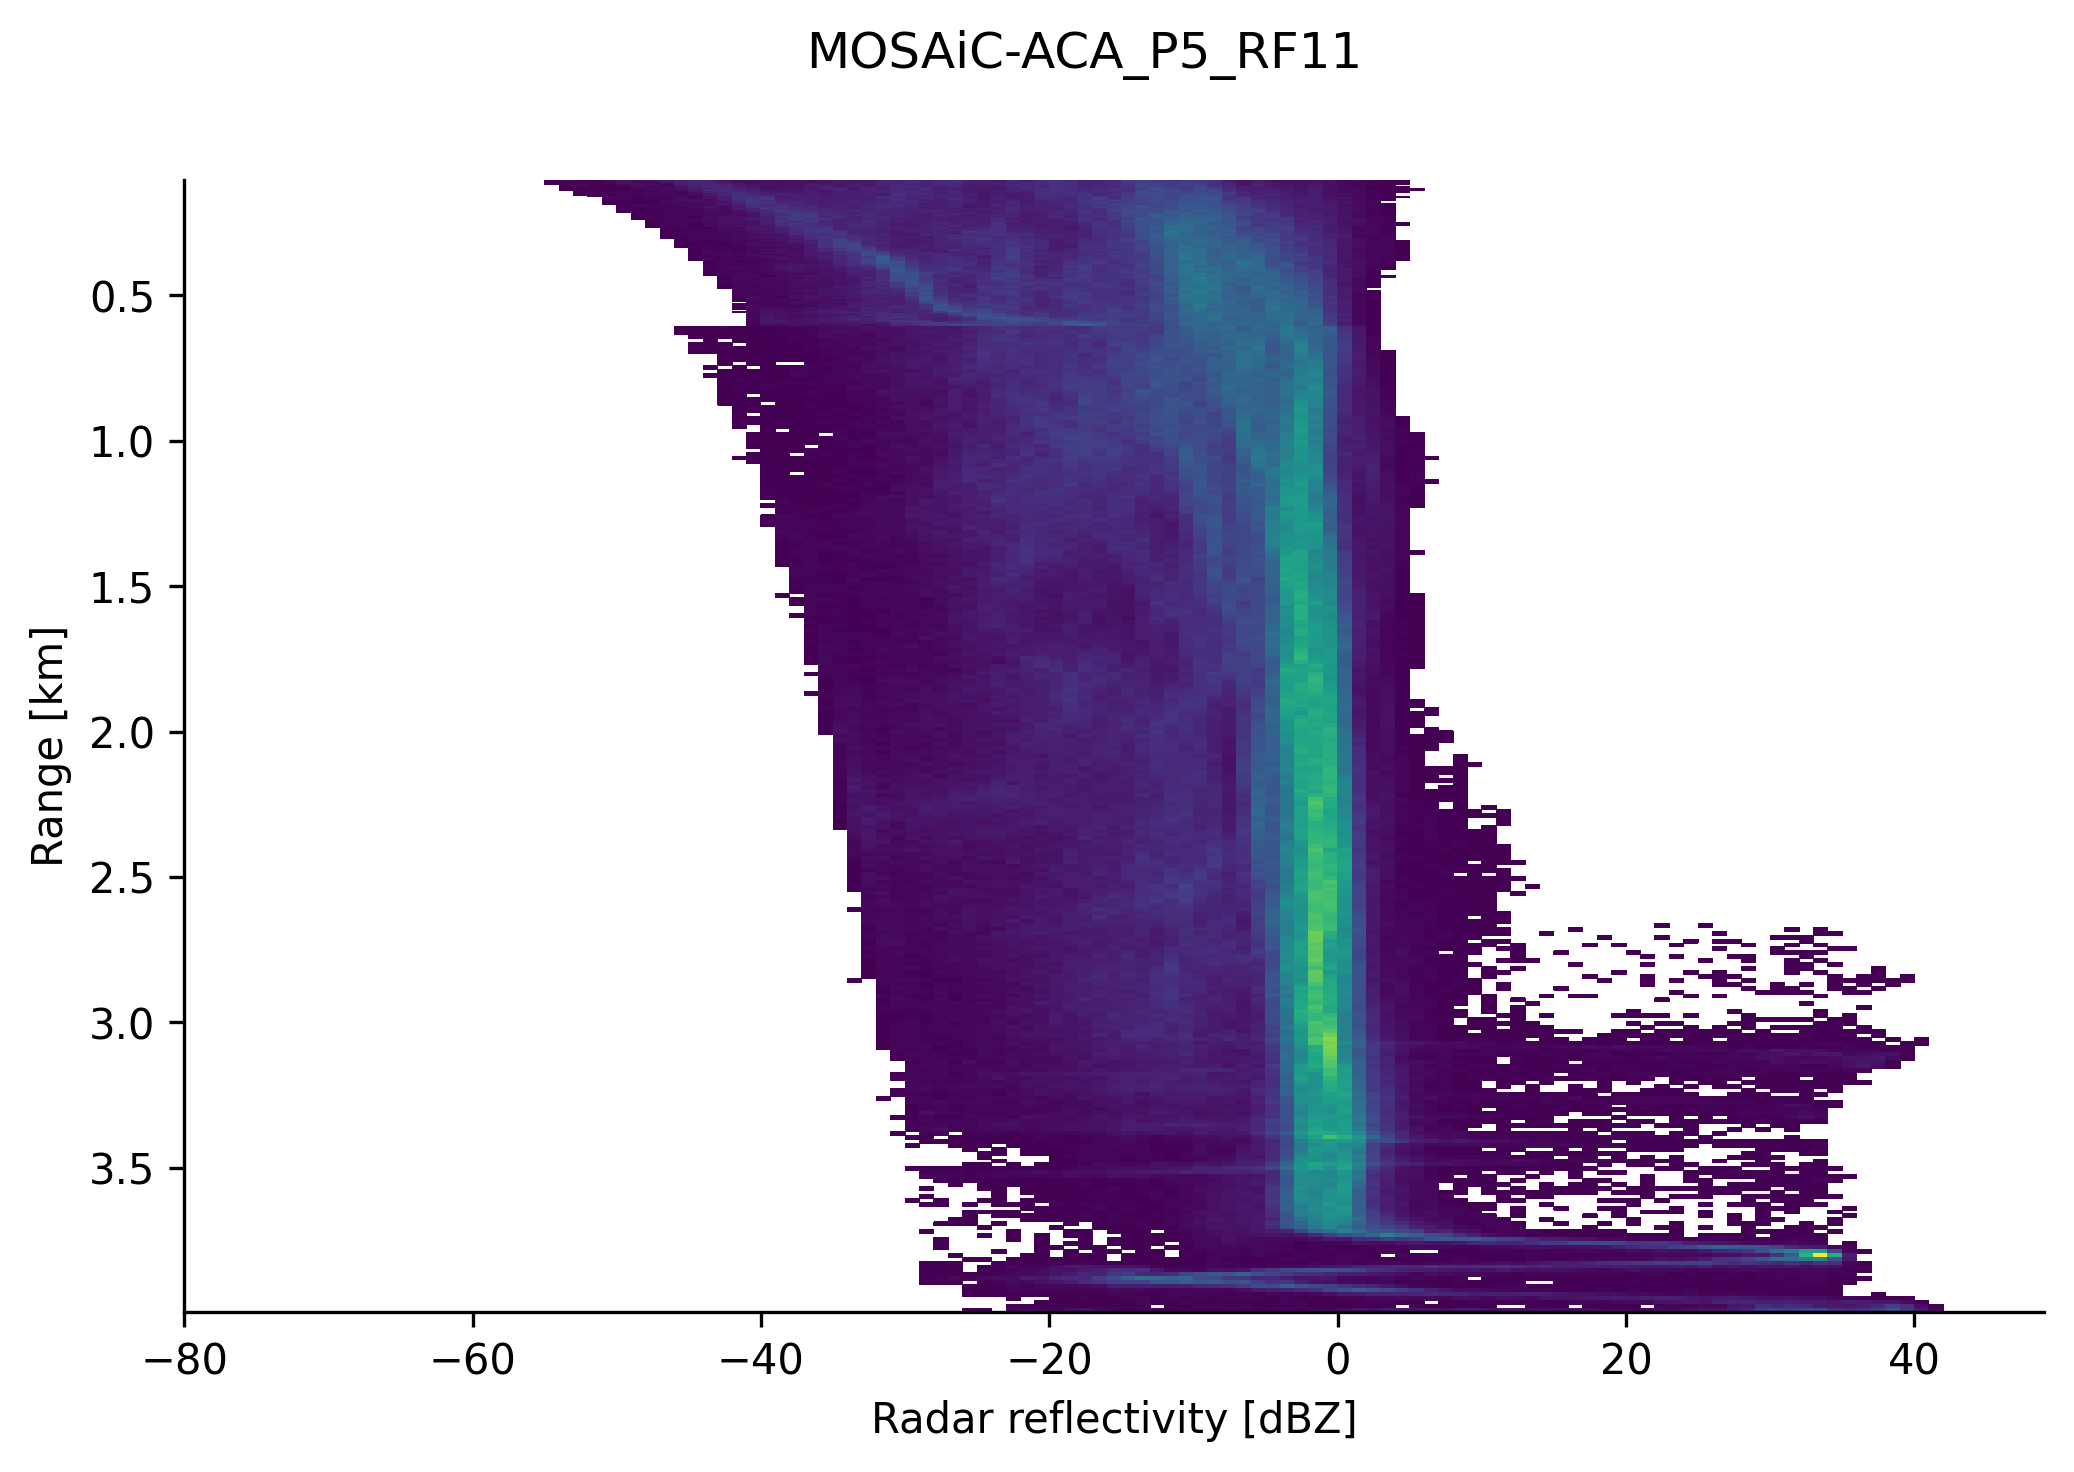

In [37]:
flight_id = 'MOSAiC-ACA_P5_RF11'
cfad(flight_id)